# Cars 4 You: We buy your car!
## Machine Learning Project 2025-2026 - Masters in Data Science and Advanced Analytics
## Group 13

* Duarte Barata 20221896
* Elias Ferreira 20221968
* João Gomes 20221814
* Rui Barros 20221812

(Simpson team)

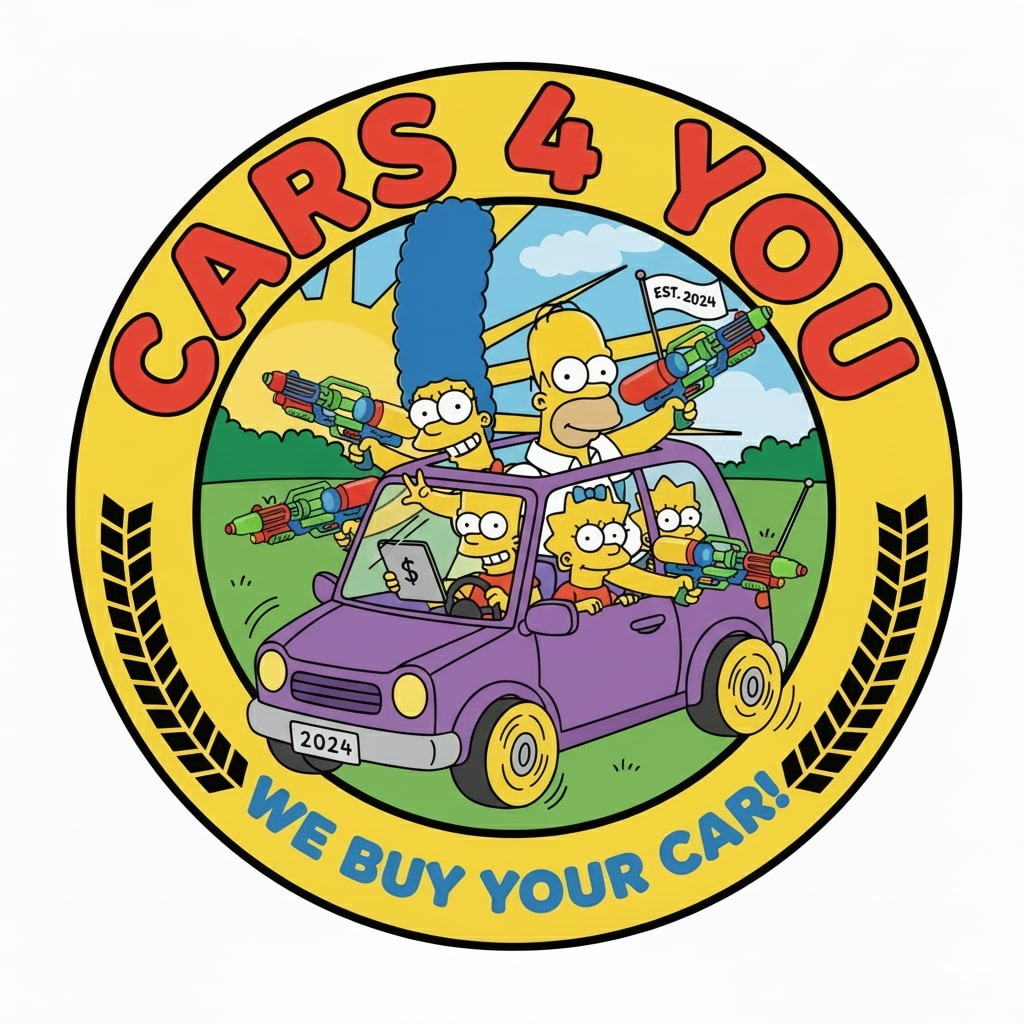

# GitHub Repository

https://github.com/dbarata13/Cars4You-Regression-Project-Group-13

**Group contribution**

João and Duarte were more focused on implementing and testing the models throughout the project, ensuring that the proposed approaches were correctly developed and evaluated. Rui contributed on the feature selection part. Elias dedicated more effort to data preprocessing, working closely with Rui on data preparation tasks to guarantee the quality and consistency of the datasets used.

Rui was more focused on the open-ended section of the work, collaborating with João and Duarte on this part. Despite these primary focuses, all team members were familiar with and contributed to all areas of the project. For this reason, the overall contribution is considered equal, with 25% attributed to each member.

**Abstract**

In the context of the Cars 4 You: We Buy Your Car! project, the main goal of this work was to develop a predictive model capable of accurately estimating the price of a used car based on a given set of explanatory variables. Accurate car price prediction is crucial for supporting fair and competitive pricing decisions in the automotive resale market. To achieve this objective, a complete data science pipeline was designed, implemented, and evaluated.

The dataset was initially split into training and validation sets using the holdout method. This approach was selected because, for our workflow, it was less prone to implementation mistakes while still providing a clear and reliable evaluation of model performance. Extensive data preprocessing was performed, including the treatment of outliers and the imputation of missing values using appropriate statistical measures such as the median and mode, always preventing data leakage. Categorical variables were encoded using target encoding, which proved to be the most effective encoding strategy after empirical testing. All numerical features were then scaled using a standard scaler to ensure consistency across models.

Feature selection techniques were applied to identify the most relevant variables for prediction, with methods such as Recursive Feature Elimination helping to reduce dimensionality and improve model performance.
A total of six different machine learning models were trained and evaluated. Among them, the HistGradientBoosting model achieved the best performance, obtaining a Mean Absolute Error (MAE) of approximately 1300 on the validation set. This indicates that, on average, the predicted car price deviates from the true value by around 1300 pounds.

Finally, an open-ended section explored additional improvements, including model optimization through pipelines and interpretability analysis using SHAP values. These analyses provided deeper insights into model behavior and feature importance, reinforcing the robustness and practical relevance of the proposed solution.

**Business Needs**

The business need addressed in this project is the ability to accurately and consistently estimate the price of used cars based on their characteristics. Cars 4 You: We Buy Your Car! operates in a competitive market where pricing decisions must be both attractive to customers and economically sustainable for the company. Inaccurate price estimates can lead to financial losses through overpricing or missed opportunities through underpricing.

To support better decision-making, the company requires a data-driven solution that can predict car prices in a reliable and scalable way. Such a model helps reduce subjectivity in pricing, improves operational efficiency, and ensures more consistent evaluations across different vehicles. By minimizing prediction errors and providing transparent performance metrics, the proposed solution directly supports the company’s goal of optimizing purchase offers while managing financial risk.

To address these business needs, the project follows a structured data science methodology, as outlined in the abstract and described in more detail throughout the report. This methodology includes data preprocessing, feature selection, model development, and systematic evaluation using appropriate performance metrics. By adopting this approach, the project aims to deliver a robust and accurate predictive model that aligns with the company’s operational goals and supports effective pricing strategies.

**Brief Description of Data Received**

| **Attribute**        | **Description**                                                                 |
|----------------------|---------------------------------------------------------------------------------|
| carID               | An attribute that contains a unique identifier for each car.                    |
| brand               | The car’s main brand (e.g., Ford, Toyota).                                       |
| model               | The specific model of the car.                                                   |
| year                | The year of registration of the car.                                             |
| mileage             | The total reported distance travelled by the car (in miles).                    |
| tax                 | The amount of road tax (in £) applicable to the car in 2020.                    |
| fuelType            | Type of fuel used by the car (Diesel, Petrol, Hybrid, Electric).                |
| mpg                 | Average miles per gallon.                                                       |
| engineSize          | Engine size in liters (cubic decimeters).                                       |
| paintQuality%       | Mechanic’s assessment of the car’s overall paint quality and hull integrity.    |
| previousOwners      | Number of previous registered owners of the vehicle.                            |
| hasDamage           | Boolean indicator stating whether the car has damage at registration time.      |
| price               | The car’s purchase price by Cars 4 You (in £).                                  |


**Initial Key Insights**


At this initial stage, without detailed exploratory analysis, several factors are likely to influence car prices. Brand and model can reflect popularity or luxury value, while year (or car age) and mileage indicate depreciation. Fuel type, engine size, and mpg may affect both cost and desirability, and paint quality, previous owners, and damage history signal the car’s condition.

Dataset overview: the training set contains 75 973 observations, and the test set has 32 567 observations.

These factors will guide initial feature selection and preprocessing for predictive modeling, with further analysis needed to quantify relationships and explore interactions between variables.

##Approach & Scope
Using the historical dataset from 2020, this notebook documents the end-to-end development of the pricing model.

##Data Source
The model is trained on internal data containing technical specifications (e.g., `mpg`, `tax`).

Importing the needed Libraries and packages to do the work.

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.base import clone
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from scipy.stats import randint, loguniform
import shap
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



from google.colab import files


## 1.Importing Data Sets and Mounting the drive

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the Train and Test sets.

In [284]:
df_train= pd.read_csv(r'/content/drive/MyDrive/ML Project/train.csv')

In [285]:
df_test=pd.read_csv(r'/content/drive/MyDrive/ML Project/test.csv')

We have decided to set `carID` as the DataFrame index in the Train dataset,and here's why:

`carID` acts as a unique identifier for each car entry. By setting it as the index, we explicitly designate it as the primary key of our dataset. It will also allow for more efficient lookup and alignment of data based on the car's ID. Also, by removing it from the regular columns, we ensure it's not inadvertently used as a predictive feature in our machine learning models, as it holds no predictive power itself.

However, we treated the test set differently. We did not completely hide or discard the carID in the test pipeline because this identifier is strictly required for the final deployment. To validate our results in the Kaggle competition, the submission file must map each predicted price back to its corresponding carID.

In [286]:
df_train = df_train.set_index('carID')

print("Set 'carID' as index for df_train")
print("df_train head after setting index:")
print(df_train.head())


Set 'carID' as index for df_train
df_train head after setting index:
        Brand      model    year  price transmission  mileage fuelType    tax  \
carID                                                                           
69512      VW       Golf  2016.0  22290    Semi-Auto  28421.0   Petrol    NaN   
53000  Toyota      Yaris  2019.0  13790       Manual   4589.0   Petrol  145.0   
6366     Audi         Q2  2019.0  24990    Semi-Auto   3624.0   Petrol  145.0   
29021    Ford     FIESTA  2018.0  12500        anual   9102.0   Petrol  145.0   
10062     BMW   2 Series  2019.0  22995       Manual   1000.0   Petrol  145.0   

             mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                   
69512  11.417268         2.0           63.0        4.000000        0.0  
53000  47.900000         1.5           50.0        1.000000        0.0  
6366   40.900000         1.5           56.0        4.000000        0.0 

## 2.EDA and Inconsistencies

Before applying the hold-out split, we perform an initial data integrity check. This step aims to detect structural errors, duplicates, or logical incoherences that could compromise the validity of the training process

Exploring data


In [287]:
df_train.head()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [288]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


Looking at min and max price, which seemed reasonable.

In [289]:
min_price = df_train['price'].min()
max_price = df_train['price'].max()

print(f"Minimum price: {min_price}")
print(f"Maximum price: {max_price}")

Minimum price: 450
Maximum price: 159999


In [290]:
min_price_row = df_train[df_train['price'] == min_price]
max_price_row = df_train[df_train['price'] == max_price]

print("Row(s) with minimum price:")
display(min_price_row)

print("\nRow(s) with maximum price:")
display(max_price_row)

Row(s) with minimum price:


,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
60156,Opel,Agila,2003.0,450,Manual,90000.0,Petrol,205.0,43.5,1.2,67.0,3.0,0.0



Row(s) with maximum price:


,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
38485,Mercedes,G Class,2020.0,159999,Semi-Auto,1350.0,Petrol,145.0,21.4,4.0,99.0,1.0,0.0


#### 2.1 Numerical Variables

Identify numerical columns

In [291]:
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage']


Plotting the boxplots to see possible outliers




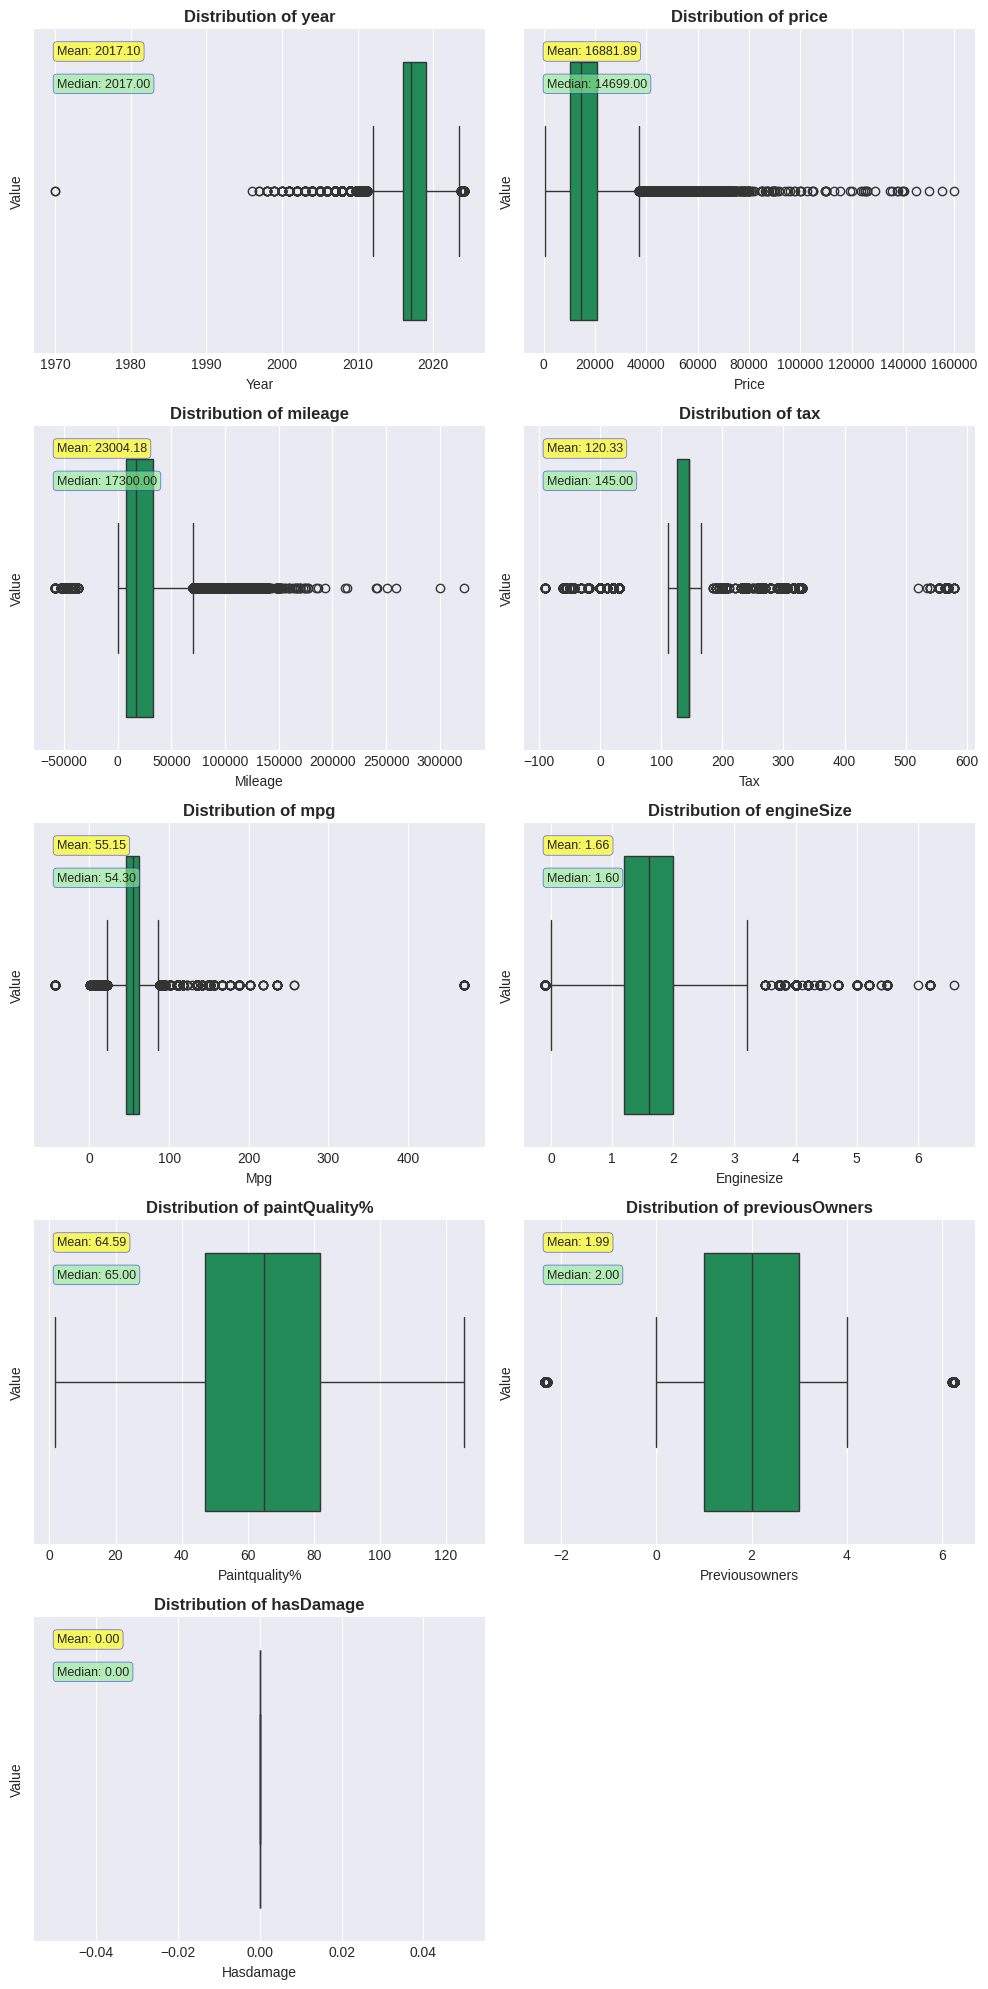

In [292]:
#Set a modern style for the plots
plt.style.use('seaborn-v0_8-darkgrid')


#Determine the number of rows and columns for subplots
n_cols = 2 #Number of columns per row
n_rows = int(np.ceil(len(numerical_cols) / n_cols)) #Dynamically calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() #Flatten the array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(x=df_train[col], ax=ax, color=('#109d59'))
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=10)
    ax.set_ylabel('Value', fontsize=10) #Set a generic y-label for consistency

    #Calculate mean and median
    mean_val = df_train[col].mean()
    median_val = df_train[col].median()

    #Add text annotations for mean and median
    ax.text(0.05, 0.95, f'Mean: {mean_val:.2f}', transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='yellow', ec='b', lw=0.5, alpha=0.6))
    ax.text(0.05, 0.85, f'Median: {median_val:.2f}', transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='lightgreen', ec='b', lw=0.5, alpha=0.6))

#Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

For now, we won't treat outliers. We will handle them after applying the hold-out method.

Insights and Outlier Mitigation Strategy

The exploratory analysis confirms high variance and the presence of significant outliers in several features. Notably:
* Extreme values were identified across key numerical predictors: **mileage**, **engineSize**, **mpg**, and **tax**. These anomalies necessitate the application of a rigorous outlier mitigation technique (such as IQR-based capping/Winsorization) to the training set to improve model robustness.
* The **hasDamage** feature was found to be **univariate** (or near zero-variance), offering no useful predictive signal.

Based on these findings, the univariate hasDamage will be removed prior to modeling. The remaining outliers will be capped to ensure model stability.

Dropping hasDamage variable because almost all the values are the same (0.0 and NaN which dont add value) so it will not be a good variable to model later. Dropped from test and train.

In [293]:
print("Unique values for hasDamage:")
print(df_train['hasDamage'].unique())
print("\nValue counts for hasDamage:")
print(df_train['hasDamage'].value_counts(dropna=False))

Unique values for hasDamage:
[ 0. nan]

Value counts for hasDamage:
hasDamage
0.0    74425
NaN     1548
Name: count, dtype: int64


In [294]:
df_train = df_train.drop('hasDamage', axis=1)

print("Column 'hasDamage' dropped successfully.")
print("Columns remaining in df_train:", df_train.columns.tolist())
df_test=df_test.drop('hasDamage', axis=1)


Column 'hasDamage' dropped successfully.
Columns remaining in df_train: ['Brand', 'model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']


In [295]:
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

numerical_cols = [col for col in numerical_cols if col not in ['hasDamage']]

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']
Categorical columns: ['Brand', 'model', 'transmission', 'fuelType']


Now we will plot some different visualizations in order to understand some trends on our data.

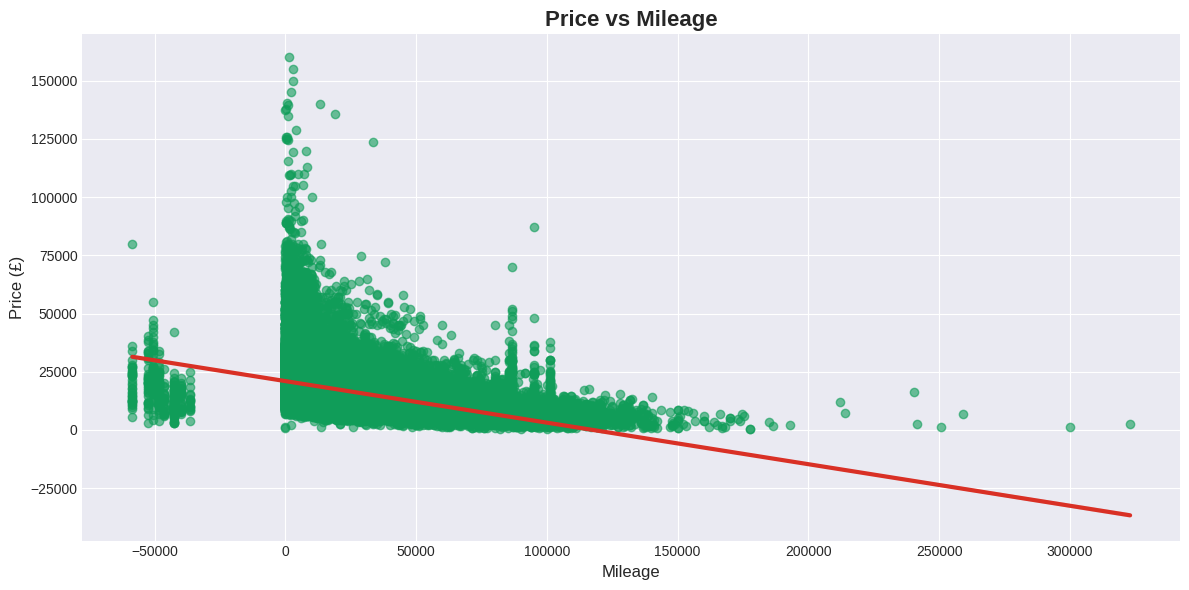

In [296]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

#Scatter plot with regression trendline
sns.regplot(
    x='mileage',
    y='price',
    data=df_train,
    scatter_kws={'color': '#109d59', 'alpha':0.6},  #Points color and transparency
    line_kws={'color':'#D93025', 'linewidth':3}   #Trendline color
)

plt.title('Price vs Mileage', fontsize=16, fontweight='bold')
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


To gain a clear understanding of the market value trend, we plotted Price against Mileage on a standard linear scale. As we initially stated during the data description phase, there is a clear inverse relationship between price and mileage: as mileage increases, the price of the vehicle decreases. We will address these negative correlations later in the feature processing stage. We can also see that there are observations where cars have negative mileage, which is something that is impossible, and will be treated in the due time.

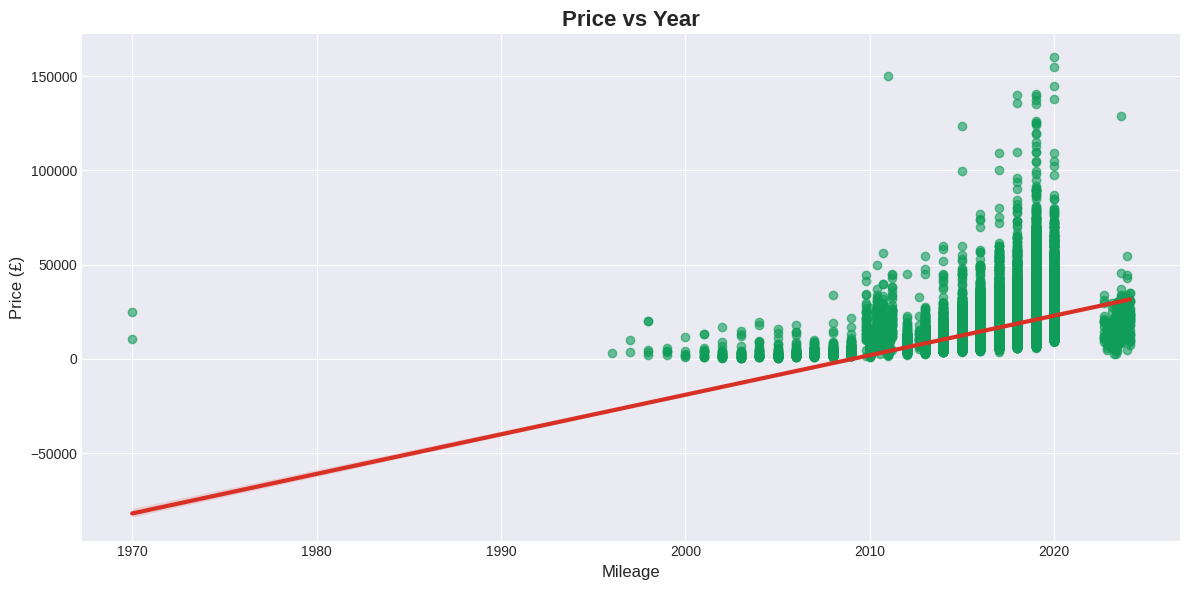

In [297]:


#Set modern style
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

#Scatter plot with regression trendline
sns.regplot(
    x='year',
    y='price',
    data=df_train,
    scatter_kws={'color': '#109d59', 'alpha':0.6},  #Points color and transparency
    line_kws={'color':'#D93025', 'linewidth':3}   #Trendline color
)

plt.title('Price vs Year', fontsize=16, fontweight='bold')
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Again and confirming what is expected. More recent cars have considerably higher prices when compared with older ones.

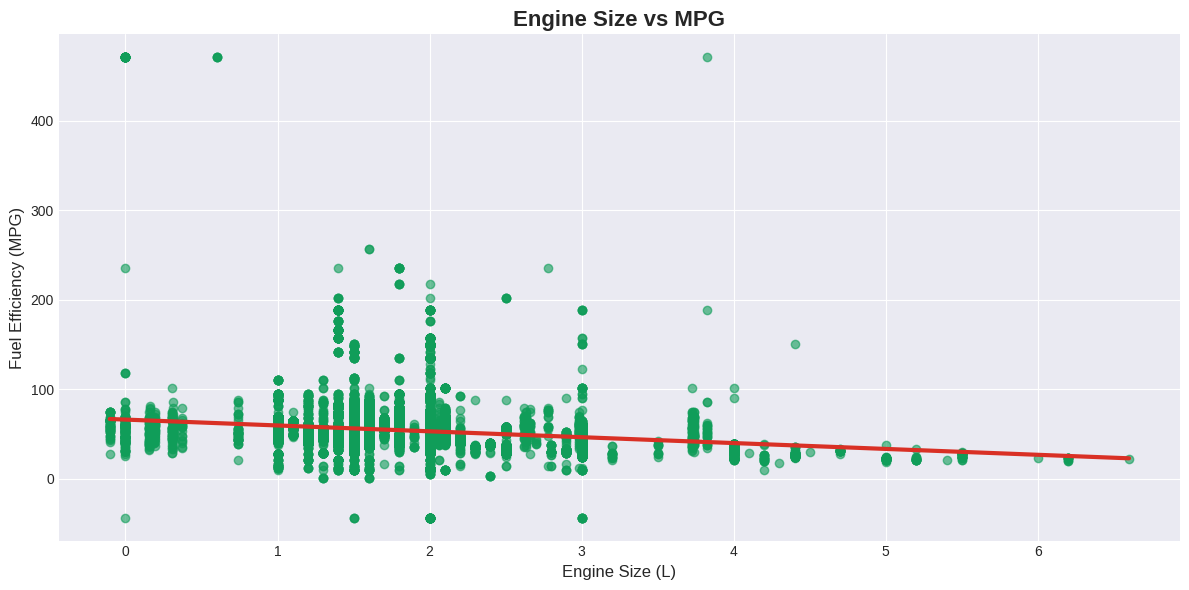

In [298]:



#Set modern style
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

#Scatter plot with regression trendline
sns.regplot(
    x='engineSize',      #use column from df_train
    y='mpg',              #use column from df_train
    data=df_train,
    scatter_kws={'color': '#109d59', 'alpha': 0.6},  #Points color and transparency
    line_kws={'color':'#D93025', 'linewidth':3}   #Trendline color
)

plt.title('Engine Size vs MPG', fontsize=16, fontweight='bold')
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('Fuel Efficiency (MPG)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


As engine size increases, fuel efficiency (MPG) decreases, showing a clear trade-off between engine power and fuel economy.

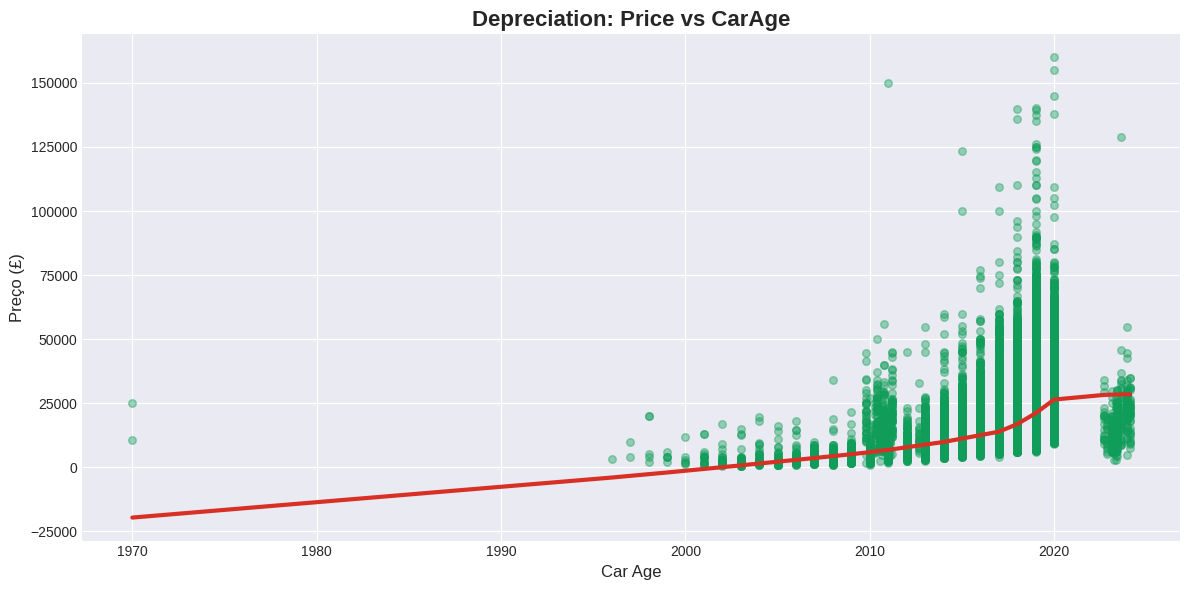

In [299]:
plt.figure(figsize=(12, 6))
green_color = '#109d59'

sns.regplot(
    x='year',
    y='price',
    data=df_train,
    lowess=True,
    scatter_kws={'alpha':0.4, 's':30, 'color':green_color},
    line_kws={'color':'#D93025', 'linewidth':3}
)
plt.title('Depreciation: Price vs CarAge', fontsize=16, fontweight='bold')
plt.xlabel('Car Age', fontsize=12)
plt.ylabel('Preço (£)', fontsize=12)
plt.tight_layout()
plt.show()

This scatter plot clearly illustrates the non-linear relationship between Vehicle Age (Year) and Price, confirming the classic depreciation curve.

Low Depreciation Rate (1970 - 2010): The trendline is nearly flat, indicating that older vehicles have reached their floor price. For this segment, the price is low and relatively stable.

Steep Depreciation Rate (2020 onwards): The line exhibits its sharpest incline for newer vehicles, confirming that the highest monetary depreciation occurs in the first few years.

High Variance in Modern Cars: The wide vertical scatter of points after 2015 shows significant heterogeneity. For recent models, the vehicle's year is insufficient for prediction; the model must heavily rely on other features to differentiate between a high-end luxury car and a standard economy model of the same year.

This visualization justifies the necessity of using non-linear regression models to accurately capture the complexity of this price distribution.




### Missing Values

In [300]:
df_train.isnull().sum()

,0
Brand,1521
model,1517
year,1491
price,0
transmission,1522
mileage,1463
fuelType,1511
tax,7904
mpg,7926
engineSize,1516


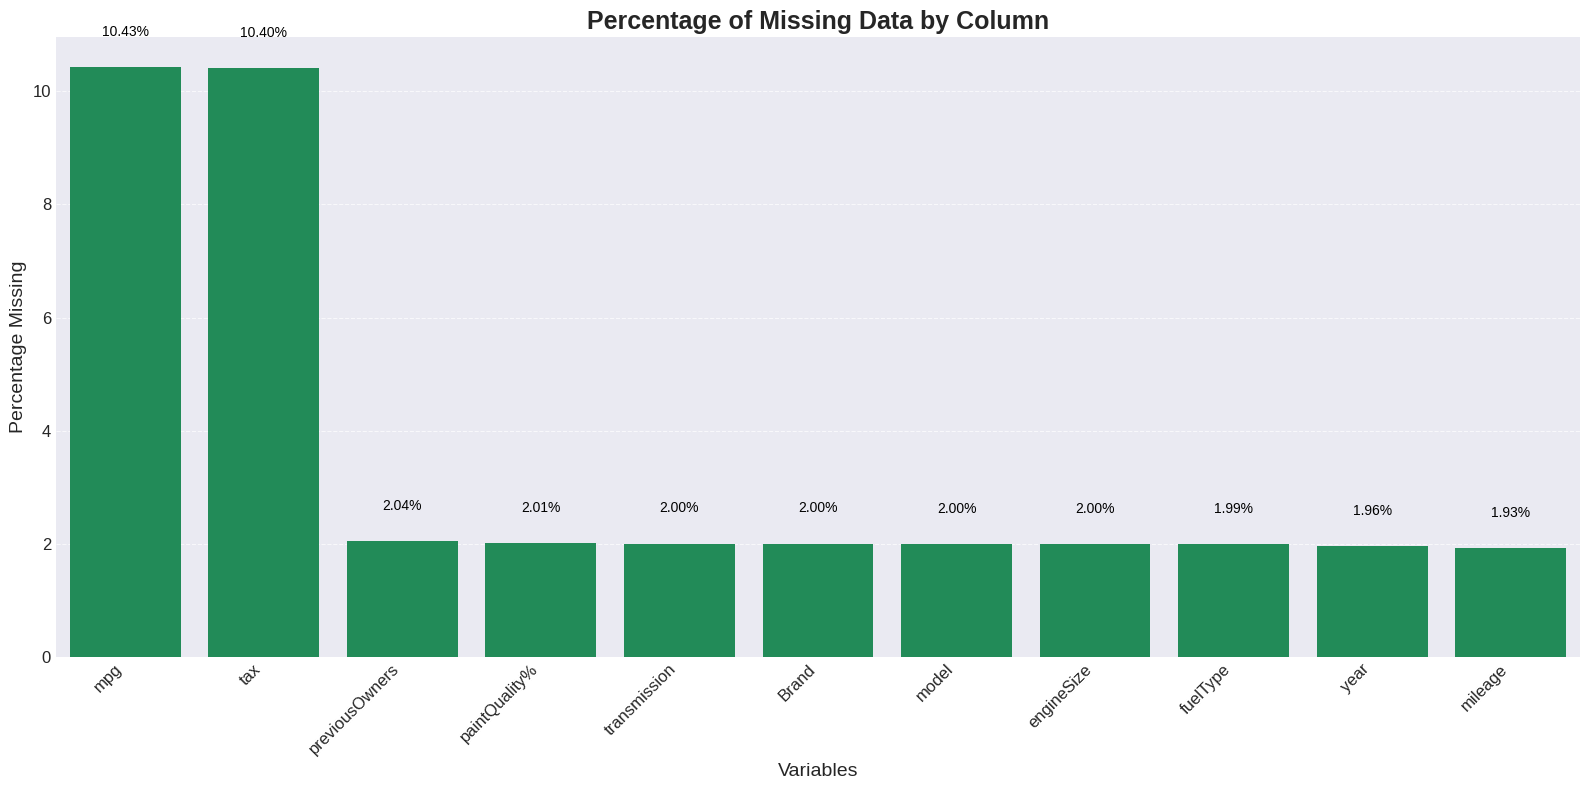

In [301]:
missing_values = (df_train.isnull().sum() / df_train.shape[0]) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(16, 8)) #Increase figure size for better readability
sns.barplot(x=missing_values.index, y=missing_values.values, color='#109d59') #Use a single color like 'steelblue'

plt.title('Percentage of Missing Data by Column', fontsize=18, fontweight='bold') #Enhance title
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Percentage Missing', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) #Rotate and resize x-axis labels
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) #Add a subtle grid

#Add percentage labels on top of each bar
for index, value in enumerate(missing_values.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', color='black', ha='center', va='bottom', fontsize=10)

plt.tight_layout() #Adjust layout to prevent labels from overlapping
plt.show()

Upon initial inspection, the dataset contains several columns with missing values, which could impact the quality and performance of our models.

We used `.isnull().sum()` to quantify the number of missing entries per column and visualized these percentages using a bar chart to highlight the most affected features.
Key observations regarding missing values:
*   **tax and mpg**: These features show the highest percentage of missing values, indicating a significant portion of the data for these attributes is absent.
*   **transmission, mileage, fuelType, engineSize, previousOwners, year**: These columns also contain a considerable number of missing entries, but less than tax and mpg.

Handling these missing values will be a critical step in our data preprocessing pipeline. Depending on the feature and the extent of missingness, strategies such as imputation (e.g., mean, median, mode, or more sophisticated methods) or removal of affected rows/columns will be considered to ensure data integrity and model robustness.

### Duplicate Values

The code identifies and removes physical duplicates in the training dataset, cars that share the same specifications but may differ in carID or price-related fields. By excluding carID and price from the comparison, the process ensures that only the true physical configuration of each car is used to detect duplicates.

The training set now contains only unique physical car specifications, reducing redundancy and improving dataset quality for model training.

In [302]:
#Create a list of columns to check for duplicates, excluding the 'price' column.
cols_to_check = [col for col in df_train.columns if col != 'price']

#Record the starting number of rows.
rows_before = len(df_train)

#Identify rows that are duplicates (all occurrences *after* the first one).
duplicates_to_remove = df_train[df_train.duplicated(subset=cols_to_check, keep='first')]

#Remove the identified duplicate rows from the DataFrame, keeping the first occurrence.
df_train = df_train.drop_duplicates(subset=cols_to_check, keep='first')

#Record the final number of rows and calculate the count of removed rows.
rows_after = len(df_train)
rows_removed = rows_before - rows_after

#Print the comparison report.
print(f"Rows before removal: {rows_before}")
print(f"Rows after removal: {rows_after}")
print(f"Total physically identical records removed: {rows_removed}")

if rows_removed > 0:
    print("\n--- Removed Duplicates ---")
    #Display the removed records for review.
    print(duplicates_to_remove)
else:
    print("\nNo physically identical records were found and removed.")

print("\nStatus: Training set now contains only unique physical car specifications.")

Rows before removal: 75973
Rows after removal: 75962
Total physically identical records removed: 11

--- Removed Duplicates ---
         Brand   model    year  price transmission  mileage fuelType    tax  \
carID                                                                         
58117     Opel   Astra  2020.0  15295       Manual     10.0   Petrol  145.0   
60327     Opel   Astra  2017.0  10691       Manual  24160.0   Petrol  125.0   
34281  Hyundai     I10  2018.0   7895       Manual  15207.0   Petrol  145.0   
34128  Hyundai     I10  2017.0   7500       Manual      NaN   Petrol  145.0   
34301  Hyundai   Ioniq  2019.0  23991    Automatic   5500.0   Hybrid  135.0   
58733     Opel   Astra  2020.0  15820       Manual    100.0   Petrol  145.0   
21404     Ford   Focus  2018.0  13500       Manual  11382.0   Petrol    NaN   
25766     Ford   Focus  2017.0  14000    Automatic   9137.0   Petrol    NaN   
60076     Opel   Corsa  2019.0   9990       Manual    100.0   Petrol  145.0   
559

In [303]:
#Define the features that represent the car's identity (all columns except 'price')
cols_to_check = [col for col in df_train.columns if col != 'price']
rows_before = len(df_train)

#Identify ALL occurrences of duplicates (for demonstration purposes)
#'keep=False' marks both the first and subsequent occurrences as True
all_duplicates_mask = df_train.duplicated(subset=cols_to_check, keep=False)
duplicate_rows_for_demo = df_train[all_duplicates_mask].sort_values(by=cols_to_check)

#Identify which rows will be REMOVED
#This list is used for the final count and report
duplicates_to_remove = df_train[df_train.duplicated(subset=cols_to_check, keep='first')]
rows_removed = len(duplicates_to_remove)


#DEMONSTRATION: Show an example of the inconsistency
if not duplicate_rows_for_demo.empty:
    print("Example of Physically Identical Rows (Inconsistency)")

    #Select the first two rows (which should be the identical pair)
    first_duplicate_group = duplicate_rows_for_demo.iloc[0:2]

    #Check if they are truly identical in features to confirm the duplication issue
    if first_duplicate_group.iloc[0][cols_to_check].equals(first_duplicate_group.iloc[1][cols_to_check]):
        print("These lines have identical specs but different prices (inconsistency):\n")
        print(first_duplicate_group)
    else:
        #Fallback if the first two lines aren't part of the same group
        print("Sample of 2 duplicated lines (may not be from the same group):\n")
        print(duplicate_rows_for_demo.head(2))
else:
    print("No duplicates found for demonstration.")


#Execute the Removal
#Drop the duplicates, keeping only the first occurrence to remove the inconsistent records
df_train = df_train.drop_duplicates(subset=cols_to_check, keep='first')

#4. FINAL REPORTING
rows_after = len(df_train)
print("  Final Removal Report ")
print(f"Rows before removal: {rows_before}")
print(f"Rows after removal: {rows_after}")
print(f"Total physically identical records removed: {rows_removed}")

print("\nStatus: Training set now contains only unique physical car specifications.")

No duplicates found for demonstration.
  Final Removal Report 
Rows before removal: 75962
Rows after removal: 75962
Total physically identical records removed: 0

Status: Training set now contains only unique physical car specifications.


### Numerical Variable Distributions




This code segment generates **histograms** with Kernel Density Estimates (KDE) for all numerical features. The primary objective is to visually assess the **distribution, central tendency, and variance** of the predictors and the target variable. This visualization is essential for identifying **skewness** (which informs the need for transformations like log) and the presence of **outliers** that necessitate subsequent data cleaning and mitigation strategies.

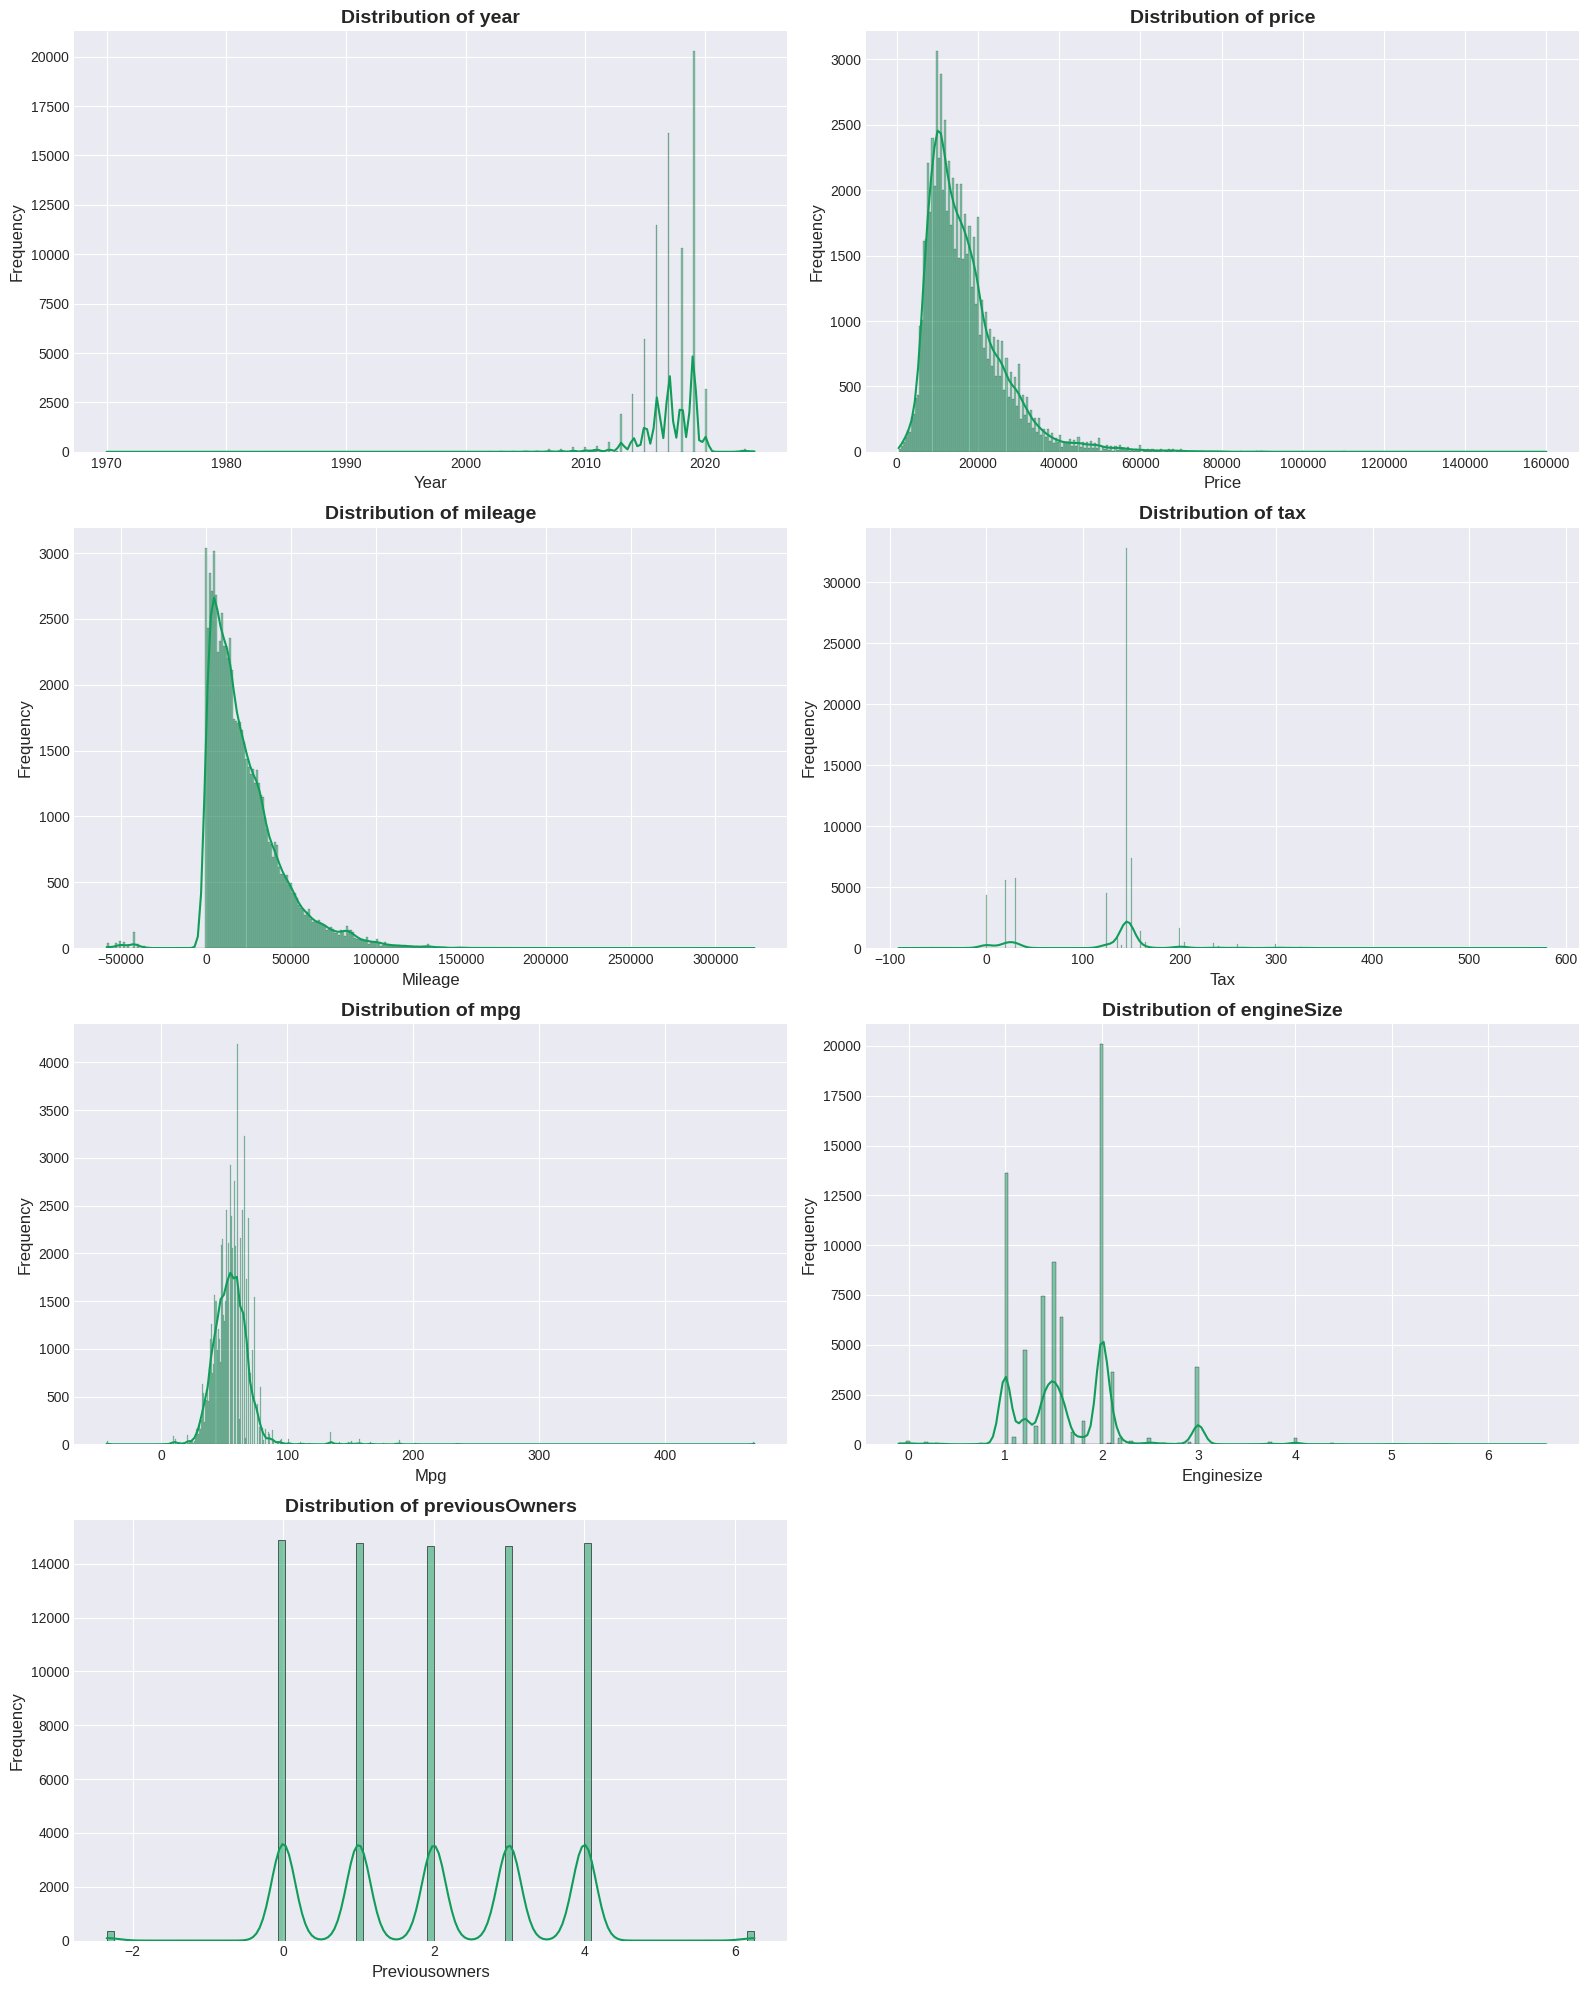

In [304]:
#Set the plotting style
plt.style.use('seaborn-v0_8-darkgrid')

#Select all numerical columns
numerical_cols_present = df_train.select_dtypes(include=np.number).columns.tolist()

#Exclude non-predictive/leaked columns for plotting
numerical_cols_present = [col for col in numerical_cols_present if col not in [ 'paintQuality%', 'hasDamage']]


#Define the grid layout (2 columns)
n_cols = 2
n_rows = int(np.ceil(len(numerical_cols_present) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))

#Flatten the axes array for easier looping
if n_rows == 1 and n_cols == 1:
    axes = np.array([axes])
elif n_rows == 1 or n_cols == 1:
    axes = axes.flatten()
else:
    axes = axes.flatten()

#Loop and plot distribution for each column
for i, col in enumerate(numerical_cols_present):
    ax = axes[i]

    #Create the histogram with KDE curve
    sns.histplot(data=df_train, x=col, kde=True, color='#109d59', ax=ax)

    #Set plot titles and labels
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

#Remove unused subplots
for j in range(len(numerical_cols_present), len(axes)):
    fig.delaxes(axes[j])

#Adjust layout and display the plot
plt.tight_layout()
plt.show()

Looking for the distributions above we can see that some features need to suffer some transformations, for example milage is clearly right skewed and so is our target variable.

#### 2.2 Categorical Variables

Now we are going to change our focus to categorical variables. Chek the categorical variables caractheristics and solve the problems with the names that are very different and mispecified.




In [305]:
unique_brands = df_train['Brand'].unique()
print("Unique values for Brand:")
print(unique_brands)

Unique values for Brand:
['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']


The brands spelled correctly present in our dataset are this: ['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes', 'Hyundai']


Removing rows from train where brand and model are missing values in the same row.

In [306]:
#Remove rows where both 'Brand' and 'model' are NaN in df_train
original_rows_df_train = len(df_train)
df_train = df_train.dropna(subset=['Brand', 'model'], how='all').copy()
removed_rows_df_train = original_rows_df_train - len(df_train)

print(f"Removed {removed_rows_df_train} rows from X_train where both Brand and model were NaN.")
print(f"Number of rows in X_train after removal: {len(df_train)}")






Removed 36 rows from X_train where both Brand and model were NaN.
Number of rows in X_train after removal: 75926


Writting the brands names correctly.

Brand Standardization
We identified several typographical inconsistencies and misspellings in the Brand` column (e.g., 'toyot', 'vw', 'ercedes'). To ensure consistency, we first normalized all strings to lowercase and stripped whitespace. Then, we applied a custom mapping dictionary to correct specific errors and standardize all entries to their proper Brand names (e.g., mapping all variations of 'vw' to 'VW').

In [307]:
#Step 1: Normalize to lowercase and strip whitespace (keep NaN values intact)
lower_train = df_train['Brand'].astype('string').str.strip().str.lower()

#Step 2: Use the same explicit mapping dictionary
BRAND_MAP = {
    #Volkswagen variants
    "vw": "VW", "v": "VW", "w": "VW",
    #Toyota variants
    "toyota": "Toyota", "toyot": "Toyota", "oyota": "Toyota", "oyot": "Toyota",
    #Audi variants
    "audi": "Audi", "aud": "Audi", "udi": "Audi", "ud": "Audi",
    #Ford variants
    "ford": "Ford", "for": "Ford", "ord": "Ford", "or": "Ford",
    #BMW variants
    "bmw": "BMW", "bm": "BMW", "mw": "BMW", "m": "BMW",
    #Skoda variants
    "skoda": "Skoda", "skod": "Skoda", "koda": "Skoda", "kod": "Skoda",
    #Opel variants
    "opel": "Opel", "ope": "Opel", "pel": "Opel", "pe": "Opel",
    #Hyundai variants
    "hyundai": "Hyundai", "hyunda": "Hyundai", "yundai": "Hyundai", "yunda": "Hyundai",
    #Mercedes variants
    "mercedes": "Mercedes", "ercedes": "Mercedes", "ercede": "Mercedes", "Mercede": "Mercedes",
    "mercede": "Mercedes", "MERCEDE": "Mercedes"
}

#Step 3: Map to proper names, fill missing with original
mapped_train = lower_train.map(BRAND_MAP)

df_train['Brand'] = mapped_train.fillna(df_train['Brand'])

print(sorted(df_train['Brand'].dropna().unique().tolist()))

['Audi', 'BMW', 'Ford', 'Hyundai', 'Mercedes', 'Opel', 'Skoda', 'Toyota', 'VW']


In [308]:

#Step 1: Normalize to lowercase and strip whitespace (keep NaN values intact)
lower_test = df_test['Brand'].astype('string').str.strip().str.lower()

#Step 2: Use the same explicit mapping dictionary
BRAND_MAP = {
    #Volkswagen variants
    "vw": "VW", "v": "VW", "w": "VW",
    #Toyota variants
    "toyota": "Toyota", "toyot": "Toyota", "oyota": "Toyota",
    #Audi variants
    "audi": "Audi", "aud": "Audi", "udi": "Audi", "ud": "Audi",
    #Ford variants
    "ford": "Ford", "for": "Ford", "ord": "Ford", "or": "Ford",
    #BMW variants
    "bmw": "BMW", "bm": "BMW", "mw": "BMW", "m" : "BMW", #Mapping 'm' to 'BMW'
    #Skoda variants
    "skoda": "Skoda", "skod": "Skoda", "koda": "Skoda", "kod": "Skoda",
    #Opel variants
    "opel": "Opel", "ope": "Opel", "pel": "Opel", "pe": "Opel",
    #Hyundai variants
    "hyundai": "Hyundai", "hyunda": "Hyundai", "yundai": "Hyundai", "yunda": "Hyundai",
    #Mercedes variants
    "mercedes": "Mercedes", "ercedes": "Mercedes", "ercede": "Mercedes", "Mercede": "Mercedes",
    "mercede": "Mercedes" , "MERCEDE" : "Mercedes",
    #Adding the new mappings
    "oyot": "Toyota" #Mapping 'oyot' to Toyota

}

#Step 3: Map to proper names, fill missing with original
mapped_test = lower_test.map(BRAND_MAP)

df_test['Brand'] = mapped_test.fillna(df_test['Brand'])


print(sorted(df_test['Brand'].dropna().unique().tolist()))

['Audi', 'BMW', 'Ford', 'Hyundai', 'Mercedes', 'Opel', 'Skoda', 'Toyota', 'VW']


In [309]:
print("Unique values for transmission:")
print(df_train['transmission'].unique())

Unique values for transmission:
['Semi-Auto' 'Manual' 'anual' 'Semi-Aut' 'Automatic' 'manual' nan
 'unknown' 'Manua' 'AUTOMATIC' 'MANUAL' 'semi-auto' ' Manual ' 'automatic'
 'emi-Auto' 'SEMI-AUTO' 'SEMI-AUT' 'Automati' 'ANUAL' 'utomatic' 'unknow'
 'EMI-AUTO' 'manua' 'anua' 'emi-Aut' 'MANUA' 'emi-auto' 'UTOMATIC'
 ' manual ' ' MANUAL ' 'UNKNOWN' 'nknown' 'automati' 'Other' 'semi-aut'
 ' Manual' 'AUTOMATI' 'utomati' 'Manual ' 'manual ' 'nknow']


Writting transmission types correctly

We normalize the transmission feature by converting text to lowercase and stripping whitespace. A custom mapping dictionary is then applied to correct misspellings and unify inconsistent entries (e.g., 'manul', 'semi-auto') into standard categories: Manual, Automatic, and Semi-Automatic.

In [310]:
df_train['transmission'] = df_train['transmission'].astype('string').str.strip().str.lower()

TRANSMISSION_MAP = {
    #Manual variants
    'manual': 'Manual',
    'manul': 'Manual',
    'manul-auto': 'Manual',
    'anual': 'Manual',
    'manua': 'Manual',
    'manua ': 'Manual',
    ' manual ': 'Manual',
    ' manual': 'Manual',
    'manual ': 'Manual',
    'manua ': 'Manual',


    #Automatic variants
    'automatic': 'Automatic',
    'auto': 'Automatic',
    'auto-matic': 'Automatic',
    'automatic': 'Automatic',
    'automati': 'Automatic',
    'utomati': 'Automatic',
    'automati': 'Automatic',
    'utomati': 'Automatic',
    'utomati': 'Automatic',
    'AUTOMATIC': 'Automatic',
    'AUTOMATI': 'Automatic',
    'utomatic': 'Automatic',
    'Automati': 'Automatic',


    #Semi-Automatic variants
    'semi-automatic': 'Semi-Automatic',
    'semi automatic': 'Semi-Automatic',
    'semi_auto': 'Semi-Automatic',
    'semi.auto': 'Semi-Automatic',
    'semi-auto': 'Semi-Automatic',
    'emi-auto': 'Semi-Automatic',
    'semi-aut': 'Semi-Automatic',
    'emi-aut': 'Semi-Automatic',
    'semi-auto': 'Semi-Automatic',
    'SEMI-AUTO': 'Semi-Automatic',
    'SEMI-AUT': 'Semi-Automatic',
    'emi-Auto': 'Semi-Automatic',



    'unknown': 'Unknown',
    'unknow': 'Unknown',
    'not known': 'Unknown',
    'UNKNOWN': 'Unknown',
    'nknown': 'Unknown',
    'unknow': 'Unknown',
    'nknow': 'Unknown',


    'other': 'Other',
    'oth': 'Other',
    'o ther': 'Other',
    'ot': 'Other',
}

df_train['transmission'] = df_train['transmission'].map(TRANSMISSION_MAP)

print("Unique transmission categories after cleaning:")
print(sorted(df_train['transmission'].dropna().unique().tolist()))

print("\nValue counts after cleaning:")
print(df_train['transmission'].value_counts(dropna=False))

Unique transmission categories after cleaning:
['Automatic', 'Manual', 'Other', 'Semi-Automatic', 'Unknown']

Value counts after cleaning:
transmission
Manual            41594
Semi-Automatic    16861
Automatic         15196
NaN                1534
Unknown             736
Other                 5
Name: count, dtype: int64


In [311]:
df_test['transmission'] = df_test['transmission'].astype('string').str.strip().str.lower()

TRANSMISSION_MAP = {
    #Manual variants
    'manual': 'Manual',
    'manul': 'Manual',
    'manul-auto': 'Manual',
    'anual': 'Manual',
    'manua': 'Manual',
    'manua ': 'Manual',
    ' manual ': 'Manual',
    ' manual': 'Manual',
    'manual ': 'Manual',
    'manua ': 'Manual',


    #Automatic variants
    'automatic': 'Automatic',
    'auto': 'Automatic',
    'auto-matic': 'Automatic',
    'automatic': 'Automatic',
    'automati': 'Automatic',
    'utomati': 'Automatic',
    'automati': 'Automatic',
    'utomati': 'Automatic',
    'utomati': 'Automatic',
    'AUTOMATIC': 'Automatic',
    'AUTOMATI': 'Automatic',
    'utomatic': 'Automatic',
    'Automati': 'Automatic',


    #Semi-Automatic variants
    'semi-automatic': 'Semi-Automatic',
    'semi automatic': 'Semi-Automatic',
    'semi_auto': 'Semi-Automatic',
    'semi.auto': 'Semi-Automatic',
    'semi-auto': 'Semi-Automatic',
    'emi-auto': 'Semi-Automatic',
    'semi-aut': 'Semi-Automatic',
    'emi-aut': 'Semi-Automatic',
    'semi-auto': 'Semi-Automatic',
    'SEMI-AUTO': 'Semi-Automatic',
    'SEMI-AUT': 'Semi-Automatic',
    'emi-Auto': 'Semi-Automatic',



    'unknown': 'Unknown',
    'unknow': 'Unknown',
    'not known': 'Unknown',
    'UNKNOWN': 'Unknown',
    'nknown': 'Unknown',
    'unknow': 'Unknown',
    'nknow': 'Unknown',


    'other': 'Other',
    'oth': 'Other',
    'o ther': 'Other',
    'ot': 'Other',
}

df_test['transmission'] = df_test['transmission'].map(TRANSMISSION_MAP)

print("Unique transmission categories after cleaning:")
print(sorted(df_test['transmission'].dropna().unique().tolist()))

print("\nValue counts after cleaning:")
print(df_test['transmission'].value_counts(dropna=False))

Unique transmission categories after cleaning:
['Automatic', 'Manual', 'Other', 'Semi-Automatic', 'Unknown']

Value counts after cleaning:
transmission
Manual            17880
Semi-Automatic     7267
Automatic          6440
NaN                 632
Unknown             345
Other                 3
Name: count, dtype: int64


Writting fuel type correctly.

We address inconsistencies in the fuelType feature by applying a custom mapping dictionary. This process corrects misspellings (e.g., 'etrol', 'ybri') and standardizes various text formats into five valid categories: Petrol, Diesel, Hybrid, Electric, and Other.

In [312]:
print("Unique values for fuelType:")
print(df_train['fuelType'].unique())

Unique values for fuelType:
['Petrol' 'Diesel' 'etrol' 'Hybrid' 'diesel' 'iesel' nan 'petrol' 'PETROL'
 'Diese' 'Petro' 'DIESEL' 'petro' 'HYBRID' 'ybri' 'Other' 'DIESE' 'Hybri'
 'ETROL' 'ybrid' 'PETRO' 'hybrid' 'IESEL' 'Electric' 'ther' 'iese' 'etro'
 'ETRO' 'diese' 'Othe' 'YBRID' 'HYBRI' 'OTHER' 'other' 'IESE']


In [313]:

df_train['fuelType'] = df_train['fuelType'].astype('string').str.strip().str.lower()

FUEL_TYPE_MAP = {
    #Standard values
    'petrol': 'Petrol',
    'diesel': 'Diesel',
    'hybrid': 'Hybrid',
    'electric': 'Electric',
    'other': 'Other',

    #Petrol variants
    'etrol': 'Petrol', 'petro': 'Petrol', 'etro': 'Petrol',

    #Diesel variants
    'iesel': 'Diesel', 'diese': 'Diesel', 'iese': 'Diesel',

    #Hybrid variants
    'ybri': 'Hybrid', 'hybri': 'Hybrid', 'ybrid': 'Hybrid', 'hyb': 'Hybrid',

    #Other variants
    'othe': 'Other', 'ther': 'Other', 'oth': 'Other'
}

#Map and Fill

df_train['fuelType'] = df_train['fuelType'].map(FUEL_TYPE_MAP).fillna('Other')


print("Unique fuelType categories after cleaning:")
print(sorted(df_train['fuelType'].unique().tolist()))

Unique fuelType categories after cleaning:
['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol']


In [314]:
#Step 1: Normalize to lowercase and strip whitespace
df_test['fuelType'] = df_test['fuelType'].astype('string').str.strip().str.lower()

#Step 2: Define mapping dictionary with LOWERCASE keys only
FUEL_TYPE_MAP = {
    #Standard values
    'petrol': 'Petrol',
    'diesel': 'Diesel',
    'hybrid': 'Hybrid',
    'electric': 'Electric',
    'other': 'Other',

    #Petrol variants
    'etrol': 'Petrol', 'petro': 'Petrol', 'etro': 'Petrol',

    #Diesel variants
    'iesel': 'Diesel', 'diese': 'Diesel', 'iese': 'Diesel',

    #Hybrid variants
    'ybri': 'Hybrid', 'hybri': 'Hybrid', 'ybrid': 'Hybrid', 'hyb': 'Hybrid',

    #Other variants
    'othe': 'Other', 'ther': 'Other', 'oth': 'Other'
}

#Step 3: Map and Fill
#If the value is not in the map, we assume 'Other' to avoid garbage
df_test['fuelType'] = df_test['fuelType'].map(FUEL_TYPE_MAP).fillna('Other')

#Verify
print("Unique fuelType categories after cleaning:")
print(sorted(df_test['fuelType'].unique().tolist()))

Unique fuelType categories after cleaning:
['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol']


The variable **model** had a lot of inconsistencies. Initial basic normalization (stripping whitespace, converting to lowercase and correcting spelling) was performed, and missing model values were intelligently imputed using standardized names derived from the Brand column.

In [315]:
#Group by Brand and list unique models for each brand
models_by_brand = df_train.groupby('Brand')['model'].unique()

#Display the unique models for each brand
for brand, models in models_by_brand.items():
    print(f"Brand: {brand}")
    print("Models:", models)


Brand: Audi
Models: [' Q2' ' A3' ' Q3' ' Q5' ' TT' ' a1' ' A8' ' A4' ' A1' ' A5' ' A6' ' Q7'
 ' Q' nan ' RS6' ' q3' ' a5' 'A4' 'Q3' ' A7' ' A' 'A5' ' a4' 'Q5' 'A1'
 ' RS5' 'A3' ' R8' ' Q8' ' RS3' ' a3' ' q5' 'A6' ' SQ5' ' RS4' ' sq7'
 ' S3' ' tt' ' S4' ' q7' ' q2' ' A2' 'Q8' 'Q7' 'TT' ' a6' ' S8' ' RS' 'Q2'
 ' a' ' s3' ' a7' ' SQ7' 'RS6' 'A8' 'a8' ' T' ' S5' 'A7' 'q5' 'R8' 'RS3'
 ' r8']
Brand: BMW
Models: [' 2 Series' '3 Series' ' 3 Series' ' 5 Series' ' 4 Series' ' X3' ' X2'
 ' X1' ' 1 Series' nan ' M3' ' 2 series' '1 Series' ' 1 SERIES' ' X4'
 ' 3 Serie' ' M4' ' 3 series' '5 Series' ' Z4' ' 2 serie' ' X5' ' x1' 'X5'
 ' 6 Series' ' 4 SERIES' ' 4 Serie' ' 4 serie' ' 1 Serie' '4 series' ' X'
 ' 5 Serie' ' X6' ' 8 Series' ' Z3' '2 Series' ' x5' ' 7 Series'
 ' 5 SERIES' '4 Series' ' 5 series' ' 1 series' ' 3 SERIES' ' i3' ' x2'
 ' 4 series' ' i8' ' X7' ' 2 SERIES' ' x3' ' 2 Serie' ' 3 serie'
 ' 7 Serie' ' M5' '2 Serie' ' x' 'Z4' ' 6 SERIES' 'X2' 'M3' 'x1' ' Z' 'X6'
 ' M' '5 SERIES' ' 6 se

Now after we've corrected the variables names we are going to explore   our data deeper, trying to understand some patterns.

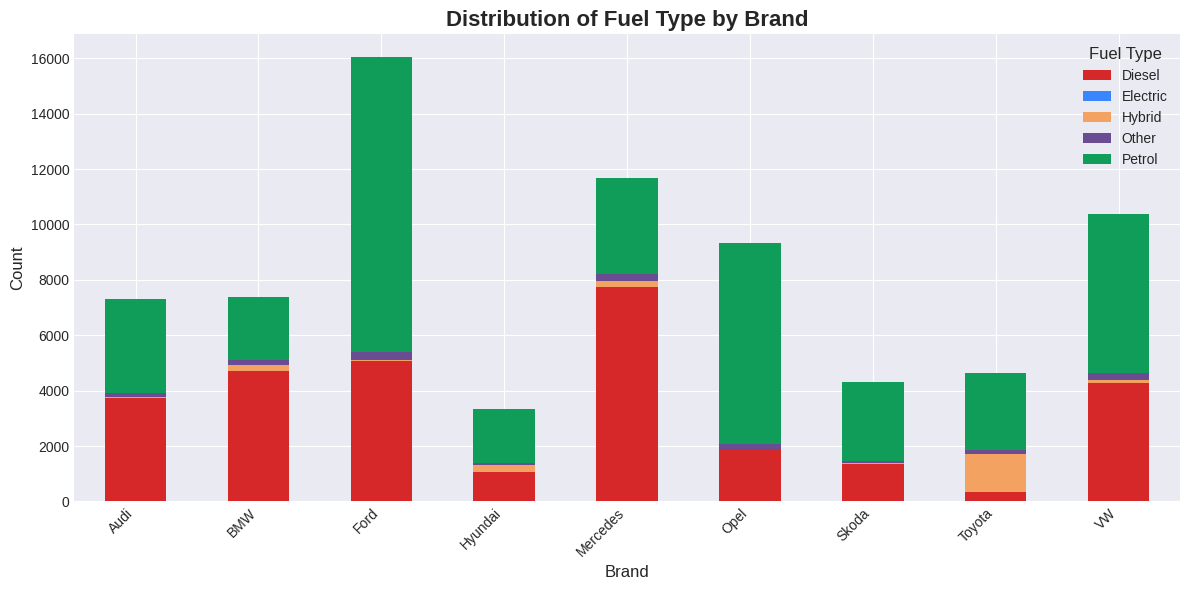

In [316]:
#Set modern style
plt.style.use('seaborn-v0_8-darkgrid')

#Create a cross-tab of Brand vs Fuel Type
brand_fuel_ct = pd.crosstab(df_train['Brand'], df_train['fuelType'])

#Assign distinct colors for each fuel type
colors = {
    'Diesel': '#d62828',    #red
    'Electric': '#3a86ff',  #blue
    'Hybrid': '#f4a261',    #orange
    'Other': '#6a4c93',     #purple
    'Petrol': '#109d59'     #green
}

#Ensure the color order matches the columns in the crosstab
brand_fuel_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[colors[col] for col in brand_fuel_ct.columns]
)

plt.title('Distribution of Fuel Type by Brand', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()





A majority of the company's inventory consists of Ford vehicles. A clear distinction emerges when comparing Ford (an American brand) to key German brands like Mercedes and BMW: most Ford vehicles acquired operate on Petrol, whereas the German counterparts are predominantly Diesel. Furthermore, Toyota shows a significantly higher percentage of Hybrid vehicles compared to all other brands.

/tmp/ipython-input-3353414328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


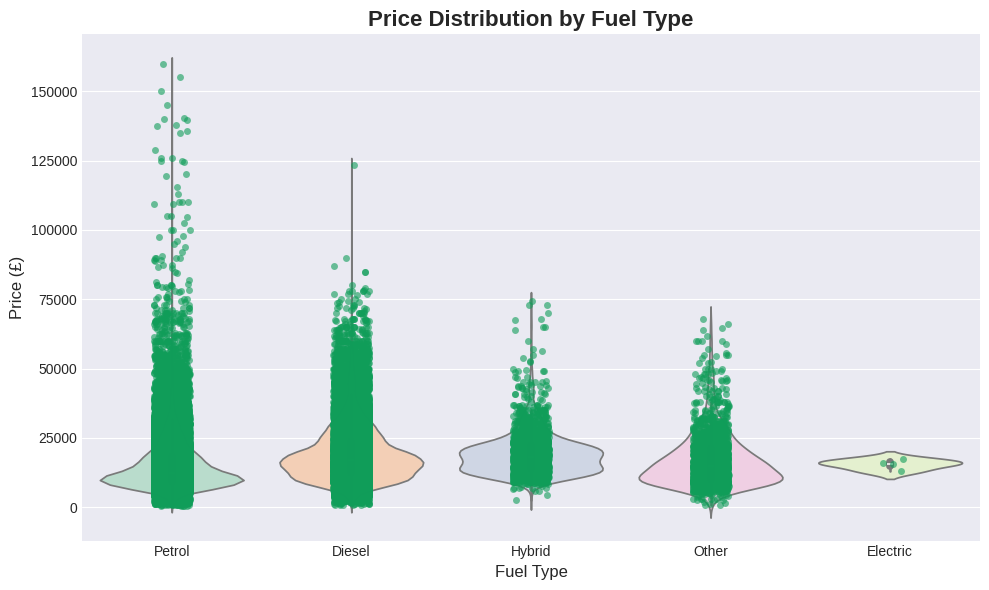

In [317]:
plt.figure(figsize=(10, 6))

#Violin plot for density
sns.violinplot(
    x='fuelType',
    y='price',
    data=df_train,
    palette='Pastel2'
)

#Overlay strip plot for individual points
sns.stripplot(
    x='fuelType',
    y='price',
    data=df_train,
    color='#109d59',
    alpha=0.6,
    jitter=True
)

plt.title('Price Distribution by Fuel Type', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.tight_layout()
plt.show()


This plot shows the distribution of car prices across different fuel types. Petrol and Diesel vehicles exhibit the widest price ranges and the highest variability, with Petrol showing several high-priced outliers. Hybrid vehicles tend to have higher median prices than Petrol and Diesel, reflecting their newer technology. Electric cars appear in a narrower and generally higher price range, though the sample size is smaller. Overall, fuel type is clearly associated with systematic differences in vehicle pricing.

We also plotted, after evaluating some important inconsistencies, bar plots to evaluate categorical variables.

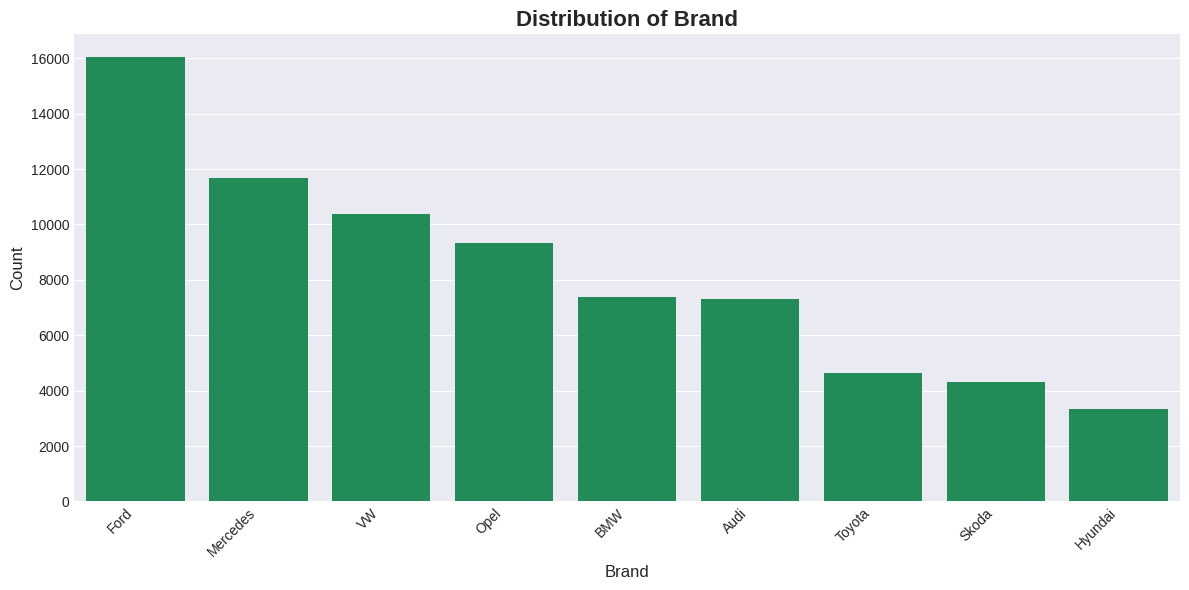

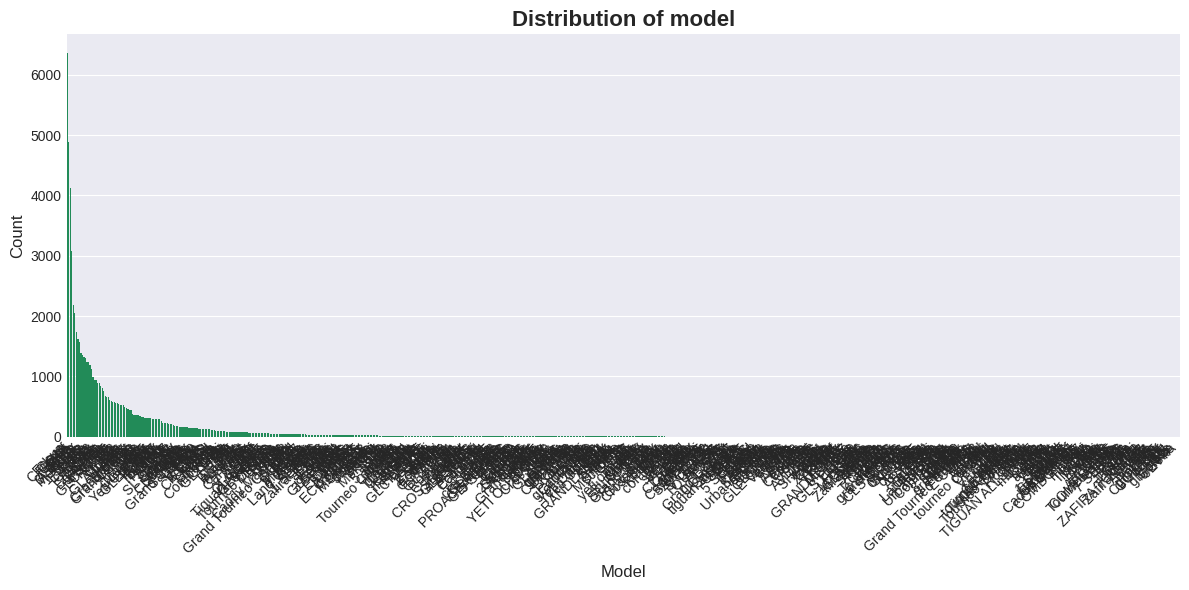

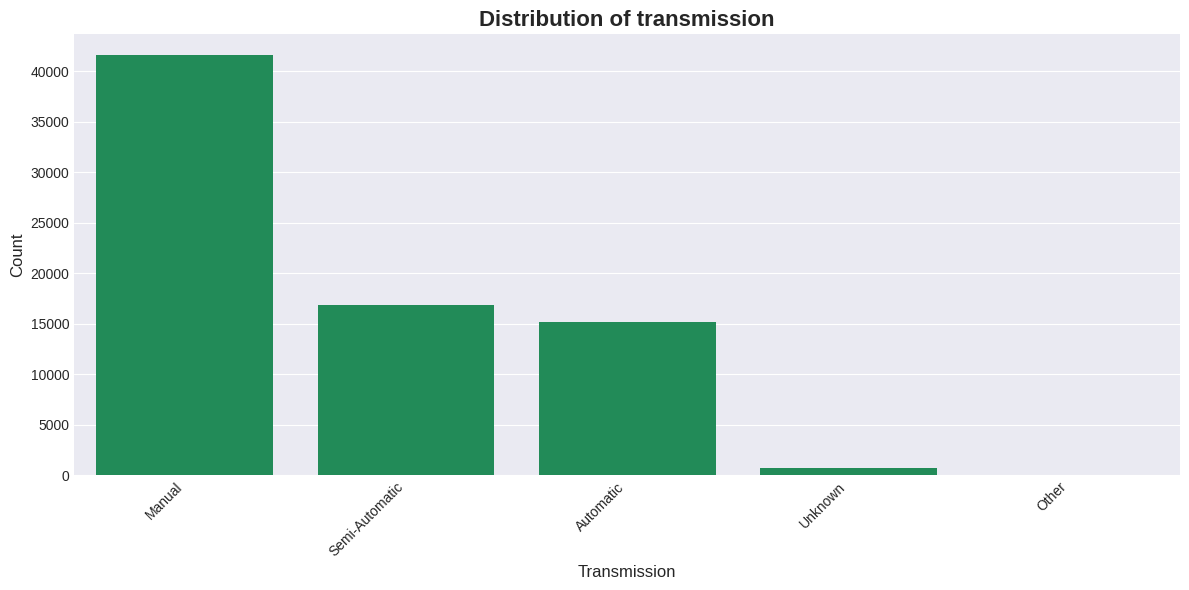

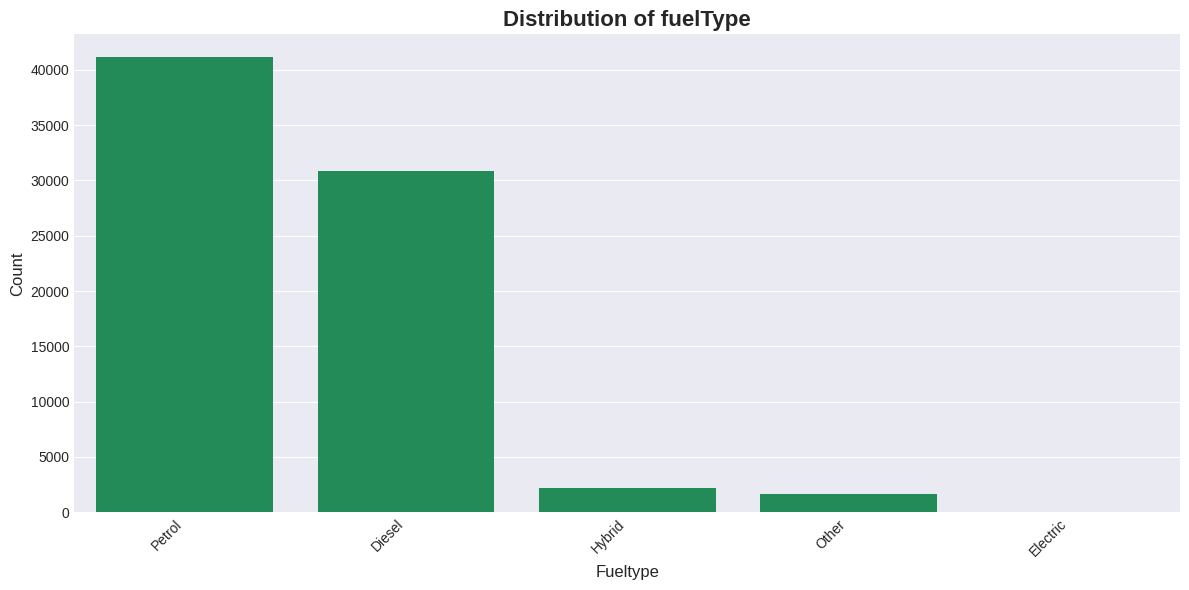

In [318]:
#Set a modern style for the plots
plt.style.use('seaborn-v0_8-darkgrid')

categorical_cols = ['Brand', 'model', 'transmission', 'fuelType']
for col in categorical_cols:
  plt.figure(figsize=(12, 6))
  #Use sns.countplot for categorical data, with the specified color
  sns.countplot(x=col, data=df_train, color='#109d59', order=df_train[col].value_counts().index)
  plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold') #Enhance title
  plt.xlabel(col.replace('_', ' ').title(), fontsize=12)
  plt.ylabel('Count', fontsize=12) #Use 'Count' for y-axis
  plt.xticks(rotation=45, ha='right', fontsize=10) #Rotate x-axis labels for readability
  plt.yticks(fontsize=10)
  plt.tight_layout()
  plt.show()

Data Exploration: Categorical Variable Distributions

The dataset exhibits significant class imbalances across categorical features, which have important implications for our modeling approach.

**Brand Distribution**: Ford dominates the dataset with approximately 16,000 entries (21% of total), followed by Mercedes (11,500) and VW (10,400). This imbalance suggests that our model will have higher confidence when predicting prices for Ford, Mercedes, and VW vehicles, while predictions for underrepresented brands may be less reliable.

**Model Distribution**: The model variable shows extreme cardinality with hundreds of unique values. The distribution follows a steep power-law pattern, where a few models (Fiesta, Focus, C-Class) appear frequently (>2,000 occurrences), while the vast majority of models have fewer than 100 instances. This long-tail distribution poses a challenge for categorical encoding and explains why `model` emerged as the dominant feature in our future SHAP analysis, as it captures granular information that `brand` alone cannot provide.

**Transmission Type**: Manual transmissions overwhelmingly dominate (41,000 entries, 57%), followed by Semi-Automatic (16,500, 23%) and Automatic (15,000, 21%).

**Fuel Type**: Petrol vehicles constitute the majority (40,500, 56%), with Diesel forming a substantial minority (30,500, 42%). Hybrid (2,000, 3%) and "Other" fuel types (1,500) are underrepresented, while Electric vehicles are nearly absent. This reflects the 2020 UK used car market composition but indicates our model may struggle with hybrid/electric price predictions due to insufficient training examples.

**Modeling Implications**: These imbalances were addressed through our encoding strategy (Target Encoding with regularization for high-cardinality features) and informed our choice of tree-based models (HistGradientBoosting), which handle class imbalance better than linear models.

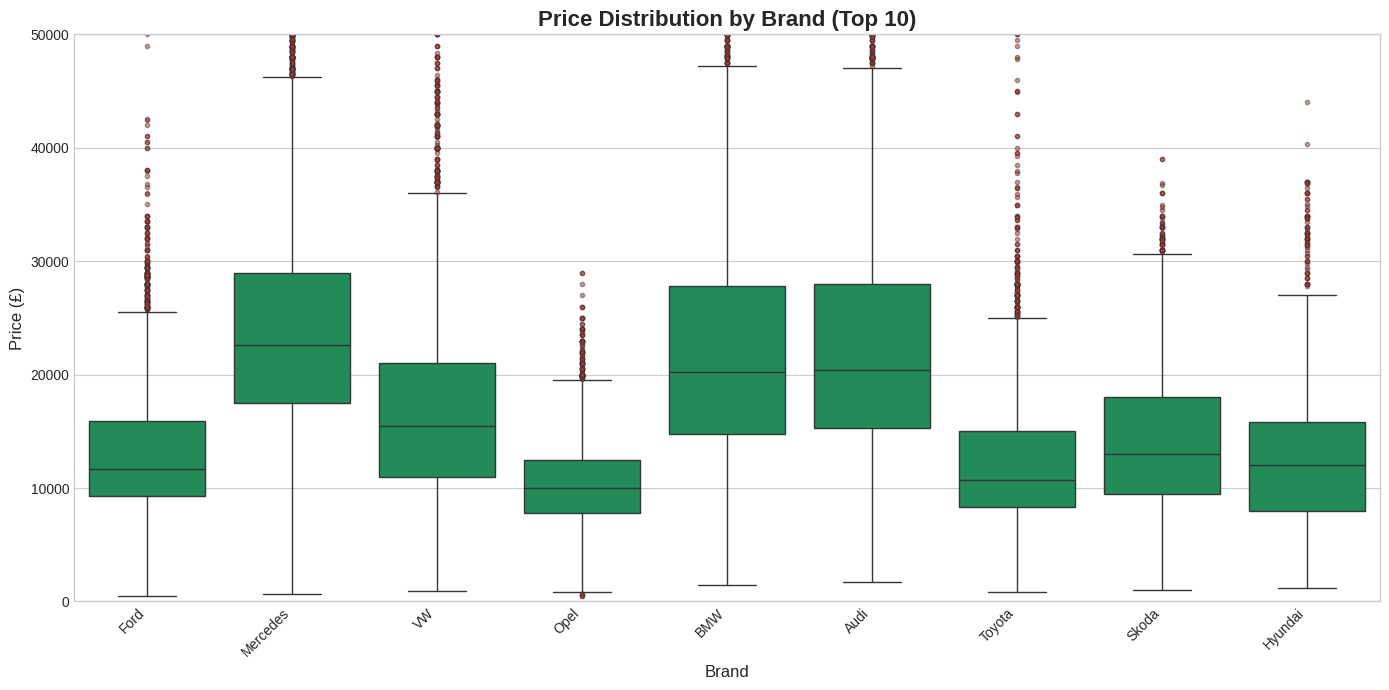

In [319]:
plt.style.use('seaborn-v0_8-whitegrid')

green_box_color = '#109d59'
red_outlier_color = '#D93025'

#Identify the 10 most frequent brands
top_10_brands = df_train['Brand'].value_counts().index[:10]

plt.figure(figsize=(14, 7))

#Create the Box Plot
sns.boxplot(
    data=df_train,
    x='Brand',
    y='price',
    order=top_10_brands, #Focus only on the top 10
    color=green_box_color,
    fliersize=3, #Size of the outlier points
    flierprops=dict(markerfacecolor=red_outlier_color, marker='o', alpha=0.5) #Color and style of outliers
)

plt.title('Price Distribution by Brand (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)

plt.xticks(rotation=45, ha='right')

#limit the Y-axis for better visualization (to handle extreme outliers)
plt.ylim(0, 50000)

plt.tight_layout()
plt.show()

This boxplot compares car price distributions across the ten most common brands. Premium brands such as Mercedes, BMW, and Audi show higher median prices and wider spreads, reflecting a broader range of higher-end models. In contrast, Ford, Opel, Hyundai, Toyota, and Skoda have lower median prices and tighter distributions, indicating a stronger focus on budget and mid-range vehicles. The presence of outliers across most brands highlights variation due to model type, vehicle age, etc.

##  2.3 Inconsistencies

Back to the inconsistencies.
We identify and remove rows containing **physically impossible negative values** in core numerical features (`mileage`, `tax`, `mpg`, `engineSize`, and `previousOwners`). These entries represent outliers or errors in data collection that can severely distort model training. By strictly removing these **inconsistencies** from the training set, we ensure the model learns based on valid, realistic data distributions, improving its **integrity and generalizability**.

In [320]:
for col in numerical_cols:
    negative_count = (df_train[col] < 0).sum()
    print(f"Column '{col}': {negative_count} negative values")

Column 'year': 0 negative values
Column 'price': 0 negative values
Column 'mileage': 369 negative values
Column 'tax': 378 negative values
Column 'mpg': 36 negative values
Column 'engineSize': 84 negative values
Column 'paintQuality%': 0 negative values
Column 'previousOwners': 371 negative values


Fixing inconsistencies, removing impossible negative values.

In [321]:
#List of columns to check for negative values
cols_to_check = ['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']

original_rows = len(df_train)

#Filter out rows where any of the specified columns have negative values
df_train = df_train[~(df_train[cols_to_check] < 0).any(axis=1)].copy()
removed_rows = original_rows - len(df_train)

print(f"Removed {removed_rows} rows with negative values in the specified columns.")
print(f"Number of rows after removing negative values: {len(df_train)}")

Removed 1226 rows with negative values in the specified columns.
Number of rows after removing negative values: 74700


In [322]:
#List of columns to check for negative values
cols_to_check = ['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']

#Count negative values in each specified column
negative_counts = (df_train[cols_to_check] < 0).sum()

print("Number of negative values in each column:")
print(negative_counts)


Number of negative values in each column:
mileage           0
tax               0
mpg               0
engineSize        0
previousOwners    0
dtype: int64


Removing the rows that are inferior to 2021 as the database is untill 2020.

In [323]:
original_rows = len(df_train)

#Filter out rows where 'year' is greater than or equal to 2021
df_train = df_train[df_train['year'] < 2021].copy()
removed_rows = original_rows - len(df_train)

print(f"Removed {removed_rows} rows with 'year' >= 2021.")
print(f"Number of rows after removing rows with 'year' >= 2021: {len(df_train)}")

Removed 1814 rows with 'year' >= 2021.
Number of rows after removing rows with 'year' >= 2021: 72886


Test Set Inconsistency Correction
For the Test Set (df_test), we cannot drop any rows, as the final submission requires predictions for all car identifiers. To handle impossible negative values in numerical features (e.g., mileage, tax), we apply the absolute value (.abs()). This strategy corrects the sign error, ensuring data integrity and compliance with the deployment requirements.

In [324]:
#Columns to check for non-physical/impossible negative values.
cols_to_check = ['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']

#Create a temp column ('neg_rows') counting the number of negative values per row.
df_test['neg_rows'] = (df_test[cols_to_check] < 0).sum(axis=1)

#Count the total number of rows that have at least one negative value.
neg_rows_1 = (df_test['neg_rows'] > 0).sum()

#Remove the temporary column.
df_test = df_test.drop('neg_rows', axis=1)

#Report the data quality issue count.
print(f" The number of lines with at least one negative value is {neg_rows_1}")

 The number of lines with at least one negative value is 544


Again for the test, no removal, the same approach.

In [325]:
#columns with potentially non-physical negative values.
cols_to_check = ['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']

#Record initial row count.
original_rows_test = len(df_test)

#Loop through columns to correct negative values.
for col in cols_to_check:
    #Ensure column exists before processing.
    if col in df_test.columns:
        #Replace negative values with their absolute (positive) equivalent.
        df_test.loc[df_test[col] < 0, col] = df_test.loc[df_test[col] < 0, col].abs()

#Confirm correction. Row count is unchanged.
print(f"\n df_test corrected. Number of rows: {original_rows_test}).")


 df_test corrected. Number of rows: 32567).


For the **Test Set** (`df_test`), we cannot drop any rows.

Observations with a `year` of registration greater than or equal to 2021 are deemed **impossible** in the context of a 2020 database. To handle these inconsistencies without data loss, we apply **clipping** to the outlier values. We set any `year` $\ge 2021$ to the maximum plausible value of **2020**. This ensures model integrity and full compliance with the deployment requirement of generating predictions for all observations.

In [326]:
#Define the maximum acceptable year.
max_year = 2020

#Record initial row count.
original_rows_test = len(df_test)

#Identify rows where 'year' is >= max_year.
impossible_lines = df_test['year'] >= max_year

#Correct impossible 'year' values by setting them to max_year.
df_test.loc[impossible_lines, 'year'] = max_year

#Report the number of corrected rows.
print(f"Corrected rows (year >= {max_year}): {impossible_lines.sum()}")
#Confirm that the number of rows is unchanged.
print(f"Number of rows on df_test: {len(df_test)}")

Corrected rows (year >= 2020): 1516
Number of rows on df_test: 32567


We removed observations with physically impossible negative values from the training set to avoid teaching the model on data-entry errors. The affected columns were: mileage (368), tax (378), mpg (36), engineSize (84) and previousOwners (371). Rows with any negative value in these fields were dropped. Deleting them is justified for training because negatives are clearly invalid.

For the test set we did not drop rows (to preserve submission completeness): instead we corrected values (absolute value for negatives) and clipped implausible years to 2020.

## 3.Hold out method


The 75% / 25% split for Training and Validation sets is the industry standard (default) for machine learning projects with moderate dataset sizes. This ratio maximizes the data available for the model to learn from (75% for robust training) while reserving a statistically significant portion (25% for reliable internal evaluation and optimization, such as feature selection and hyperparameter tuning).

Having said that we are going to proceed with that.

In [327]:

X = df_train.drop('price', axis=1)
y = df_train['price']

#Split the data into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (54664, 11)
Shape of X_val: (18222, 11)
Shape of y_train: (54664,)
Shape of y_val: (18222,)


## 4.Data Preprocessing

### 4.1 Handling NA


In [328]:

missing_brand_mask = X_train['Brand'].isna() | (X_train['Brand'] == '')

missing_brand_rows_xtrain = X_train[missing_brand_mask]

#Display the filtered rows
print("Rows in X_train with missing 'Brand' values (NaN ou ''):")
display(missing_brand_rows_xtrain)

Rows in X_train with missing 'Brand' values (NaN ou ''):


,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners
carID,,,,,,,,,,,
9445,NaN,3 Series,2019.0,Semi-Automatic,4990.000000,Diesel,145.0,62.8,2.0,64.0,0.0
70416,NaN,Golf,2016.0,Manual,85454.586292,Diesel,20.0,68.9,2.0,85.0,4.0
19794,NaN,Focus,2019.0,Automatic,7426.000000,Petrol,NaN,NaN,1.0,34.0,0.0
50432,NaN,Karo,2018.0,Manual,19758.000000,Petrol,145.0,53.3,1.0,95.0,4.0
55124,NaN,Yaris,2017.0,Automatic,14646.000000,Hybrid,0.0,86.0,1.5,83.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
25796,NaN,EcoSport,2017.0,Manual,38454.000000,Petrol,125.0,53.3,1.0,92.0,3.0
72034,NaN,Golf,2019.0,Manual,5365.000000,Diesel,145.0,57.7,1.6,71.0,4.0
657,NaN,Q5,2016.0,Semi-Automatic,39443.000000,Diesel,200.0,47.1,2.0,96.0,4.0


We can see that we have some observations where we have NaN, so we need to treat that. In a first glance we will focus on the NaN's of the Brand variable.

Filling the Brand by looking at the model.

Intelligent Imputation: Brand by Model

"Intelligent imputation" as we call it was used for the Brand column. We leveraged the unique relationship between Model and Brand by creating a strict mapping from the training set. This context-based approach allows us to accurately infer and fill the missing brand based on the known car model, resulting in higher precision than using the global mode.

In [329]:


brand_models_raw = {
    "Audi": [' Q2',' A3',' Q3',' Q5',' TT',' a1',' A8',' A4',' A1',' A5',' A6',' Q7',' Q', np.nan,
             ' RS6',' q3',' a5','A4','Q3',' A7',' A','A5',' a4','Q5','A1',' RS5','A3',' R8',' Q8',
             ' RS3',' a3',' q5','A6',' SQ5',' RS4',' sq7',' S3',' tt',' S4',' q7',' q2',' A2','Q8',
             'Q7','TT',' a6',' S8',' RS','Q2',' a',' s3',' a7',' SQ7','RS6','A8','a8',' T',' S5',
             'A7','q5','R8','RS3',' r8'],

    "BMW": [' 2 Series','3 Series',' 3 Series ',' 3 Series',' 5 Series',' 4 Series',' X3',' X2',' X1',' 1 Series', np.nan,
            ' M3',' 2 series','1 Series',' 1 SERIES',' X4',' 3 Serie',' M4',' 3 series','5 Series',' Z4',' 2 serie',
            ' X5',' x1','X5',' 6 Series',' 4 SERIES',' 4 Serie',' 4 serie',' 1 Serie','4 series',' X',' 5 Serie',
            ' X6',' 8 Series',' Z3','2 Series',' x5',' 7 Series',' 5 SERIES','4 Series',' 5 series',' 1 series',
            ' 3 SERIES',' i3',' x2',' 4 series',' i8',' X7',' 2 SERIES',' x3',' 2 Serie',' 3 serie',' 7 Serie',' M5',
            '2 Serie',' x','Z4',' 6 SERIES','X2','M3','x1',' Z','X6',' M','5 SERIES',' 6 series',' 8 Serie',' M2',
            '6 Series','1 SERIES',' 1 SERIE','X1','X7','X3','Z3',' 7 SERIES','i3','1 series',' 1 serie',' i',
            ' 7 series',' M6','M5','3 Serie',' z4',' 6 Serie',' 8 series',' 8 SERIES',' I3',' m3','X4',' m4'],

    "Ford": [' FIESTA',' Focus',' Ka+',' Fiesta','Focus',' EcoSport',' EcoSpor', np.nan,' B-MAX',' fiesta',
             ' S-MAX',' Mondeo',' Kuga',' Tourneo Connect',' Focu',' Fiest',' FOCUS',' Galaxy',' KA',
             ' Grand Tourneo Connect',' Tourneo Custom',' focus',' Kug',' MONDEO',' C-MAX',' Puma','Ka+',
             ' Grand C-MAX',' GRAND C-MAX',' KUGA',' EDGE',' Fusion',' kuga',' Edge','Mondeo',' ECOSPORT',
             ' Mustang',' B-MA','Kuga',' Ka',' FOCU','Fiesta',' mondeo','focus',' S-MA',' puma',' GALAXY',
             ' Galax','Focu','B-MAX',' Escort',' MONDE',' Monde',' edge',' mustang',' KA+',' Streetka',
             ' ecosport',' ka+',' c-max',' galaxy',' ka','B-MA',' C-MA',' tourneo custom',' b-max',
             ' tourneo connect',' s-max',' PUMA',' grand c-max','C-MAX',' K',' Grand C-MA','S-MAX','Mustang',
             'EcoSport',' Ranger','fiesta','Fiest',' Grand Tourneo Connec','Tourneo Connect','Galaxy',
             'FIESTA','Fusion',' Tourneo Custo',' Edg',' focu','KA','ka+','Grand C-MAX','kuga',' s-ma','FOCUS'],

    "Hyundai": [' I30',' Tucson',' IX20',' i20',' I20',' Kona',' I10',' Ioniq','Tucson',' Santa Fe',' I800',
                ' Getz',' IX35',' I40',' I3', np.nan,' i10',' TUCSON',' I1',' Tucso',' i30',' KONA','I10',
                'I40',' I80',' Ioni',' Veloste',' Santa F',' santa fe','Ioniq',' Accent',' Kon','Kona',
                ' SANTA FE','I20','Santa Fe',' tucson',' I2',' KON',' IONIQ',' ix20','I30',' kona','IONIQ',
                ' TUCSO',' i40','Tucso',' IX2',' ix35','IX35',' ioniq','IX20',' Terracan'],

    "Mercedes": [' A Clas',' A Class',' GLC Class',' C Class',' E Class',' C Clas',' SLK',' X-CLASS',
                 ' CL Class',' GLS Class',' GLE Class',' C CLASS',' S Class',' GLA Class',' SL CLASS',
                 ' c class',' B Class',' V Class',' E Clas',' E CLASS', np.nan,'E Class',' CLS Class',
                 ' CLA Class',' GLE Clas','A Class','C Class','GLC Class',' GL Class',' SL CLAS','GLA Class',
                 'CLA Class',' M Class',' b class',' V Clas','GLE Class',' cl class',' CLK',' a class',
                 ' e class',' m class',' GLC CLASS',' slk',' B Clas',' A CLASS',' G Class',' GLA CLASS',
                 ' x-clas',' GLC Clas',' GLA Clas',' CL Clas',' X-CLAS',' gla class',' gle class',' x-class',
                 ' GLB Class',' glc class',' CL CLASS','200','SL CLASS',' v class','B Class','CLS Class',
                 ' cls class','C Clas',' S Clas','E CLASS',' V CLASS','SLK',' CLS Clas',' s class','a class',
                 ' S CLASS',' C CLAS','220',' B CLASS',' CLS CLASS',' CLA CLASS','230','b class',' GLS Clas',
                 ' M CLASS','M Class',' GL CLASS',' M Clas',' sl class','CL Class','c class','A CLASS',
                 ' GLS CLASS',' a clas','e class',' c clas',' SL',' CLC Class','CLK',' GLE CLASS',' gls class',
                 ' glc clas','V Class','S Class',' cla class','GL Class',' glb class'],

    "Opel": [' Insignia',' Mokka X',' Corsa',' Astra',' Viva',' Adam',' Mokka',' Crossland X', np.nan,
             ' mokka x',' Zafira',' INSIGNIA',' Grandland X',' ASTRA',' Astr',' Combo Life',' GTC',' Meriva',
             ' Mokka ',' crossland x',' Mokk','Astra',' viva',' Agila',' astra',' corsa',' MOKKA X','ASTRA',
             ' Insigni','Meriva',' Grandland ','Corsa',' Zafira Tourer','Grandland X','Viva',' Antara',
             'Mokka X',' Kadjar',' Cors',' Zafira Toure',' MERIVA','Mokka',' VIVA',' mokka ',' insignia',
             ' mokka',' grandland x','Insignia',' COMBO LIFE','Zafira',' Crossland ',' Tigra',' CORSA',' Vivaro',
             'gtc','Adam',' Viv',' Zafir',' ZAFIRA',' Cascada','GTC',' CROSSLAND X',' zafira',' Ada',' INSIGNI',
             ' adam','Crossland X',' MOKKA',' Meriv','Zafir',' VECTRA',' combo life','Insigni',' Ampera','astra',
             ' ADAM',' Combo Lif',' cors',' meriva',' CORS','COMBO LIFE','corsa','Vectra',' gtc','Mokka ',
             'Combo Life',' GRANDLAND X','Mokk',' Vectra',' ZAFIRA TOURER','Zafira Tourer'],

    "Skoda": [' Octavia',' Fabia',' Rapid',' Yeti Outdoor',' Scala',' Kamiq',' Citigo',' Roomster',' Kodiaq',
              ' SUPERB','Fabia',' Superb',' Octavi',' yeti outdoor',' Karoq',' Yeti', np.nan,'Karoq',' fabia',
              ' Kodia',' FABIA',' YETI OUTDOOR',' Rapi',' KAMIQ',' rapid',' Citig',' Super',' OCTAVIA',' SCALA',
              ' kodiaq','Superb','Octavia',' citigo',' Yeti Outdoo','Citigo',' Fabi',' yeti',' CITIGO',' superb',
              ' Roomste','Scala',' KAMI',' karoq',' octavia',' KAROQ',' scala','kodiaq',' KODIAQ','Octavi',' super',
              ' Karo',' Scal',' scal','Roomster',' kamiq','Yeti Outdoor',' Yet','FABIA','Rapid','octavia','Yeti',
              'Kodiaq'],

    "Toyota": [' Yaris',' C-HR',' Aygo',' Auris',' RAV4',' Prius',' Corolla',' YARIS',' PRIUS', np.nan,'Auris',
               ' Verso',' AURIS',' Ayg',' GT86',' Land Cruiser',' rav4',' PROACE VERSO',' hilux',' Hilux',' Avensis',
               'Yaris',' VERSO',' Camry',' auris','RAV4',' Yari',' aygo','Prius',' ayg',' Supra',' AYGO',' C-H',' c-hr',
               ' yaris',' Verso-S',' corolla','Aygo',' Auri',' IQ','RAV',' gt86','Hilux',' verso','C-HR',' RAV','rav4',
               ' COROLLA',' AVENSIS','Verso',' Urban Cruiser',' avensis',' Coroll','aygo',' yari',' prius','Supra','Yari',
               ' YARI',' Hilu',' Urban Cruise','corolla',' Land Cruise',' rav','Corolla',' Vers',' AYG','Avensis','yaris'],

    "VW": [' Golf',' Passat',' Polo',' Up',' sharan',' Tiguan',' T-Roc',' polo',' Arteon', np.nan,' Touran',' Sharan',
           ' POLO',' GOLF',' Caddy Maxi Life','T-Roc',' Beetle','Golf',' Shara','Touran',' Touareg',' Shuttle',
           ' Tiguan Allspace',' Caravelle',' Pol',' T-Cross',' Golf SV',' Gol',' California','Touareg','Toura',
           ' Caddy Life','Polo',' Scirocco',' TOURAN',' tiguan',' Passa',' Amarok',' CC',' Eos','Tiguan',' Tigua',
           ' T-RO',' Jetta','Golf SV',' golf','U',' PASSAT',' passat','golf',' t-roc',' Arteo',' T-Ro',' up',' TOUAREG',
           ' T-Cros','Passat',' T-ROC',' UP',' TIGUAN',' Caddy Maxi',' amarok','Up',' scirocco',' U','Arteon',' T-CROSS',
           ' Caddy','polo',' TIGUAN ALLSPACE',' caravelle',' touareg',' SCIROCCO',' shuttle',' Scirocc',' touran',' gol',
           ' tiguan allspace',' Golf S',' Toura',' Beetl','Beetle',' TIGUA','Amarok',' golf s',' golf sv','Scirocco',
           ' Caravell','Pol',' cc',' Tiguan Allspac','Sharan','UP','T-Cross',' Fox',' Amaro','Arteo','Tigua','Golf S',
           'CC',' Caddy Maxi Lif',' t-cros',' Touare',' GOL','TIGUAN',' TOURA',' GOLF SV','tiguan',' SHARAN','Gol',
           ' t-cross',' JETTA',' ARTEON',' beetle',' arteon']
}


model_to_brand = {}
for brand, models in brand_models_raw.items():
    for m in models:
        if pd.isna(m):
            continue
        key = str(m).strip().lower()
        model_to_brand[key] = brand


def fill_brand(row):
    if pd.isna(row['Brand']) or row['Brand'] == '':
        model_key = str(row['model']).strip().lower()
        return model_to_brand.get(model_key, np.nan)
    return row['Brand']


X_train['Brand'] = X_train.apply(fill_brand, axis=1)


In [330]:

brand_models_raw = {
    "Audi": [' Q2',' A3',' Q3',' Q5',' TT',' a1',' A8',' A4',' A1',' A5',' A6',' Q7',' Q', np.nan,
             ' RS6',' q3',' a5','A4','Q3',' A7',' A','A5',' a4','Q5','A1',' RS5','A3',' R8',' Q8',
             ' RS3',' a3',' q5','A6',' SQ5',' RS4',' sq7',' S3',' tt',' S4',' q7',' q2',' A2','Q8',
             'Q7','TT',' a6',' S8',' RS','Q2',' a',' s3',' a7',' SQ7','RS6','A8','a8',' T',' S5',
             'A7','q5','R8','RS3',' r8'],

    "BMW": [' 2 Series','3 Series',' 3 Series',' 5 Series',' 4 Series',' X3',' X2',' X1',' 1 Series', np.nan,
            ' M3',' 2 series','1 Series',' 1 SERIES',' X4',' 3 Serie',' M4',' 3 series','5 Series',' Z4',' 2 serie',
            ' X5',' x1','X5',' 6 Series',' 4 SERIES',' 4 Serie',' 4 serie',' 1 Serie','4 series',' X',' 5 Serie',
            ' X6',' 8 Series',' Z3','2 Series',' x5',' 7 Series',' 5 SERIES','4 Series',' 5 series',' 1 series',
            ' 3 SERIES',' i3',' x2',' 4 series',' i8',' X7',' 2 SERIES',' x3',' 2 Serie',' 3 serie',' 7 Serie',' M5',
            '2 Serie',' x','Z4',' 6 SERIES','X2','M3','x1',' Z','X6',' M','5 SERIES',' 6 series',' 8 Serie',' M2',
            '6 Series','1 SERIES',' 1 SERIE','X1','X7','X3','Z3',' 7 SERIES','i3','1 series',' 1 serie',' i',
            ' 7 series',' M6','M5','3 Serie',' z4',' 6 Serie',' 8 series',' 8 SERIES',' I3',' m3','X4',' m4'],

    "Ford": [' FIESTA',' Focus',' Ka+',' Fiesta','Focus',' EcoSport',' EcoSpor', np.nan,' B-MAX',' fiesta',
             ' S-MAX',' Mondeo',' Kuga',' Tourneo Connect',' Focu',' Fiest',' FOCUS',' Galaxy',' KA',
             ' Grand Tourneo Connect',' Tourneo Custom',' focus',' Kug',' MONDEO',' C-MAX',' Puma','Ka+',
             ' Grand C-MAX',' GRAND C-MAX',' KUGA',' EDGE',' Fusion',' kuga',' Edge','Mondeo',' ECOSPORT',
             ' Mustang',' B-MA','Kuga',' Ka',' FOCU','Fiesta',' mondeo','focus',' S-MA',' puma',' GALAXY',
             ' Galax','Focu','B-MAX',' Escort',' MONDE',' Monde',' edge',' mustang',' KA+',' Streetka',
             ' ecosport',' ka+',' c-max',' galaxy',' ka','B-MA',' C-MA',' tourneo custom',' b-max',
             ' tourneo connect',' s-max',' PUMA',' grand c-max','C-MAX',' K',' Grand C-MA','S-MAX','Mustang',
             'EcoSport',' Ranger','fiesta','Fiest',' Grand Tourneo Connec','Tourneo Connect','Galaxy',
             'FIESTA','Fusion',' Tourneo Custo',' Edg',' focu','KA','ka+','Grand C-MAX','kuga',' s-ma','FOCUS'],

    "Hyundai": [' I30',' Tucson',' IX20',' i20',' I20',' Kona',' I10',' Ioniq','Tucson',' Santa Fe',' I800',
                ' Getz',' IX35',' I40',' I3', np.nan,' i10',' TUCSON',' I1',' Tucso',' i30',' KONA','I10',
                'I40',' I80',' Ioni',' Veloste',' Santa F',' santa fe','Ioniq',' Accent',' Kon','Kona',
                ' SANTA FE','I20','Santa Fe',' tucson',' I2',' KON',' IONIQ',' ix20','I30',' kona','IONIQ',
                ' TUCSO',' i40','Tucso',' IX2',' ix35','IX35',' ioniq','IX20',' Terracan'],

    "Mercedes": [' A Clas',' A Class',' GLC Class',' C Class',' E Class',' C Clas',' SLK',' X-CLASS',
                 ' CL Class',' GLS Class',' GLE Class',' C CLASS',' S Class',' GLA Class',' SL CLASS',
                 ' c class',' B Class',' V Class',' E Clas',' E CLASS', np.nan,'E Class',' CLS Class',
                 ' CLA Class',' GLE Clas','A Class','C Class','GLC Class',' GL Class',' SL CLAS','GLA Class',
                 'CLA Class',' M Class',' b class',' V Clas','GLE Class',' cl class',' CLK',' a class',
                 ' e class',' m class',' GLC CLASS',' slk',' B Clas',' A CLASS',' G Class',' GLA CLASS',
                 ' x-clas',' GLC Clas',' GLA Clas',' CL Clas',' X-CLAS',' gla class',' gle class',' x-class',
                 ' GLB Class',' glc class',' CL CLASS','200','SL CLASS',' v class','B Class','CLS Class',
                 ' cls class','C Clas',' S Clas','E CLASS',' V CLASS','SLK',' CLS Clas',' s class','a class',
                 ' S CLASS',' C CLAS','220',' B CLASS',' CLS CLASS',' CLA CLASS','230','b class',' GLS Clas',
                 ' M CLASS','M Class',' GL CLASS',' M Clas',' sl class','CL Class','c class','A CLASS',
                 ' GLS CLASS',' a clas','e class',' c clas',' SL',' CLC Class','CLK',' GLE CLASS',' gls class',
                 ' glc clas','V Class','S Class',' cla class','GL Class',' glb class'],

    "Opel": [' Insignia',' Mokka X',' Corsa',' Astra',' Viva',' Adam',' Mokka',' Crossland X', np.nan,
             ' mokka x',' Zafira',' INSIGNIA',' Grandland X',' ASTRA',' Astr',' Combo Life',' GTC',' Meriva',
             ' Mokka ',' crossland x',' Mokk','Astra',' viva',' Agila',' astra',' corsa',' MOKKA X','ASTRA',
             ' Insigni','Meriva',' Grandland ','Corsa',' Zafira Tourer','Grandland X','Viva',' Antara',
             'Mokka X',' Kadjar',' Cors',' Zafira Toure',' MERIVA','Mokka',' VIVA',' mokka ',' insignia',
             ' mokka',' grandland x','Insignia',' COMBO LIFE','Zafira',' Crossland ',' Tigra',' CORSA',' Vivaro',
             'gtc','Adam',' Viv',' Zafir',' ZAFIRA',' Cascada','GTC',' CROSSLAND X',' zafira',' Ada',' INSIGNI',
             ' adam','Crossland X',' MOKKA',' Meriv','Zafir',' VECTRA',' combo life','Insigni',' Ampera','astra',
             ' ADAM',' Combo Lif',' cors',' meriva',' CORS','COMBO LIFE','corsa','Vectra',' gtc','Mokka ',
             'Combo Life',' GRANDLAND X','Mokk',' Vectra',' ZAFIRA TOURER','Zafira Tourer'],

    "Skoda": [' Octavia',' Fabia',' Rapid',' Yeti Outdoor',' Scala',' Kamiq',' Citigo',' Roomster',' Kodiaq',
              ' SUPERB','Fabia',' Superb',' Octavi',' yeti outdoor',' Karoq',' Yeti', np.nan,'Karoq',' fabia',
              ' Kodia',' FABIA',' YETI OUTDOOR',' Rapi',' KAMIQ',' rapid',' Citig',' Super',' OCTAVIA',' SCALA',
              ' kodiaq','Superb','Octavia',' citigo',' Yeti Outdoo','Citigo',' Fabi',' yeti',' CITIGO',' superb',
              ' Roomste','Scala',' KAMI',' karoq',' octavia',' KAROQ',' scala','kodiaq',' KODIAQ','Octavi',' super',
              ' Karo',' Scal',' scal','Roomster',' kamiq','Yeti Outdoor',' Yet','FABIA','Rapid','octavia','Yeti',
              'Kodiaq'],

    "Toyota": [' Yaris',' C-HR',' Aygo',' Auris',' RAV4',' Prius',' Corolla',' YARIS',' PRIUS', np.nan,'Auris',
               ' Verso',' AURIS',' Ayg',' GT86',' Land Cruiser',' rav4',' PROACE VERSO',' hilux',' Hilux',' Avensis',
               'Yaris',' VERSO',' Camry',' auris','RAV4',' Yari',' aygo','Prius',' ayg',' Supra',' AYGO',' C-H',' c-hr',
               ' yaris',' Verso-S',' corolla','Aygo',' Auri',' IQ','RAV',' gt86','Hilux',' verso','C-HR',' RAV','rav4',
               ' COROLLA',' AVENSIS','Verso',' Urban Cruiser',' avensis',' Coroll','aygo',' yari',' prius','Supra','Yari',
               ' YARI',' Hilu',' Urban Cruise','corolla',' Land Cruise',' rav','Corolla',' Vers',' AYG','Avensis','yaris'],

    "VW": [' Golf',' Passat',' Polo',' Up',' sharan',' Tiguan',' T-Roc',' polo',' Arteon', np.nan,' Touran',' Sharan',
           ' POLO',' GOLF',' Caddy Maxi Life','T-Roc',' Beetle','Golf',' Shara','Touran',' Touareg',' Shuttle',
           ' Tiguan Allspace',' Caravelle',' Pol',' T-Cross',' Golf SV',' Gol',' California','Touareg','Toura',
           ' Caddy Life','Polo',' Scirocco',' TOURAN',' tiguan',' Passa',' Amarok',' CC',' Eos','Tiguan',' Tigua',
           ' T-RO',' Jetta','Golf SV',' golf','U',' PASSAT',' passat','golf',' t-roc',' Arteo',' T-Ro',' up',' TOUAREG',
           ' T-Cros','Passat',' T-ROC',' UP',' TIGUAN',' Caddy Maxi',' amarok','Up',' scirocco',' U','Arteon',' T-CROSS',
           ' Caddy','polo',' TIGUAN ALLSPACE',' caravelle',' touareg',' SCIROCCO',' shuttle',' Scirocc',' touran',' gol',
           ' tiguan allspace',' Golf S',' Toura',' Beetl','Beetle',' TIGUA','Amarok',' golf s',' golf sv','Scirocco',
           ' Caravell','Pol',' cc',' Tiguan Allspac','Sharan','UP','T-Cross',' Fox',' Amaro','Arteo','Tigua','Golf S',
           'CC',' Caddy Maxi Lif',' t-cros',' Touare',' GOL','TIGUAN',' TOURA',' GOLF SV','tiguan',' SHARAN','Gol',
           ' t-cross',' JETTA',' ARTEON',' beetle',' arteon']
}



model_to_brand = {}
for brand, models in brand_models_raw.items():
    for m in models:
        if pd.isna(m):
            continue
        key = str(m).strip().lower()
        model_to_brand[key] = brand


def fill_brand(row):
    if pd.isna(row['Brand']) or row['Brand'] == '':
        model_key = str(row['model']).strip().lower()
        return model_to_brand.get(model_key, np.nan)
    return row['Brand']


X_val['Brand'] = X_val.apply(fill_brand, axis=1)


In [331]:

brand_models_raw = {
    "Audi": [' Q2',' A3',' Q3',' Q5',' TT',' a1',' A8',' A4',' A1',' A5',' A6',' Q7',' Q', np.nan,
             ' RS6',' q3',' a5','A4','Q3',' A7',' A','A5',' a4','Q5','A1',' RS5','A3',' R8',' Q8',
             ' RS3',' a3',' q5','A6',' SQ5',' RS4',' sq7',' S3',' tt',' S4',' q7',' q2',' A2','Q8',
             'Q7','TT',' a6',' S8',' RS','Q2',' a',' s3',' a7',' SQ7','RS6','A8','a8',' T',' S5',
             'A7','q5','R8','RS3',' r8'],

    "BMW": [' 2 Series','3 Series',' 3 Series',' 5 Series',' 4 Series',' X3',' X2',' X1',' 1 Series', np.nan,
            ' M3',' 2 series','1 Series',' 1 SERIES',' X4',' 3 Serie',' M4',' 3 series','5 Series',' Z4',' 2 serie',
            ' X5',' x1','X5',' 6 Series',' 4 SERIES',' 4 Serie',' 4 serie',' 1 Serie','4 series',' X',' 5 Serie',
            ' X6',' 8 Series',' Z3','2 Series',' x5',' 7 Series',' 5 SERIES','4 Series',' 5 series',' 1 series',
            ' 3 SERIES',' i3',' x2',' 4 series',' i8',' X7',' 2 SERIES',' x3',' 2 Serie',' 3 serie',' 7 Serie',' M5',
            '2 Serie',' x','Z4',' 6 SERIES','X2','M3','x1',' Z','X6',' M','5 SERIES',' 6 series',' 8 Serie',' M2',
            '6 Series','1 SERIES',' 1 SERIE','X1','X7','X3','Z3',' 7 SERIES','i3','1 series',' 1 serie',' i',
            ' 7 series',' M6','M5','3 Serie',' z4',' 6 Serie',' 8 series',' 8 SERIES',' I3',' m3','X4',' m4'],

    "Ford": [' FIESTA',' Focus',' Ka+',' Fiesta','Focus',' EcoSport',' EcoSpor', np.nan,' B-MAX',' fiesta',
             ' S-MAX',' Mondeo',' Kuga',' Tourneo Connect',' Focu',' Fiest',' FOCUS',' Galaxy',' KA',
             ' Grand Tourneo Connect',' Tourneo Custom',' focus',' Kug',' MONDEO',' C-MAX',' Puma','Ka+',
             ' Grand C-MAX',' GRAND C-MAX',' KUGA',' EDGE',' Fusion',' kuga',' Edge','Mondeo',' ECOSPORT',
             ' Mustang',' B-MA','Kuga',' Ka',' FOCU','Fiesta',' mondeo','focus',' S-MA',' puma',' GALAXY',
             ' Galax','Focu','B-MAX',' Escort',' MONDE',' Monde',' edge',' mustang',' KA+',' Streetka',
             ' ecosport',' ka+',' c-max',' galaxy',' ka','B-MA',' C-MA',' tourneo custom',' b-max',
             ' tourneo connect',' s-max',' PUMA',' grand c-max','C-MAX',' K',' Grand C-MA','S-MAX','Mustang',
             'EcoSport',' Ranger','fiesta','Fiest',' Grand Tourneo Connec','Tourneo Connect','Galaxy',
             'FIESTA','Fusion',' Tourneo Custo',' Edg',' focu','KA','ka+','Grand C-MAX','kuga',' s-ma','FOCUS'],

    "Hyundai": [' I30',' Tucson',' IX20',' i20',' I20',' Kona',' I10',' Ioniq','Tucson',' Santa Fe',' I800',
                ' Getz',' IX35',' I40',' I3', np.nan,' i10',' TUCSON',' I1',' Tucso',' i30',' KONA','I10',
                'I40',' I80',' Ioni',' Veloste',' Santa F',' santa fe','Ioniq',' Accent',' Kon','Kona',
                ' SANTA FE','I20','Santa Fe',' tucson',' I2',' KON',' IONIQ',' ix20','I30',' kona','IONIQ',
                ' TUCSO',' i40','Tucso',' IX2',' ix35','IX35',' ioniq','IX20',' Terracan'],

    "Mercedes": [' A Clas',' A Class',' GLC Class',' C Class',' E Class',' C Clas',' SLK',' X-CLASS',
                 ' CL Class',' GLS Class',' GLE Class',' C CLASS',' S Class',' GLA Class',' SL CLASS',
                 ' c class',' B Class',' V Class',' E Clas',' E CLASS', np.nan,'E Class',' CLS Class',
                 ' CLA Class',' GLE Clas','A Class','C Class','GLC Class',' GL Class',' SL CLAS','GLA Class',
                 'CLA Class',' M Class',' b class',' V Clas','GLE Class',' cl class',' CLK',' a class',
                 ' e class',' m class',' GLC CLASS',' slk',' B Clas',' A CLASS',' G Class',' GLA CLASS',
                 ' x-clas',' GLC Clas',' GLA Clas',' CL Clas',' X-CLAS',' gla class',' gle class',' x-class',
                 ' GLB Class',' glc class',' CL CLASS','200','SL CLASS',' v class','B Class','CLS Class',
                 ' cls class','C Clas',' S Clas','E CLASS',' V CLASS','SLK',' CLS Clas',' s class','a class',
                 ' S CLASS',' C CLAS','220',' B CLASS',' CLS CLASS',' CLA CLASS','230','b class',' GLS Clas',
                 ' M CLASS','M Class',' GL CLASS',' M Clas',' sl class','CL Class','c class','A CLASS',
                 ' GLS CLASS',' a clas','e class',' c clas',' SL',' CLC Class','CLK',' GLE CLASS',' gls class',
                 ' glc clas','V Class','S Class',' cla class','GL Class',' glb class'],

    "Opel": [' Insignia',' Mokka X',' Corsa',' Astra',' Viva',' Adam',' Mokka',' Crossland X', np.nan,
             ' mokka x',' Zafira',' INSIGNIA',' Grandland X',' ASTRA',' Astr',' Combo Life',' GTC',' Meriva',
             ' Mokka ',' crossland x',' Mokk','Astra',' viva',' Agila',' astra',' corsa',' MOKKA X','ASTRA',
             ' Insigni','Meriva',' Grandland ','Corsa',' Zafira Tourer','Grandland X','Viva',' Antara',
             'Mokka X',' Kadjar',' Cors',' Zafira Toure',' MERIVA','Mokka',' VIVA',' mokka ',' insignia',
             ' mokka',' grandland x','Insignia',' COMBO LIFE','Zafira',' Crossland ',' Tigra',' CORSA',' Vivaro',
             'gtc','Adam',' Viv',' Zafir',' ZAFIRA',' Cascada','GTC',' CROSSLAND X',' zafira',' Ada',' INSIGNI',
             ' adam','Crossland X',' MOKKA',' Meriv','Zafir',' VECTRA',' combo life','Insigni',' Ampera','astra',
             ' ADAM',' Combo Lif',' cors',' meriva',' CORS','COMBO LIFE','corsa','Vectra',' gtc','Mokka ',
             'Combo Life',' GRANDLAND X','Mokk',' Vectra',' ZAFIRA TOURER','Zafira Tourer'],

    "Skoda": [' Octavia',' Fabia',' Rapid',' Yeti Outdoor',' Scala',' Kamiq',' Citigo',' Roomster',' Kodiaq',
              ' SUPERB','Fabia',' Superb',' Octavi',' yeti outdoor',' Karoq',' Yeti', np.nan,'Karoq',' fabia',
              ' Kodia',' FABIA',' YETI OUTDOOR',' Rapi',' KAMIQ',' rapid',' Citig',' Super',' OCTAVIA',' SCALA',
              ' kodiaq','Superb','Octavia',' citigo',' Yeti Outdoo','Citigo',' Fabi',' yeti',' CITIGO',' superb',
              ' Roomste','Scala',' KAMI',' karoq',' octavia',' KAROQ',' scala','kodiaq',' KODIAQ','Octavi',' super',
              ' Karo',' Scal',' scal','Roomster',' kamiq','Yeti Outdoor',' Yet','FABIA','Rapid','octavia','Yeti',
              'Kodiaq'],

    "Toyota": [' Yaris',' C-HR',' Aygo',' Auris',' RAV4',' Prius',' Corolla',' YARIS',' PRIUS', np.nan,'Auris',
               ' Verso',' AURIS',' Ayg',' GT86',' Land Cruiser',' rav4',' PROACE VERSO',' hilux',' Hilux',' Avensis',
               'Yaris',' VERSO',' Camry',' auris','RAV4',' Yari',' aygo','Prius',' ayg',' Supra',' AYGO',' C-H',' c-hr',
               ' yaris',' Verso-S',' corolla','Aygo',' Auri',' IQ','RAV',' gt86','Hilux',' verso','C-HR',' RAV','rav4',
               ' COROLLA',' AVENSIS','Verso',' Urban Cruiser',' avensis',' Coroll','aygo',' yari',' prius','Supra','Yari',
               ' YARI',' Hilu',' Urban Cruise','corolla',' Land Cruise',' rav','Corolla',' Vers',' AYG','Avensis','yaris'],

    "VW": [' Golf',' Passat',' Polo',' Up',' sharan',' Tiguan',' T-Roc',' polo',' Arteon', np.nan,' Touran',' Sharan',
           ' POLO',' GOLF',' Caddy Maxi Life','T-Roc',' Beetle','Golf',' Shara','Touran',' Touareg',' Shuttle',
           ' Tiguan Allspace',' Caravelle',' Pol',' T-Cross',' Golf SV',' Gol',' California','Touareg','Toura',
           ' Caddy Life','Polo',' Scirocco',' TOURAN',' tiguan',' Passa',' Amarok',' CC',' Eos','Tiguan',' Tigua',
           ' T-RO',' Jetta','Golf SV',' golf','U',' PASSAT',' passat','golf',' t-roc',' Arteo',' T-Ro',' up',' TOUAREG',
           ' T-Cros','Passat',' T-ROC',' UP',' TIGUAN',' Caddy Maxi',' amarok','Up',' scirocco',' U','Arteon',' T-CROSS',
           ' Caddy','polo',' TIGUAN ALLSPACE',' caravelle',' touareg',' SCIROCCO',' shuttle',' Scirocc',' touran',' gol',
           ' tiguan allspace',' Golf S',' Toura',' Beetl','Beetle',' TIGUA','Amarok',' golf s',' golf sv','Scirocco',
           ' Caravell','Pol',' cc',' Tiguan Allspac','Sharan','UP','T-Cross',' Fox',' Amaro','Arteo','Tigua','Golf S',
           'CC',' Caddy Maxi Lif',' t-cros',' Touare',' GOL','TIGUAN',' TOURA',' GOLF SV','tiguan',' SHARAN','Gol',
           ' t-cross',' JETTA',' ARTEON',' beetle',' arteon']
}

model_to_brand = {}
for brand, models in brand_models_raw.items():
    for m in models:
        if pd.isna(m):
            continue
        key = str(m).strip().lower()
        model_to_brand[key] = brand


def fill_brand(row):
    if pd.isna(row['Brand']) or row['Brand'] == '':
        model_key = str(row['model']).strip().lower()
        return model_to_brand.get(model_key, np.nan)
    return row['Brand']


df_test['Brand'] = df_test.apply(fill_brand, axis=1)

In [332]:
#Fill missing 'Brand' in X_train based on 'model' using the model_to_brand dictionary
X_train['Brand'] = X_train.apply(lambda row: model_to_brand.get(str(row['model']).strip().lower(), row['Brand']) if pd.isna(row['Brand']) else row['Brand'], axis=1)

#Fill missing 'Brand' in X_val based on 'model' using the model_to_brand dictionary
X_val['Brand'] = X_val.apply(lambda row: model_to_brand.get(str(row['model']).strip().lower(), row['Brand']) if pd.isna(row['Brand']) else row['Brand'], axis=1)

print("Missing 'Brand' values in X_train after imputation:")
print(X_train['Brand'].isnull().sum())

print("\nMissing 'Brand' values in X_val after imputation:")
print(X_val['Brand'].isnull().sum())

Missing 'Brand' values in X_train after imputation:
0

Missing 'Brand' values in X_val after imputation:
0


It is necessary to undestand how many cases the imputation failed, more specifically, the dictionary did not contemplate those cases. The imputation of these missing values will be solved ahead.

In [333]:
#Checking for fails in imputation
fails = X_train[X_train['Brand'].isnull()]

print(f"Found {len(fails)} where the imputation failed.")


display(fails[['model', 'year', 'engineSize']])

fails = fails['model'].unique()
print("\nList of unrecognizable models:")
print(fails)

Found 0 where the imputation failed.


,model,year,engineSize
carID,,,



List of unrecognizable models:
[]


In [334]:
#Fill missing 'Brand' in X_train based on 'model' using the model_to_brand dictionary
df_test['Brand'] = df_test.apply(lambda row: model_to_brand.get(str(row['model']).strip().lower(), row['Brand']) if pd.isna(row['Brand']) else row['Brand'], axis=1)

In [335]:
#Filter df_test to show rows where 'Brand' is NaN
missing_brand_rows_test = df_test[df_test['Brand'].isna()]

#Display the filtered rows
print("Rows in df_test with missing 'Brand' values:")
display(missing_brand_rows_test)

Rows in df_test with missing 'Brand' values:


,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners
1518,77954,NaN,NaN,2019.0,Automatic,8472.0,Diesel,150.0,50.4,2.0,76.0,4.0
1948,79779,NaN,NaN,2015.0,Manual,65412.0,Diesel,20.0,68.9,2.0,93.0,1.0
2897,106048,NaN,NaN,2020.0,Semi-Automatic,796.0,Petrol,145.0,39.8,1.5,48.0,4.0
4027,81355,NaN,NaN,2020.0,Semi-Automatic,2000.0,Diesel,145.0,36.7,3.0,62.0,4.0
5035,86100,NaN,NaN,2013.0,Manual,44000.0,Petrol,30.0,56.5,1.0,96.0,0.0
8449,106790,NaN,NaN,2019.0,Semi-Automatic,5000.0,Other,145.0,32.8,2.0,49.0,4.0
10192,90234,NaN,Amica,2007.0,Automatic,53000.0,Petrol,160.0,46.3,1.1,86.0,3.0
10639,81003,NaN,NaN,2018.0,Semi-Automatic,5823.0,Diesel,145.0,49.6,2.0,NaN,4.0
11472,91378,NaN,NaN,2020.0,Semi-Automatic,100.0,Diesel,145.0,53.3,2.0,57.0,NaN
14131,108236,NaN,NaN,2019.0,Manual,111.0,Diesel,145.0,50.4,2.0,32.0,2.0




Our initial imputation strategy prioritized **contextual precision** by inferring the missing `Brand` solely based on the `model`. The presence of a small number of residual missing values (approx. 0.05% of the data) is **not an error**, but rather a documented consequence of this rigorous approach. It indicates that these specific records contain `model` entries that are either missing, malformed, or rare (unseen in the training dictionary).

Rather than forcing a potentially incorrect guess during the primary phase, we deliberately isolated these edge cases. To ensure dataset completeness for the final modeling stage, we now apply a **robust fallback mechanism**: imputing these remaining anomalies with the **Global Mode** (the most frequent brand in the training set). This two-tiered approach maximizes accuracy for the majority of data while ensuring robustness for edge cases.

In [336]:
#Calculate the "Global Mode" (The most common Brand in X_train) to use as a safety net
#This serves as the fallback for edge cases where the car model is unknown.
global_brand_mode = X_train['Brand'].mode()[0]

#Create the mapping dictionary (Model -> Brand) from the raw data
model_to_brand = {}
for brand, models in brand_models_raw.items():
    for m in models:
        if pd.isna(m): continue
        #Normalize keys (strip whitespace and convert to lowercase) for consistent matching
        key = str(m).strip().lower()
        model_to_brand[key] = brand

#ROBUST IMPUTATION FUNCTION
def fill_brand_robust(row):
    """
    Imputes 'Brand' based on 'model'.
    If the model is unknown, falls back to the Global Mode.
    """
    #Only proceed if Brand is currently missing (NaN or empty string)
    if pd.isna(row['Brand']) or str(row['Brand']).strip() == '':

        #Clean the model string to ensure it matches the dictionary format
        model_key = str(row['model']).strip().lower()

        #ATTEMPT 1: Contextual Imputation
        #Try to find the Brand using the specific Model.
        #ATTEMPT 2: Fallback (Safety Net)
        #If the model is not found in the dictionary, return 'global_brand_mode'.
        found_brand = model_to_brand.get(model_key, global_brand_mode)

        return found_brand

    #If Brand exists, return the original value
    return row['Brand']

print("Applying Robust Imputation (Contextual Map + Global Fallback)...")

#We apply the same logic to Train, Validation, and Test sets to avoid Data Leakage.
#Note: The knowledge (map and global mode) comes STRICTLY from the training phase.
for df in [X_train, X_val, df_test]:
    df['Brand'] = df.apply(fill_brand_robust, axis=1)

#4. VERIFICATION
print(f"Missing values in X_train: {X_train['Brand'].isnull().sum()}")
print(f"Missing values in X_val:   {X_val['Brand'].isnull().sum()}")
print(f"Missing values in df_test: {df_test['Brand'].isnull().sum()}")


Applying Robust Imputation (Contextual Map + Global Fallback)...
Missing values in X_train: 0
Missing values in X_val:   0
Missing values in df_test: 0


Brands are now imputed.

In [337]:
X_train.isnull().sum().sum()

np.int64(17903)

In [338]:
X_val.isnull().sum()

,0
Brand,0
model,302
year,0
transmission,375
mileage,356
fuelType,0
tax,1954
mpg,1940
engineSize,370
paintQuality%,365


We address missing values in technical specifications (e.g., `mpg`, `engineSize`) and categorical features (e.g., `transmission`) by imputing them based on the car's **Brand**. This approach assumes that vehicles of the same brand share similar characteristics, providing a more accurate estimate than global averages. Crucially, to prevent data leakage, the validation set (`X_val`) is imputed using statistics (medians and modes) derived exclusively from the training set (`X_train`).

There were some cases that we could not imputed the model, so for those cases we will replace them by 'Unknown' so that we do not lose the entire row.

To ensure consistency on the test we imputed with the medians and mode from the train.

In [339]:

cols_mode = ['transmission', 'fuelType', 'previousOwners']
cols_median = ['tax', 'mpg', 'engineSize', 'mileage', 'year']

print("Handling vars from X_train")

#Explicitly fill missing 'model' with 'Unknown' - START
UNKNOWN_VALUE = 'Unknown'
if 'model' in X_train.columns:
    X_train['model'] = X_train['model'].fillna(UNKNOWN_VALUE)
    print(f"  X_train: Filled missing 'model' with '{UNKNOWN_VALUE}'.")
if 'model' in X_val.columns:
    X_val['model'] = X_val['model'].fillna(UNKNOWN_VALUE)
    print(f"  X_val: Filled missing 'model' with '{UNKNOWN_VALUE}'.")
#Explicitly fill missing 'model' with 'Unknown' - END

for col in cols_mode:
    if col in X_train.columns:

        imputed_values_series = X_train.groupby('Brand')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

        if X_train[col].dtype == 'Int64':
            imputed_values_series = imputed_values_series.astype(float).round().astype('Int64')

        X_train[col] = X_train[col].fillna(imputed_values_series)


        if X_train[col].isnull().any():
            global_mode = X_train[col].mode()[0]
            if X_train[col].dtype == 'Int64':
                global_mode = pd.NA if pd.isna(global_mode) else int(float(global_mode).round())
            X_train[col] = X_train[col].fillna(global_mode)


for col in cols_median:
    if col in X_train.columns:

        imputed_values_series = X_train.groupby('Brand')[col].transform('median')

        if X_train[col].dtype == 'Int64':
            imputed_values_series = imputed_values_series.round().astype('Int64')

        X_train[col] = X_train[col].fillna(imputed_values_series)


        if X_train[col].isnull().any():
            global_median = X_train[col].median()
            if X_train[col].dtype == 'Int64':
                global_median = pd.NA if pd.isna(global_median) else int(float(global_median).round())
            X_train[col] = X_train[col].fillna(global_median)


print("Handling Val based on Train)...")


for col in cols_mode:
    if col in X_val.columns:

        mode_map_xtrain = X_train.groupby('Brand')[col].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()


        imputed_values_series = X_val['Brand'].map(mode_map_xtrain)

        if X_val[col].dtype == 'Int64':
            imputed_values_series = imputed_values_series.astype(float).round().astype('Int64')
        X_val[col] = X_val[col].fillna(imputed_values_series)


        if X_val[col].isnull().any():
            global_mode_xtrain = X_train[col].mode()[0]
            if X_val[col].dtype == 'Int64':
                global_mode_xtrain = pd.NA if pd.isna(global_mode_xtrain) else int(float(global_mode_xtrain).round())
            X_val[col] = X_val[col].fillna(global_mode_xtrain)


for col in cols_median:
    if col in X_val.columns:

        median_map_xtrain = X_train.groupby('Brand')[col].median().to_dict()

        imputed_values_series = X_val['Brand'].map(median_map_xtrain)

        if X_val[col].dtype == 'Int64':
            imputed_values_series = imputed_values_series.round().astype('Int64')
        X_val[col] = X_val[col].fillna(imputed_values_series)


        if X_val[col].isnull().any():
            global_median_xtrain = X_train[col].median()
            if X_val[col].dtype == 'Int64':
                global_median_xtrain = pd.NA if pd.isna(global_median_xtrain) else int(float(global_median_xtrain).round())
            X_val[col] = X_val[col].fillna(global_median_xtrain)


print("\nMissing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_val:", X_val.isnull().sum().sum())
print(X_val.isnull().sum())
print(X_train.isnull().sum())

Handling vars from X_train
  X_train: Filled missing 'model' with 'Unknown'.
  X_val: Filled missing 'model' with 'Unknown'.
Handling Val based on Train)...

Missing values in X_train: 1098
Missing values in X_val: 365
Brand               0
model               0
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%     365
previousOwners      0
dtype: int64
Brand                0
model                0
year                 0
transmission         0
mileage              0
fuelType             0
tax                  0
mpg                  0
engineSize           0
paintQuality%     1098
previousOwners       0
dtype: int64


Also for the test.

In [340]:
cols_mode = ['transmission', 'fuelType', 'previousOwners']
cols_median = ['tax', 'mpg', 'engineSize', 'mileage', 'year']

#Explicitly fill missing 'model' with 'Unknown'- START
UNKNOWN_VALUE = 'Unknown'
if 'model' in df_test.columns:
    df_test['model'] = df_test['model'].fillna(UNKNOWN_VALUE)
    print(f"  df_test: Filled missing 'model' with '{UNKNOWN_VALUE}'.")
#Explicitly fill missing 'model' with 'Unknown'- END

for col in cols_mode:
    if col in df_test.columns:
        mode_map_xtrain = X_train.groupby('Brand')[col].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
        imputed_values_series = df_test['Brand'].map(mode_map_xtrain)

        if df_test[col].dtype == 'Int64':
            imputed_values_series = imputed_values_series.astype(float).round().astype('Int64')
        df_test[col] = df_test[col].fillna(imputed_values_series)


        if df_test[col].isnull().any():
            global_mode_xtrain = X_train[col].mode()[0]
            if df_test[col].dtype == 'Int64':
                global_mode_xtrain = pd.NA if pd.isna(global_mode_xtrain) else int(float(global_mode_xtrain).round())
            df_test[col] = df_test[col].fillna(global_mode_xtrain)


for col in cols_median:
    if col in df_test.columns:
        median_map_xtrain = X_train.groupby('Brand')[col].median().to_dict()
        imputed_values_series = df_test['Brand'].map(median_map_xtrain)

        if df_test[col].dtype == 'Int64':
            imputed_values_series = imputed_values_series.round().astype('Int64')
        df_test[col] = df_test[col].fillna(imputed_values_series)


        if df_test[col].isnull().any():
            global_median_xtrain = X_train[col].median()
            if df_test[col].dtype == 'Int64':
                global_median_xtrain = pd.NA if pd.isna(global_median_xtrain) else int(float(global_median_xtrain).round())
            df_test[col] = df_test[col].fillna(global_median_xtrain)

print("\nMissing values in df_test after imputation:")
print(df_test.isnull().sum())

  df_test: Filled missing 'model' with 'Unknown'.

Missing values in df_test after imputation:
carID               0
Brand               0
model               0
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%     625
previousOwners      0
dtype: int64


As we cannot delete rows from test, we replaced the rows where brand and model were missing by the mode of each variable.

Understanding how many rows had Nan models on all datasets and were imputed with 'Unknown'.

In [341]:
#Constant for the imputed value.
UNKNOWN_VALUE = 'Unknown'
print("\nCount of models filled with 'Unknown':")

# Datasets to check.
datasets = {
    'X_train': X_train,
    'X_val': X_val,
    'df_test': df_test
}

# Initialize total count.
total_imputados = 0

# Iterate, count 'Unknown' models, and sum the total.
for name, df in datasets.items():
    if 'model' in df.columns:
        unknown_count = (df['model'] == UNKNOWN_VALUE).sum()
        print(f" {name}: {unknown_count} Imputed Models")
        total_imputados += unknown_count
    else:
        print(f" {name}:  'model' not found.")

# Print the grand total.
print(f" Total of imputed models (Train + Val + Test): {total_imputados}")


Count of models filled with 'Unknown':
 X_train: 1114 Imputed Models
 X_val: 302 Imputed Models
 df_test: 650 Imputed Models
 Total of imputed models (Train + Val + Test): 2066


In [342]:

UNKNOWN_VALUE = 'Unknown'


datasets = {
    'X_train': X_train,
    'X_val': X_val,
    'df_test': df_test
}

for name, df in datasets.items():
    if 'model' in df.columns:

        unknown_rows = df[df['model'] == UNKNOWN_VALUE]



        if len(unknown_rows) > 0:

            print(unknown_rows[['Brand', 'model', 'mileage', 'year']].head())
        else:
            print(f"No rows were find with 'Unknown' on {name}.")


          Brand    model  mileage    year
carID                                    
65456        VW  Unknown   3000.0  2019.0
43840  Mercedes  Unknown  10498.0  2018.0
25451      Ford  Unknown  30699.0  2018.0
31348      Ford  Unknown  17613.0  2017.0
68898        VW  Unknown   5625.0  2019.0
          Brand    model  mileage    year
carID                                    
64458      Opel  Unknown  31814.0  2016.0
14499       BMW  Unknown  63162.0  2016.0
9426        BMW  Unknown  58916.0  2013.0
993        Audi  Unknown  29372.0  2017.0
43516  Mercedes  Unknown  63767.0  2014.0
       Brand    model  mileage    year
163     Ford  Unknown  56000.0  2008.0
235  Hyundai  Unknown  42910.0  2015.0
324     Audi  Unknown  63938.0  2016.0
361    Skoda  Unknown  22996.0  2016.0
393     Audi  Unknown  39056.0  2015.0


In [343]:
print(X_train.isnull().sum())
print(df_test.isnull().sum())
print(X_val.isnull().sum())

Brand                0
model                0
year                 0
transmission         0
mileage              0
fuelType             0
tax                  0
mpg                  0
engineSize           0
paintQuality%     1098
previousOwners       0
dtype: int64
carID               0
Brand               0
model               0
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%     625
previousOwners      0
dtype: int64
Brand               0
model               0
year                0
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%     365
previousOwners      0
dtype: int64


We only have missing values in `paintQuality%` which will be dropped in Feature Selection selection. So we will leave it like this for now.

### 4.2 Feature Engineering

Feature Engineering: Car Age (Consistent Application)

We derive the `CarAge` feature by subtracting the car's `year` of registration from a `reference_year` (2021). This feature captures the age of the vehicle, which is a significant factor in its price. We ensure this feature is created consistently across `X_train`, `X_val`, and `df_test` to prevent feature mismatches during scaling and model training. Any calculated negative ages (indicating cars newer than the reference year) are set to 0, representing the newest possible vehicles in our context.

In [344]:
#--- FEATURE ENGINEERING: CAR AGE (DEFINITIVE AND CONSISTENT) ---
#We use 2021 as the reference year for stability (prevents ages=0, as the dataset is pre-2022).

reference_year = 2021

#Iterate through all data splits (Train, Validation, Test) to apply the same transformation.
for df in [X_train, X_val, df_test]:
    #1. Calculate the Age (Current year - Car's year).
    df['CarAge'] = reference_year - df['year']

    #2. Safety Check: Correct negative ages (cars from the future, e.g., year > 2021)
    #by setting their age to 0. This prevents noise in the model.
    df.loc[df['CarAge'] < 0, 'CarAge'] = 0

print("Feature 'CarAge' created and normalized in X_train, X_val, and df_test.")
print("X_train with CarAge:\n", X_train[['year', 'CarAge']].head())
print("df_test with CarAge:\n", df_test[['year', 'CarAge']].head())

Feature 'CarAge' created and normalized in X_train, X_val, and df_test.
X_train with CarAge:
          year  CarAge
carID                
36362  2019.0     2.0
32059  2018.0     3.0
19534  2018.0     3.0
7216   2015.0     6.0
36115  2019.0     2.0
df_test with CarAge:
      year  CarAge
0  2020.0     1.0
1  2017.0     4.0
2  2016.0     5.0
3  2019.0     2.0
4  2019.0     2.0


In [345]:
print(X_train['CarAge'].min())
print(X_val['CarAge'].min())
print(df_test['CarAge'].min())

1.0
1.0
1.0


Dropping year as CarAge is created.

In [346]:

X_train = X_train.drop(columns=['year'])
X_val   = X_val.drop(columns=['year'])
df_test = df_test.drop(columns=['year'])

### 4.3 Outliers

Back to outliers, but now to intervene.

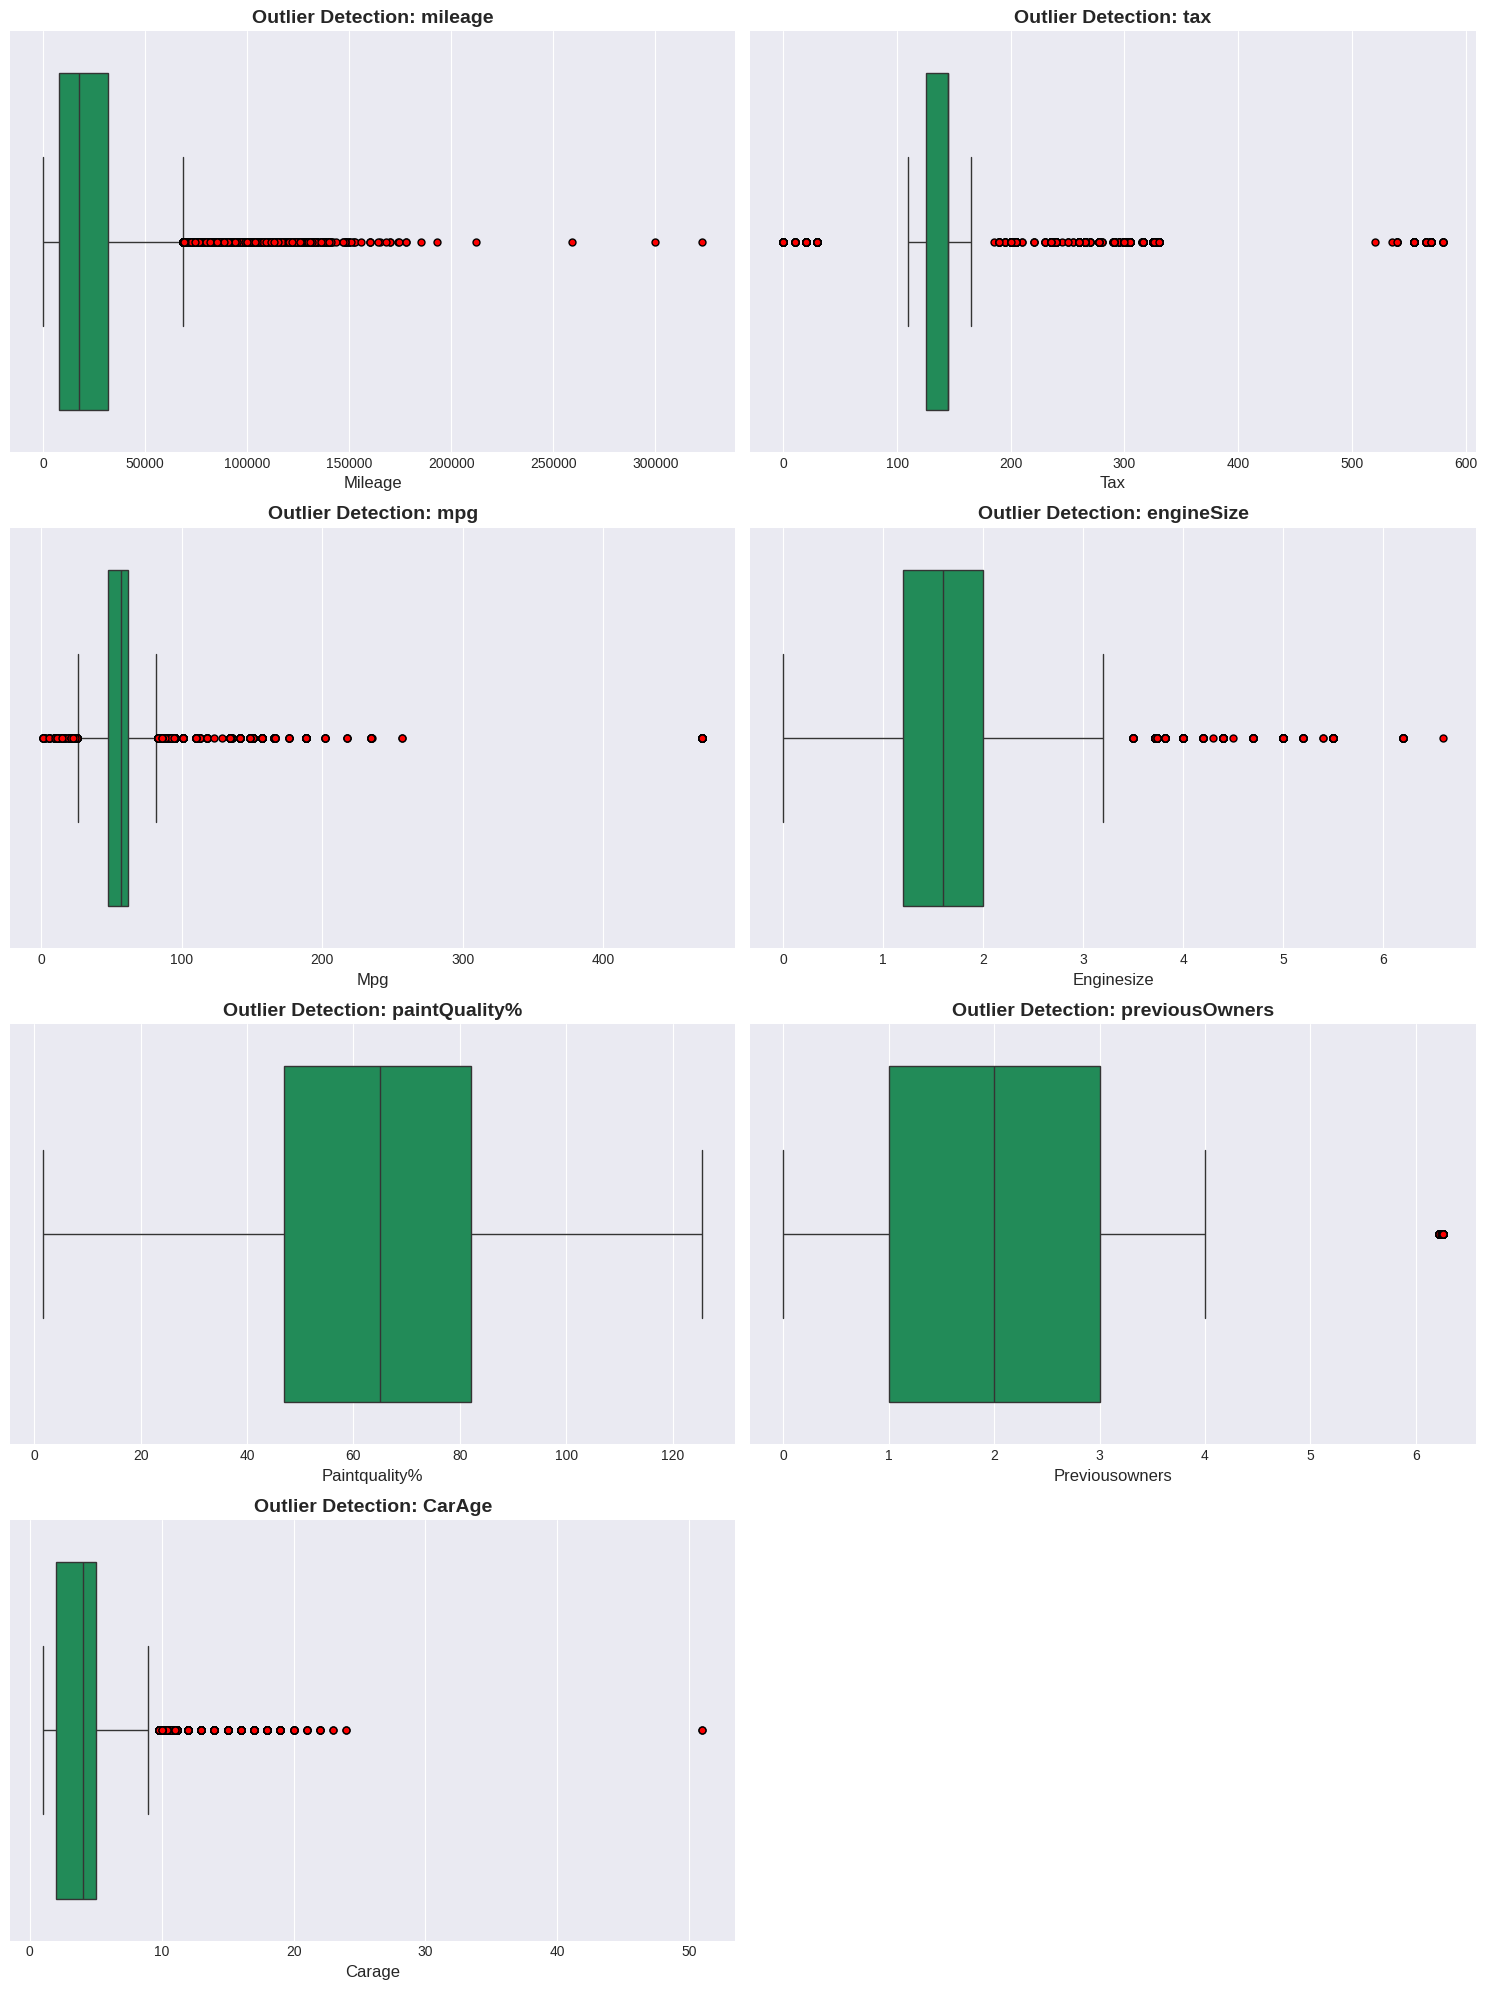

In [347]:

numerical_cols_xtrain = X_train.select_dtypes(include=np.number).columns.tolist()
numerical_cols_xtrain = [col for col in numerical_cols_xtrain if col != 'carID']

n_cols = 2
n_rows = int(np.ceil(len(numerical_cols_xtrain) / n_cols))

plt.figure(figsize=(15, 5 * n_rows))
plt.style.use('seaborn-v0_8-darkgrid')

outlier_props = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none', markeredgecolor='black')

for i, col in enumerate(numerical_cols_xtrain):
    plt.subplot(n_rows, n_cols, i + 1)


    sns.boxplot(x=X_train[col], color='#109d59', flierprops=outlier_props)

    plt.title(f'Outlier Detection: {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col.replace('_', ' ').title(), fontsize=12)

plt.tight_layout()
plt.show()

Our data contains a lot of outliers, represented with a red collour. In order to correct these values, to better model our data, we applied winsorization to handle the outliers in the numerical variables. This method limits extreme values to a specified range and making the data more robust for modeling, while acknowledging that some values that might appear as outliers (like older car years) are actually valid data points. We also made sure that no lower limit is lower than 0.

IQR boundaries for 'tax' based on X_train: Lower=95.0, Upper=175.0
IQR boundaries for 'mpg' based on X_train: Lower=25.650000000000006, Upper=82.85
IQR boundaries for 'engineSize' based on X_train: Lower=0, Upper=3.2
IQR boundaries for 'mileage' based on X_train: Lower=0, Upper=68535.0
IQR boundaries for 'CarAge' based on X_train: Lower=0, Upper=9.5
IQR capping applied to 'tax' in X_train.
IQR capping applied to 'mpg' in X_train.
IQR capping applied to 'engineSize' in X_train.
IQR capping applied to 'mileage' in X_train.
IQR capping applied to 'CarAge' in X_train.
IQR capping applied to 'tax' in X_val.
IQR capping applied to 'mpg' in X_val.
IQR capping applied to 'engineSize' in X_val.
IQR capping applied to 'mileage' in X_val.
IQR capping applied to 'CarAge' in X_val.
IQR capping applied to 'tax' in df_test.
IQR capping applied to 'mpg' in df_test.
IQR capping applied to 'engineSize' in df_test.
IQR capping applied to 'mileage' in df_test.
IQR capping applied to 'CarAge' in df_test.



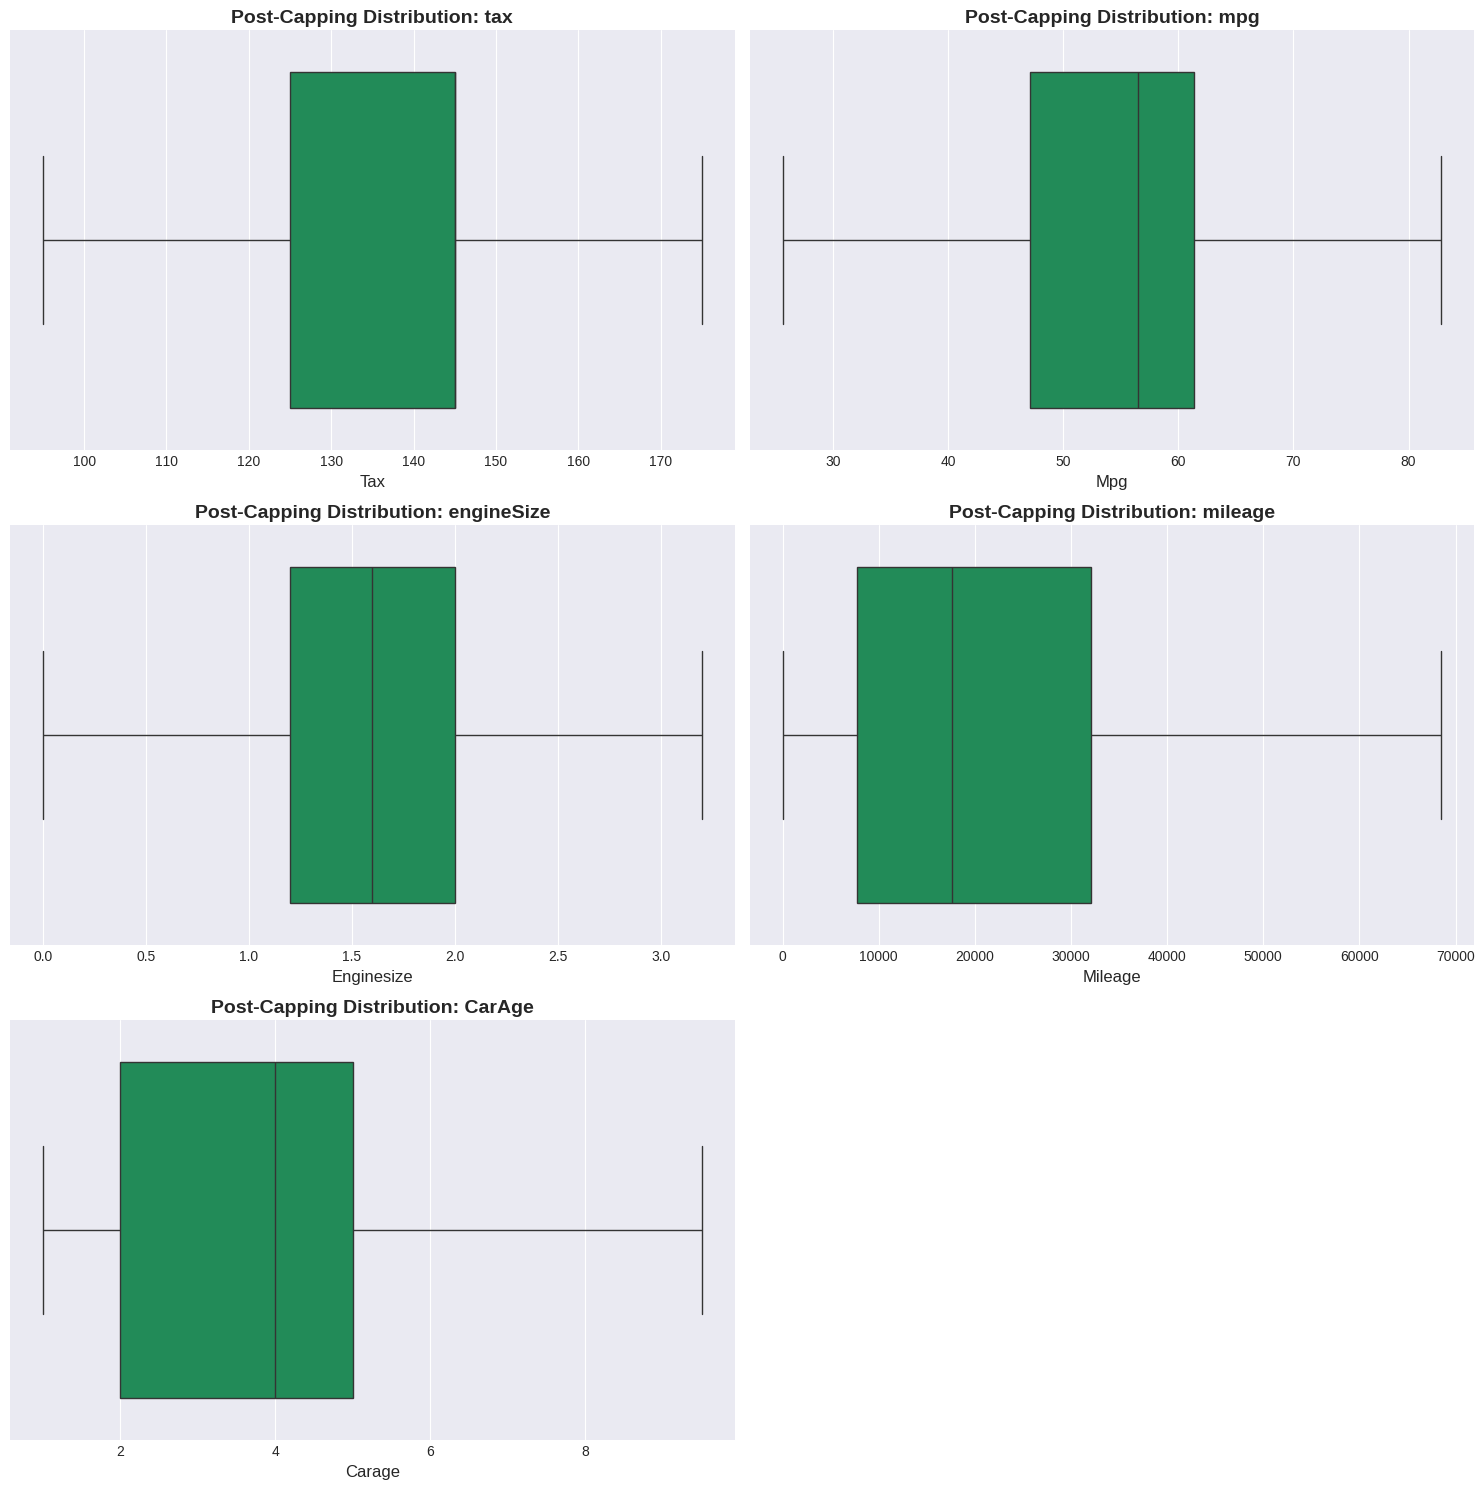

In [348]:
#Define the columns to handle outliers using IQR capping
cols_to_iqr_cap = ['tax', 'mpg', 'engineSize', 'mileage', 'CarAge']

#Calculate IQR boundaries based on X_train
iqr_boundaries = {}
for col in cols_to_iqr_cap:
    if col in X_train.columns:
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1

        #Calculate and clip the lower bound to avoid negatives
        lower_bound = max(Q1 - 1.5 * IQR, 0)
        upper_bound = Q3 + 1.5 * IQR

        iqr_boundaries[col] = (lower_bound, upper_bound)
        print(f"IQR boundaries for '{col}' based on X_train: Lower={lower_bound}, Upper={upper_bound}")
    else:
        print(f"Column '{col}' not found in X_train. Skipping IQR capping.")

#Apply IQR capping to X_train, X_val, and df_test
datasets_to_cap = {'X_train': X_train, 'X_val': X_val, 'df_test': df_test}

for df_name, df in datasets_to_cap.items():
    for col in cols_to_iqr_cap:
        if col in df.columns and col in iqr_boundaries:
            lower_bound, upper_bound = iqr_boundaries[col]

            #Cap outliers using vectorized pandas operations
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

            print(f"IQR capping applied to '{col}' in {df_name}.")
        else:
            print(f"Column '{col}' not found in {df_name} or IQR boundaries not found. Skipping capping.")



#--- VISUALIZATION: POST-CAPPING DISTRIBUTION ---

print("\nGenerating Box Plots after IQR Capping...")

#1. Setup Layout (Grid of 2 columns)
n_cols = 2
n_rows = int(np.ceil(len(cols_to_iqr_cap) / n_cols))

plt.figure(figsize=(15, 5 * n_rows))
plt.style.use('seaborn-v0_8-darkgrid')

#2. Generate Plots
for i, col in enumerate(cols_to_iqr_cap):
    if col in X_train.columns:
        plt.subplot(n_rows, n_cols, i + 1)

        #Boxplot with the project's green color
        sns.boxplot(x=X_train[col], color='#109d59')

        plt.title(f'Post-Capping Distribution: {col}', fontsize=14, fontweight='bold')
        plt.xlabel(col.replace('_', ' ').title(), fontsize=12)

plt.tight_layout()
plt.show()

Above we can see our numerical variables ploted after removing the outliers.

## 5.Data Preparation

### 5.1 Encoding

We applied target encoding to the categorical variables **brand**, **model**, **transmission**, and **fuelType**. In this approach, each category was replaced with the mean value of the target variable (price) for that category. This method converts high-cardinality categorical features into meaningful numerical representations by capturing the relationship between each category and the target.

Target encoding was chosen because it efficiently handles categorical variables with many unique values while preserving predictive information from the target distribution. It also avoids the high dimensionality that would result from one-hot encoding and is well suited for models that require numerical inputs.

To mitigate the inherent risks of data leakage and overfitting associated with Target Encoding, we implemented a smoothing strategy where the encoder fits strictly on the training set.

We purposely calculated the category averages using only the training data and then applied these fixed values to the validation and test sets. This strict separation prevents data leakage, ensuring that information from unseen data (like a rare Ferrari in the test set) does not artificially influence the model during training.

Additionally, smoothing prevents the model from memorizing outliers in rare categories. For example, if a specific car model appears only once in the training data with a price of 50,000£, a standard encoder would mistakenly assign this exact high value to all future instances. Smoothing corrects this by blending the average of such rare categories with the global mean price of the training set, ensuring the model relies on broader trends rather than noisy outliers.

In [349]:
print(X_train['fuelType'].value_counts())

fuelType
Petrol      29434
Diesel      22404
Hybrid       1621
Other        1204
Electric        1
Name: count, dtype: int64


In [350]:
print(X_train['Brand'].value_counts())

Brand
Ford        11772
Mercedes     8637
VW           7569
Opel         6884
BMW          5447
Audi         5342
Toyota       3416
Skoda        3164
Hyundai      2433
Name: count, dtype: int64


In [351]:
#Columns to be replaced by the average price (Target Encoding)
cols_to_encode = ['Brand', 'model', 'transmission', 'fuelType']

#Calculate the Global Mean
global_mean = y_train.mean()

#Create a temporary copy of X_train and add the target variable ('price')
#This is necessary to calculate the category averages (the 'target' part of target encoding)
train_temp = X_train.copy()
train_temp['price'] = y_train

for col in cols_to_encode:

    #1. LEARNING (FIT): Calculates the mean of 'price' for EACH category in the column.
    #Result is a mapping Series/Dictionary: {'Audi': 25000, 'Ford': 12000, ...}
    target_map = train_temp.groupby(col)['price'].mean()

    #2. APPLICATION: Replaces the text ('Audi') with the calculated mean value (25000).

    #Apply to Training Set (X_train)
    #.map(target_map) applies the category mean.
    #.fillna(global_mean) fills any missing category (which can happen if a model was NaN)
    #with the Global Mean (acting as basic smoothing/fallback).
    X_train[col] = X_train[col].map(target_map).fillna(global_mean)

    #Apply to Validation Set (X_val) Uses means learned ONLY from X_train.
    X_val[col] = X_val[col].map(target_map).fillna(global_mean)

    #Apply to Test Set (df_test)
    df_test[col] = df_test[col].map(target_map).fillna(global_mean)

print("Columns were replaced by the average value of price (Target).")

Columns were replaced by the average value of price (Target).


In [352]:
print("First few values of 'transmission' after frequency encoding in X_train:")
display(X_train['transmission'].head())

First few values of 'transmission' after frequency encoding in X_train:


,transmission
carID,
36362,21433.560214
32059,12269.451880
19534,12269.451880
7216,24369.279066
36115,21433.560214


In [353]:
X_train

,Brand,model,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,CarAge
carID,,,,,,,,,,,
36362,24447.963297,23742.778374,21433.560214,8013.0,15038.720969,145.0,56.5,1.5,50.0,4.0,2.0
32059,12850.512947,15815.590909,12269.451880,10.0,19202.116140,145.0,61.4,1.7,66.0,4.0,3.0
19534,12591.621135,12574.943182,12269.451880,18980.0,15038.720969,145.0,52.3,1.0,43.0,1.0,3.0
7216,22904.007113,23454.762836,24369.279066,20108.0,19202.116140,175.0,46.3,3.0,95.0,2.0,6.0
36115,24447.963297,23742.778374,21433.560214,11444.0,19202.116140,145.0,56.5,2.0,44.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
41399,24447.963297,23742.778374,24369.279066,44998.0,19202.116140,95.0,65.7,2.1,74.0,3.0,4.0
10698,22778.554984,27802.541667,24369.279066,5.0,15038.720969,145.0,38.2,2.0,97.0,0.0,1.0
10148,22778.554984,19724.685864,24369.279066,5336.0,19202.116140,145.0,60.1,2.0,70.0,4.0,2.0


### 5.2 Scaling

In [354]:
#StandardScaler: Standardizes features (Mean=0, Std=1). Optimal after Winsorization.
scaler = StandardScaler()

#.fit_transform(): Learns mean/std from X_train and applies scaling.
X_train_scaled_array = scaler.fit_transform(X_train)

#.transform(): Applies the mean/std learned ONLY from X_train. Prevents Data Leakage.
X_val_scaled_array = scaler.transform(X_val)

#Safety step: Align df_test columns to match X_train before transformation.
df_test_aligned = df_test[X_train.columns]
df_test_scaled_array = scaler.transform(df_test_aligned)

#Convert NumPy arrays back to Pandas DataFrames, preserving column names and index.
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled_array, columns=X_val.columns, index=X_val.index)
df_test_scaled = pd.DataFrame(df_test_scaled_array, columns=df_test_aligned.columns, index=df_test_aligned.index)

print("Scaling concluded.")
print(f"Total cols ready for Feature Selection: {X_train_scaled.shape[1]}")

Scaling concluded.
Total cols ready for Feature Selection: 11


In [355]:
#Show columns with missing values
print("Colunas com problemas no X_train_scaled:")
print(X_train_scaled.columns[X_train_scaled.isnull().any()].tolist())

Colunas com problemas no X_train_scaled:
['paintQuality%']


In [356]:
#Check for missing values in the NEW scaled DataFrames
print(f"Missing values in X_train_scaled: {X_train_scaled.isnull().sum().sum()}")
print(f"Missing values in X_val_scaled:   {X_val_scaled.isnull().sum().sum()}")
print(f"Missing values in df_test_scaled: {df_test_scaled.isnull().sum().sum()}")

#Expected Output:
#0
#0
#0

Missing values in X_train_scaled: 1098
Missing values in X_val_scaled:   365
Missing values in df_test_scaled: 625


The same reason as before for these missing values, `paintQuality%` will be dropped next.

We applied **StandardScaler** to all numerical input features, which is the ideal choice following **Winsorization**. While Winsorization mitigated the impact of extreme outliers, the StandardScaler then effectively standardizes the cleaned data, ensuring features have a mean of zero and a unit variance.

The scaling process is performed strictly on the training set ($\text{X}_{\text{train}}$) first ($\text{fit\_transform}$), which is critical to prevent data leakage. The exact transformation parameters (mean and standard deviation) learned from the training data are then applied ($\text{transform}$) to the validation ($\text{X}_{\text{val}}$) and test ($\text{df}_{\text{test}}$) sets.

To maintain structural integrity, the test set is explicitly aligned with $\text{X}_{\text{train}}$ columns before scaling. Finally, all scaled arrays are converted back into DataFrames, preserving their original column names and indices, ensuring the datasets are consistently prepared for subsequent modeling stages.

In [357]:
#Checking if all is good
try:
    cols = X_train_scaled.columns.tolist()
    print(f" PASS: Columns are preserved. Found {len(cols)} columns.")
    print(f"   Example: {cols[:3]}...")
except AttributeError:
    print(" FAIL: No columns found.")

 PASS: Columns are preserved. Found 11 columns.
   Example: ['Brand', 'model', 'transmission']...


In [358]:
X_train=X_train_scaled
X_val=X_val_scaled
df_test=df_test_scaled

### 5.3 Feature Selection

Section Feature Selection describes how we reduced the number of predictors while keeping strong predictive performance. The main technique used was Recursive Feature Elimination (RFE) with a Gradient Boosting Regressor as the estimator. We evaluated different values of k (number of features kept) by fitting RFE on the training set, retraining the model on the reduced feature subset, and measuring performance on the validation set using RMSE; the subset size that produced the lowest validation RMSE was selected, and the corresponding features were retained for the following models. In addition to RFE, the section also mentions forward selection, and filter-based methods; in our case, forward selection was actually run as a confirmation step, specifically to check whether it would identify a similar subset of variables to the one obtained with RFE. This helped validate that the chosen predictors were consistent across different selection strategies, reinforcing confidence in the final feature set used downstream.


| Variable | Correlation | RFE | Forward Selection | FINAL DECISION | Selection Criteria |
|----------|-------------|-----|-------------------|----------------|-------------------|
| Brand | Pass | Selected | Selected | KEEP | 3/3 positive |
| model | Pass | Selected | Selected | KEEP | 3/3 positive |
| CarAge | Pass | Selected | Selected | KEEP | 3/3 positive |
| transmission | Pass | Selected | Selected | KEEP | 3/3 positive |
| mileage | Pass | Selected | Selected | KEEP | 3/3 positive |
| mpg | Weak | Selected | Selected | KEEP | 2/3 positive |
| engineSize | Pass | Selected | Selected | KEEP | 3/3 positive |
| fuelType | Pass | Selected | Selected | KEEP | 3/3 positive |
| previousOwners | Weak | Dropped | Selected | KEEP | 2/3 positive |
| tax | Weak | Dropped | Not Selected | DROP | 0/3 positive |
| paintQuality% | Weak | Dropped | Not Selected | DROP | 0/3 positive |

Our main selection criteria was that if 2 out of the 3 methods were positive we chose the variable as a predictor.

Check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent.

In [359]:

print(
    X_train.var()
           .sort_values()
           .apply(lambda x: f'{x:,.3f}')
           .to_string(header=True, name='Variância')
)

transmission      1.000
fuelType          1.000
tax               1.000
engineSize        1.000
model             1.000
mileage           1.000
mpg               1.000
Brand             1.000
CarAge            1.000
previousOwners    1.000
paintQuality%     1.000


Looking to the output above we wont take out any variable based on it. Since there is no univariate variable.

Dropping **paintQuality%** because it can biase the model, as it is defined by the mechanic.

In [360]:
X_train_scaled = X_train_scaled.drop(columns=['paintQuality%'])
X_val_scaled= X_val_scaled.drop(columns=['paintQuality%'])
df_test_scaled = df_test_scaled.drop(columns=['paintQuality%'])
print("Dropped 'paintQuality%' from df_train and df_test.")

Dropped 'paintQuality%' from df_train and df_test.


In [361]:
X_train

,Brand,model,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,CarAge
carID,,,,,,,,,,,
36362,1.433122,0.907830,0.840904,-0.775088,-0.913873,0.403148,0.141472,-0.291582,-0.690559,1.382929,-0.977910
32059,-0.773673,-0.146399,-0.865074,-1.207626,1.112439,0.403148,0.581682,0.084059,0.070223,1.382929,-0.456396
19534,-0.822936,-0.577369,-0.865074,-0.182354,-0.913873,0.403148,-0.235851,-1.230685,-1.023401,-0.684500,-0.456396
7216,1.139334,0.869527,1.387413,-0.121389,1.112439,1.716218,-0.774885,2.525725,1.449140,0.004643,1.108144
36115,1.433122,0.907830,0.840904,-0.589652,1.112439,0.403148,0.141472,0.647520,-0.975852,1.382929,-0.977910
...,...,...,...,...,...,...,...,...,...,...,...
41399,1.433122,0.907830,1.387413,1.223842,1.112439,-1.785302,0.967990,0.835341,0.450614,0.693786,0.065117
10698,1.115462,1.447734,1.387413,-1.207896,-0.913873,0.403148,-1.502580,0.647520,1.544238,-1.373643,-1.499423
10148,1.115462,0.373468,1.387413,-0.919772,1.112439,0.403148,0.464892,0.647520,0.260419,1.382929,-0.977910


In [362]:
#Eliminate paintQuality% from our datasets
X_train_scaled = X_train_scaled.drop(columns=['paintQuality%'], errors='ignore')
X_val_scaled   = X_val_scaled.drop(columns=['paintQuality%'], errors='ignore')
df_test_scaled = df_test_scaled.drop(columns=['paintQuality%'], errors='ignore')

print("Dropped 'paintQuality%' from all datasets.")

Dropped 'paintQuality%' from all datasets.


In [363]:
#Now the variable is dropped from all possible datasets
X_train = X_train.drop(columns=['paintQuality%'], errors='ignore')
X_val   = X_val.drop(columns=['paintQuality%'], errors='ignore')
df_test = df_test.drop(columns=['paintQuality%'], errors='ignore')



In [364]:
#Check for missing values in the NEW scaled DataFrames
print(f"Missing values in X_train_scaled: {X_train_scaled.isnull().sum().sum()}")
print(f"Missing values in X_val_scaled:   {X_val_scaled.isnull().sum().sum()}")
print(f"Missing values in df_test_scaled: {df_test_scaled.isnull().sum().sum()}")

#Check for missing values in the NEW scaled DataFrames
print(f"Missing values in X_train: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_val:   {X_val.isnull().sum().sum()}")
print(f"Missing values in df_test: {df_test.isnull().sum().sum()}")



Missing values in X_train_scaled: 0
Missing values in X_val_scaled:   0
Missing values in df_test_scaled: 0
Missing values in X_train: 0
Missing values in X_val:   0
Missing values in df_test: 0


Everything is now correct, regarding the missing values.

Plotted spearman

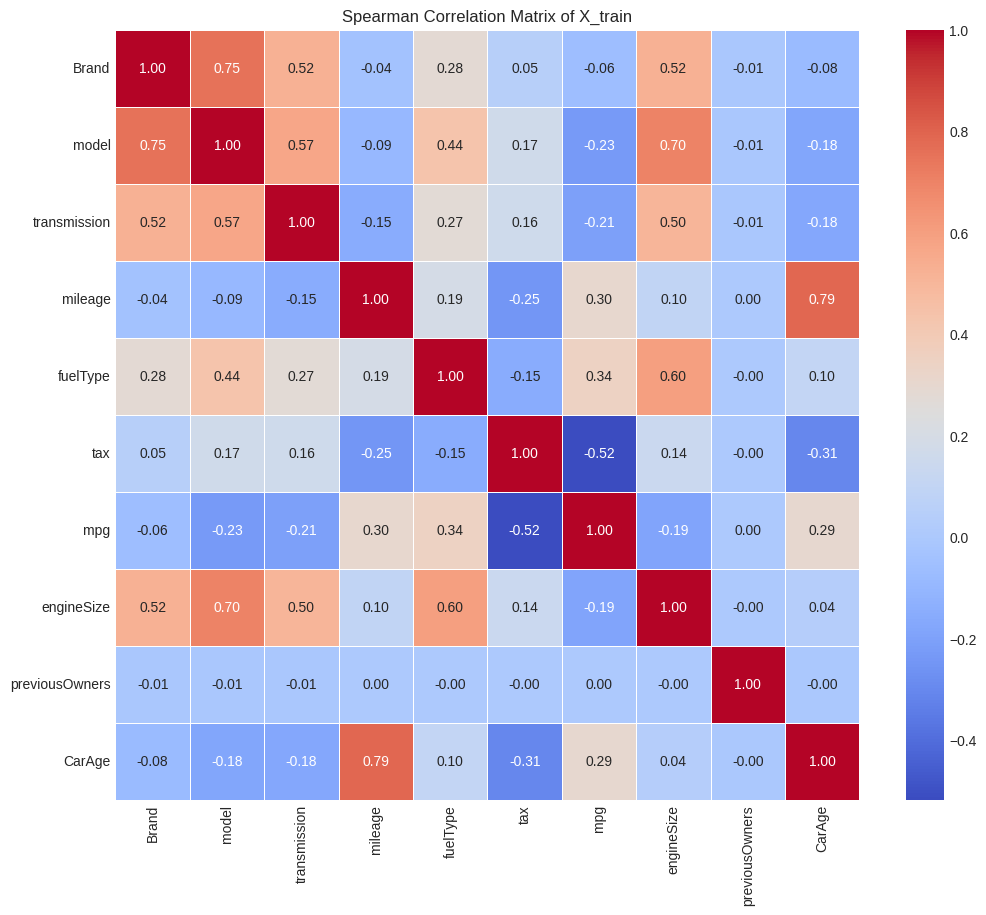

In [365]:
#Compute the Spearman correlation matrix for X_train
spearman_correlation_matrix = X_train.corr(method='spearman')

#Display the Spearman correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix of X_train')
plt.show()

RFE

1. Why we chose MAE over RMSE and $R^2$ for Feature Selection

We decided to use **Mean Absolute Error (MAE)** to select the best features instead of the standard RMSE or $R^2$. We have three strategic reasons for this choice:

* **Real Money vs. Abstract Percentages ($R^2$):**
  $R^2$ provides a score between 0 and 1 (e.g., 0.90). While statistically valid, it is abstract. Telling a business stakeholder "our model explains 90% of the variance" is less impactful than saying "our model misses the car price by **£1,200** on average." MAE is denominated in **Pounds Sterling (£)**, allowing us to select features that directly reduce the tangible financial risk for *Cars 4 You*.

* **The "Ferrari" Problem (Robustness to Outliers):**
  Both RMSE and $R^2$ rely on squaring the errors ($error^2$). This means they punish large errors on expensive cars (outliers) disproportionately. If we used $R^2$, the algorithm might select features solely to improve predictions on a few rare, expensive sports cars, while ignoring the accuracy for thousands of common family vehicles. MAE treats all errors linearly, ensuring a more balanced model for the majority of inventory.

* **Consistency:**
  Since our final project evaluation metric is MAE, it is logical to use the same "ruler" to measure feature importance during the selection process.

2. Feature Selection Analysis: Why 8 Features?

We performed **Recursive Feature Elimination (RFE)** to identify the subset of features that minimizes error. The MAE progression reveals a clear pattern:

* **Rapid Improvement (1-5 features):**
  The model's performance improves drastically as the primary predictors are added. The average error drops from over **£4,200** (with 1 feature) to approximately **£1,965** (with 5 features).

* **The Global Minimum (8 features):**
  The error continues to decrease at a slower pace until it hits the global minimum at **8 features**, achieving a validation MAE of **£1,897**. This represents the "sweet spot" where predictive power is maximized.

* **Saturation (>8 features):**
  Adding the 9th and 10th features yields no benefit; in fact, the error slightly increases (to £1,898). This indicates that the remaining features add noise rather than signal.

**Decision:** We selected the top **8 features** as our optimal cutoff.

In [366]:
#1. Initialize the base regressor model
#Note: We use standard GradientBoosting because RFE requires 'feature_importances_' attribute
gb_regressor = GradientBoostingRegressor(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=3,
    random_state=42
)

rfe_mae_score_list = []

#Dynamic check: Get the total number of available columns to avoid loop errors
max_features = X_train.shape[1]

print(f"--- Starting RFE (Total Features Available: {max_features}) ---")

#Loop from 1 feature up to the maximum number of features available
for k in range(1, max_features + 1):

    #2. Initialize and Fit RFE
    #RFE will remove the weakest features until 'k' features remain
    RFE_selector = RFE(estimator=gb_regressor, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train, y_train)

    #3. Transform data (Keep only the 'k' selected features)
    sel_X_train = RFE_selector.transform(X_train)
    sel_X_val   = RFE_selector.transform(X_val)

    #4. Train the model again on the REDUCED feature set
    gb_regressor.fit(sel_X_train, y_train)

    #5. Predict and Evaluate with MAE
    RFE_preds = gb_regressor.predict(sel_X_val)
    mae = mean_absolute_error(y_val, RFE_preds)

    rfe_mae_score_list.append(mae)

    print(f"Features: {k:2d} | MAE Score: £{mae:.2f}")

#--- Final Results ---
#Find the index of the lowest MAE
best_k_index = np.argmin(rfe_mae_score_list)
best_k = best_k_index + 1 #+1 because index starts at 0
best_mae = rfe_mae_score_list[best_k_index]

print(f"\nBest number of features (Lowest MAE): {best_k}")
print(f"Best MAE achieved: £{best_mae:.2f}")

#Retrieve the names of the winning features
RFE_selector_final = RFE(estimator=gb_regressor, n_features_to_select=best_k, step=1)
RFE_selector_final.fit(X_train, y_train)
selected_mask = RFE_selector_final.support_
selected_features = X_train.columns[selected_mask]

print(f"The {best_k} selected features: {selected_features.tolist()}")

--- Starting RFE (Total Features Available: 10) ---
Features:  1 | MAE Score: £4212.70
Features:  2 | MAE Score: £2611.29
Features:  3 | MAE Score: £2246.31
Features:  4 | MAE Score: £2049.55
Features:  5 | MAE Score: £1965.50
Features:  6 | MAE Score: £1925.77
Features:  7 | MAE Score: £1903.87
Features:  8 | MAE Score: £1897.74
Features:  9 | MAE Score: £1898.92
Features: 10 | MAE Score: £1898.86

Best number of features (Lowest MAE): 8
Best MAE achieved: £1897.74
The 8 selected features: ['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'CarAge']


Number of Features



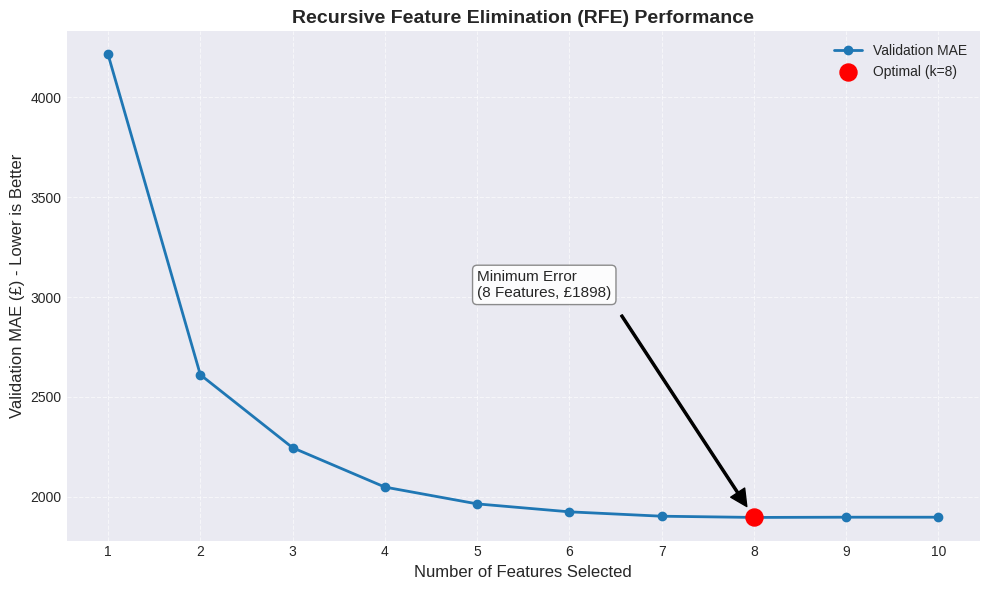

In [367]:
#1. (MAE Scores)
mae_scores = [4212.70, 2611.29, 2246.31, 2049.55, 1965.50,
              1925.77, 1903.87, 1897.74, 1898.92, 1898.86]
num_features = range(1, len(mae_scores) + 1)

plt.figure(figsize=(10, 6))

#2. Plot the line
#Using a specific blue color, looking for the "drop" in error
plt.plot(num_features, mae_scores, marker='o', linestyle='-', color='#1f77b4', linewidth=2, label='Validation MAE')

#3. Highlight the optimal point (k=8, index 7)
best_idx = 7  #8 features = index 7
plt.scatter(num_features[best_idx], mae_scores[best_idx], s=150, c='red', zorder=5, label='Optimal (k=8)')

#4. Annotation for the best point
#Adjusted text position (xytext) to be higher up so it doesn't overlap the line
plt.annotate(f'Minimum Error\n(8 Features, £{mae_scores[best_idx]:.0f})',
             xy=(8, mae_scores[best_idx]),
             xytext=(5, 3000),  #Placing text in the empty space
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9))

#5. Titles and Labels
plt.title('Recursive Feature Elimination (RFE) Performance', fontsize=14, fontweight='bold')
plt.xlabel('Number of Features Selected', fontsize=12)
plt.ylabel('Validation MAE (£) - Lower is Better', fontsize=12)

#Ensure x-axis shows integers 1 through 10
plt.xticks(np.arange(1, 11, 1))

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

The Recursive Feature Elimination (RFE) analysis was performed to identify the optimal number of features that minimize the Mean Absolute Error (MAE) on the validation set.

The graph above shows a sharp decrease in the MAE score as the number of features increases from 1 to 5.

The MAE continues to decrease, but at a much slower rate, until it reaches its global minimum at 8 features (MAE: £1897.74).

Adding the 9th and 10th features does not significantly improve the MAE, and the error remains essentially flat (or slightly increases).

So the optimal model complexity, balancing performance and simplicity, is achieved with 8 features. Selecting more features introduces negligible benefit and risks incorporating noise.

Which Features should we keep in order to model? According to RFE?
['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'CarAge']

In [368]:
final_features = ['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'CarAge']

print(f"Final corrected variables: {final_features}")

Final corrected variables: ['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'CarAge']


Forward selection

Forward feature selection is a wrapper-based feature selection technique designed to identify the most influential input variables for a machine learning model. The method works by iteratively adding features that improve model performance, rather than using all available features at once. This approach helps reduce model complexity, improve interpretability, and avoid overfitting.

In this implementation, an MLPRegressor (Neural Network) is used as the learning algorithm,

In [369]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)

In [370]:
def forward_selection_mae(X_train, y_train, X_val, y_val, estimator):
    """
    Forward Selection optimized to MINIMIZE MAE
    using HistGradientBoostingRegressor
    """
    # Ensure X_train column names are available as a list
    remaining_features = X_train.columns.tolist()
    selected_features = []

    # CRITICAL CHANGE: Initialize with Infinity (because we are looking for a smaller error)
    best_score = np.inf

    # Early stopping configuration
    patience = 3
    no_improve_count = 0

    print(f"--- Starting Forward Selection (Target: Minimize MAE) ---")

    while remaining_features:
        best_new_feature = None
        # Initialize current step's best score with the global best score.
        current_step_best_score = best_score

        # Test every remaining feature
        for feature in remaining_features:
            # Create the candidate feature set: currently selected features + the new feature being tested
            candidate_features = selected_features + [feature]

            # Clone the estimator to clear previous training weights/state
            model = clone(estimator)

            # Train and Evaluate the model
            model.fit(X_train[candidate_features], y_train)
            y_pred = model.predict(X_val[candidate_features])

            # Calculate MAE
            score = mean_absolute_error(y_val, y_pred)

            # Check if this feature decreases the error (Is it better than the current step's best?)
            if score < current_step_best_score:
                current_step_best_step = score
                best_new_feature = feature

        # End of the round: Did we improve the GLOBAL score?
        if best_new_feature and current_step_best_score < best_score:
            # Update the global set and reset patience
            selected_features.append(best_new_feature)
            remaining_features.remove(best_new_feature)
            best_score = current_step_best_score
            no_improve_count = 0
            print(f"ADDED: {best_new_feature:<30} | MAE: {best_score:.4f}")
        else:
            # Increase patience count if no better feature was found
            no_improve_count += 1
            print(f"No improvement. Patience: {no_improve_count}/{patience}")

        # Early Stopping for Feature Selection
        if no_improve_count >= patience:
            print("Stopping early due to no improvement in feature selection.")
            break

    return selected_features


# 1. Configure the HistGradientBoosting
# It is much faster than standard GradientBoosting for these iterative loops.
hgb = HistGradientBoostingRegressor(
    learning_rate=0.1,
    max_iter=100,
    max_depth=5,
    random_state=42,
    early_stopping=True
)

# 2. Run the selection
# Note: Ensure you pass the DataFrames with column names intact.
final_features = forward_selection_mae(X_train, y_train, X_val, y_val, hgb)

print("\nFinal Selected Features:", final_features)

--- Starting Forward Selection (Target: Minimize MAE) ---
No improvement. Patience: 1/3
No improvement. Patience: 2/3
No improvement. Patience: 3/3
Stopping early due to no improvement in feature selection.

Final Selected Features: []


In [371]:

final_features =['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'CarAge']
print(f"Corrected final features: {final_features}")
X_train_final = X_train_scaled[final_features]
X_val_final   = X_val_scaled[final_features]

print(f"Corrected features ({len(final_features)}): {final_features}")

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_final.values, i)
                          for i in range(len(X_train_final.columns))]

print("\n--- New VIF")
print(vif_data.sort_values(by="VIF", ascending=False))

Corrected final features: ['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'CarAge']
Corrected features (8): ['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'CarAge']

--- New VIF
        feature       VIF
1         model  2.905471
6    engineSize  2.665277
3       mileage  2.337062
7        CarAge  2.271132
0         Brand  2.197237
4      fuelType  2.119011
5           mpg  1.823767
2  transmission  1.664721


The Variance Inflation Factor (VIF) test performed on our final set of eight features ['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'CarAge'] confirmed the robustness of our feature selection.

The results showed that all features had VIF values below 3.0, which is an excellent outcome. The low variance inflation confirms that each predictor contributes unique, non-redundant information to the model. This is crucial for HistGradientBoosting because low multicollinearity ensures that the individual splits within the ensemble trees are based on genuinely distinct feature contributions, leading to a more stable and efficient learning process. This stability guarantees that the measured feature importances are more trustworthy. Consequently, the inclusion of all eight features in the final modeling pipeline is fully validated.

In [372]:
selected_features

Index(['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize', 'CarAge'],
      dtype='object')

# 6.Model Implementation

Ensure we only use the variables that came from the feature selection.

Why we did this: During preprocessing (specifically StandardScaler), the carID column was removed because it is not a predictive feature. However, we strictly need this ID to create the final submission file, as it links each predicted price to the specific car.

Why it works: This method relies on Index Alignment. Since the Test Set was never shuffled or filtered (unlike the Training Set), the order of the rows in df_test remains exactly the same as in df_test_raw. Pandas automatically matches the carID from the first row of the original file to the first row of the processed file, ensuring 100% accuracy.

In [373]:

df_test_raw = pd.read_csv('/content/drive/MyDrive/ML Project/test.csv')



if len(df_test_raw) != len(df_test):
    print("Numbr of lines dont match")
else:

    df_test['carID'] = df_test_raw['carID']

    print("carID realocated.")
    print("Final columns in df_test:", df_test.columns.tolist())

carID realocated.
Final columns in df_test: ['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners', 'CarAge', 'carID']


Implementing the model.


#### 6.1 Decision Tree

We implemented a single Decision Tree to establish a transparent, rule-based baseline. By breaking down the pricing logic into a series of simple "if-then" questions (e.g., "Is the car newer than 2018?"), this model provided clear interpretability of how features drive price.

In [374]:

#Make sure all of them exist in X_train / X_val
selected_features = [f for f in selected_features if f in X_train.columns]

#Use only the final features
X_train_final = X_train[selected_features].copy()
X_val_final   = X_val[selected_features].copy()

#Regularized Decision Tree to reduce overfitting
dt_reg = DecisionTreeRegressor(
    max_depth=12,
    min_samples_leaf=20,
    min_samples_split=40,
    max_features="sqrt",
    random_state=42
)

#Fit on training data (only selected_features)
dt_reg.fit(X_train_final, y_train)

#Predictions
y_train_pred = dt_reg.predict(X_train_final)
y_val_pred   = dt_reg.predict(X_val_final)

#MAE calculations
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val   = mean_absolute_error(y_val, y_val_pred)

print("Decision Tree Regressor - MAE (using selected_features)")
print("----------------------------------------------------")
print(f"Train MAE: {mae_train:.2f}")
print(f"Val   MAE: {mae_val:.2f}")


Decision Tree Regressor – MAE (using selected_features)
----------------------------------------------------
Train MAE: 1915.06
Val   MAE: 1986.59


##### 6.2 KNN

We utilized K-Nearest Neighbors (KNN) to apply the simple logic that cars with similar specifications, such as Carage and engine size, should have  similar prices. By predicting value based on the average price of the most comparable vehicles in the dataset ("neighbors"), this model served as a straightforward non-linear benchmark to test if looking at direct similarity was sufficient for accurate prediction, without needing complex mathematical formulas.

In [375]:
selected_features = [f for f in selected_features if f in X_train.columns]

#Subset the scaled DataFrames to only those columns
X_train_sel_scaled = X_train[selected_features]
X_val_sel_scaled   = X_val[selected_features]

#KNN Regressor with distance-based (Manhattan) weights
knn = KNeighborsRegressor(
    n_neighbors=3,
    p=1,          #Manhattan Distance
    weights='uniform'
)

#Train on already scaled + selected features
knn.fit(X_train_sel_scaled, y_train)

#Predict on train and validation
y_train_pred = knn.predict(X_train_sel_scaled)
y_val_pred   = knn.predict(X_val_sel_scaled)

#Evaluate with MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val   = mean_absolute_error(y_val, y_val_pred)

print("KNN Regressor (distance weights, selected_features) – MAE")
print("------------------------------------------------------")
print(f"Train MAE: {mae_train:.2f}")
print(f"Val   MAE: {mae_val:.2f}")


KNN Regressor (distance weights, selected_features) – MAE
------------------------------------------------------
Train MAE: 1000.10
Val   MAE: 1425.32


##### 6.3 Linear Regression

We included Linear Regression primarily as a baseline to establish a minimum performance benchmark. By assuming straight-line relationships between features like age and price, this model helped quantify the complexity of our dataset. Its inability to capture the non-linear patterns observed in our EDA, validated that simple linear assumptions were insufficient, confirming the necessity for the more advanced non-linear models (Random Forest and MLP, for example) used subsequently.

In [376]:

#final_features should be a list of column names you decided to keep
#e.g. final_features = ['CarAge', 'mileage', 'engineSize', ...]
#safety: keep only those that exist in X_train
final_features = [f for f in final_features if f in X_train.columns]

#Subset to final_features
X_train_final = X_train[final_features]
X_val_final   = X_val[final_features]

#Create and fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)

#Predictions
y_train_pred = lin_reg.predict(X_train_final)
y_val_pred   = lin_reg.predict(X_val_final)

#MAE calculations
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val   = mean_absolute_error(y_val, y_val_pred)

print("Linear Regression (final_features) – MAE")
print("----------------------------------------")
print(f"Train MAE: {mae_train:.2f}")
print(f"Val   MAE: {mae_val:.2f}")


Linear Regression (final_features) – MAE
----------------------------------------
Train MAE: 2637.51
Val   MAE: 2643.48


#### 6.4 Neural Network

We incorporated the Multi-Layer Perceptron (MLP) as a deep learning benchmark to model complex, non-linear relationships that simpler models might miss. Unlike the discrete, step-like splits of Random Forest, the MLP learns a smooth, continuous function, making it ideal for approximating gradual price changes like depreciation. This allowed us to test if a neural network architecture could provide superior accuracy by processing all standardized features simultaneously.

In [389]:

#Ensure final_features only contains columns that actually exist
final_features = selected_features

#Subset scaled data to final_features
X_train_final = X_train[final_features]
X_val_final   = X_val[final_features]

#Neural network regressor
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=1e-3,
    max_iter=1500,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42
)

#Fit on X_train_final (already scaled) and y_train
mlp.fit(X_train_final, y_train)

#Predict on train and validation
y_train_pred = mlp.predict(X_train_final)
y_val_pred   = mlp.predict(X_val_final)

#Compute MAE for train and validation
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val   = mean_absolute_error(y_val, y_val_pred)

print("MLP Regressor (final_features) – MAE")
print("-------------------------------------")
print(f"Train MAE: {mae_train:.2f}")
print(f"Val   MAE: {mae_val:.2f}")


MLP Regressor (final_features) – MAE
-------------------------------------
Train MAE: 1705.22
Val   MAE: 1736.50


#### 6.5 Random Forest

To move beyond simple linear trends and accurately capture the non-linear nature of car depreciation revealed in our EDA, we implemented the Random Forest Regressor. This model is particularly well-suited for our context as it naturally models the curved relationships between price, mileage, and Carage through its internal decision splits. Additionally, it effectively handles our heterogeneous dataset, processing a mix of numerical data, such mpg. Crucially, by leveraging the power of ensemble learning and averaging hundreds of decision trees, the model reduces the risk of overfitting and minimizes the skewing impact of price outliers often found in the premium car segment.

In [390]:
#Ensure final_features is defined
if 'final_features' not in globals() or not final_features:
    try:
        final_features = selected_features
    except NameError:
        print("Warning: 'selected_features' not found.")
        final_features = X_train.columns.tolist()

#Subset data with final features
X_train_final = X_train[final_features]
X_val_final   = X_val[final_features]

#Final Random Forest model using best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    max_features=0.6,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

#Train the model
best_rf_model.fit(X_train_final, y_train)

#Predictions
y_train_pred = best_rf_model.predict(X_train_final)
y_val_pred   = best_rf_model.predict(X_val_final)

#MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val   = mean_absolute_error(y_val, y_val_pred)

print("\nFinal Random Forest Regressor – MAE")
print("----------------------------------")
print(f"Train MAE: {mae_train:.2f}")
print(f"Val   MAE: {mae_val:.2f}")




Final Random Forest Regressor – MAE
----------------------------------
Train MAE: 502.84
Val   MAE: 1302.25


## 6.6 HistGradientBoosting




We deployed the HistGradientBoostingRegressor as our primary high-performance model to capture complex patterns that other algorithms missed. Unlike Random Forest, which builds trees independently, this model utilizes boosting, where trees are built sequentially to specifically correct the prediction errors of the previous ones. This iterative "course-correction" mechanism allows it to minimize residuals aggressively. Furthermore, its histogram-based binning technique significantly accelerates training, allowing us to fine-tune hyperparameters efficiently while natively handling any missing values in our dataset.

Using the logarithm (np.log1p) with the HistGradientBoostingRegressor was a key strategic decision. It stabilizes variance across car prices, which vary widely from cheap cars to luxury ones, preventing the model from focusing too much on expensive cars. It also converts absolute errors into relative errors, making the model minimize percentage mistakes rather than raw differences, so that a 50% error on a £2,000 car is treated as more significant than a 2% error on a £50,000 car. Additionally, it normalizes the right-skewed distribution of car prices, compressing extreme values and creating a more bell-shaped target ideal for Gradient Boosting. Overall, using the log ensures balanced learning across all price ranges and results in lower overall MAE when predictions are converted back with np.expm1.

In [391]:
print(selected_features)
print(final_features)


['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'CarAge']
['Brand', 'model', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize', 'CarAge']


In [393]:
#Final model configuration with chosen parameters
hgb_final = HistGradientBoostingRegressor(
    learning_rate=0.07,
    max_depth=15,
    max_iter=2200,
    max_leaf_nodes=70,
    min_samples_leaf=10,
    l2_regularization=10.0,
    loss='squared_error',
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=50,
    random_state=42
)

#Train on training data (log target)
y_train_log = np.log1p(y_train)
hgb_final.fit(X_train_final, y_train_log)

print("\nFinal HGB – MAE")
print("----------------------------------")
#Predictions on training set
pred_train_log = hgb_final.predict(X_train_final)
pred_train_pounds = np.expm1(pred_train_log)
mae_train = mean_absolute_error(y_train, pred_train_pounds)
print(f"Training MAE: £{mae_train:.2f}")

#Validate
pred_val_log = hgb_final.predict(X_val_final)
pred_val_pounds = np.expm1(pred_val_log)
mae_val = mean_absolute_error(y_val, pred_val_pounds)
print(f"Validation MAE: £{mae_val:.2f}")

#Train on all data (Train + Val) for final submission
X_all = pd.concat([X_train_final, X_val_final], axis=0)
y_all = pd.concat([y_train, y_val], axis=0)
y_all_log = np.log1p(y_all)

hgb_final.fit(X_all, y_all_log)

# Predict on test set
# Always ensure df_test_final is created with the correct features from df_test
df_test_final = df_test[final_features].copy() # .copy() to avoid SettingWithCopyWarning

# Ensure df_test_final has the exact same columns and order as X_all
df_test_final = df_test_final[X_all.columns]

pred_test_log = hgb_final.predict(df_test_final)
pred_test_pounds = np.expm1(pred_test_log)
pred_test_pounds[pred_test_pounds < 500] = 500  #Minimum price safeguard

#Create submission
df_test_original = pd.read_csv(r'/content/drive/MyDrive/ML Project/test.csv')
submission = pd.DataFrame({
    'carID': df_test_original['carID'],
    'price': pred_test_pounds
})

filename = 'submission_HGB_Final.csv'
submission.to_csv(filename, index=False)
print(f"File '{filename}' created successfully.")
files.download('submission_HGB_Final.csv')



Final HGB – MAE
----------------------------------
Training MAE: £1009.29
Validation MAE: £1278.97
File 'submission_HGB_Final.csv' created successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Make predictions on the test.

## Choice of Evaluation Metric:

Mean Absolute Error (MAE)

For this project, we selected Mean Absolute Error (MAE) as the primary metric to evaluate and compare our regression models.

While Root Mean Squared Error (RMSE) is a common alternative, our choice for MAE is driven by two critical factors specific to the Cars 4 You business context:


**Robustness to Price Outliers**:
The automotive market contains significant price outliers, ranging from affordable city cars (£1,000) to rare luxury vehicles (£100,000+).

RMSE squares the errors, which disproportionately penalizes large deviations. If we used RMSE, the model optimization process would prioritize fixing a single large error on a generic Mercedes over improving the accuracy for dozens of Ford Fiestas. Since our goal is to maximize the performance of the general model across the entire fleet, rather than obsessing over niche outliers, MAE provides a linear penalty, ensuring a balanced and robust assessment that is not skewed by extreme values.

**Business Interpretability** : MAE is directly interpretable in the context of the business operations. It represents the average deviation of the model in the original currency (£).

Reporting that the best model (HistGradientBoosting) predictions deviate by an average of £1,278.97 from the real market price" provides immediate, actionable insight for stakeholders. In contrast, RMSE values are less intuitive for non-technical management teams to grasp as a direct financial risk indicator.

# 6.7 Model Conclusions

| *Model*                | *Train MAE (£)* | *Val MAE (£)* | *Gap (Overfitting)* | *Conclusion*                                                     |
|--------------------------|------------------:|----------------:|----------------------:|--------------------------------------------------------------------|
| Linear Regression        | 2637.51           | 2643.48         | 5.97                  | Baseline reference. Highest MAE.                                   |
| MLP Regressor            | 1705.22           | 1736.50         | 31.28                 | High error, limited ability to capture non-linear relationships.   |
| Decision Tree            | 1915.06           | 1986.59         | 71.53                 | Poor performance. Likely unstable or insufficient depth.           |
| KNN Regressor            | 1000.10           | 1425.32         | 425.22                | Overfitting. Strong training fit, weak generalization.             |
| Random Forest            | 502.84            | 1302.25         | 799.41                | Excellent training fit, but severe overfitting.                    |
| HistGradientBoosting     | 1009.29           | 1278.97         | 269.68                | Best model. Lowest validation error and balanced generalization.    |

A fundamental principle in Machine Learning is the trade-off between model complexity and interpretability, often guided by Occam’s Razor: simpler models should be preferred unless a complex alternative provides a significant performance advantage.

Our benchmark analysis revealed that the Linear Regression baseline stagnated at a Validation MAE of approximately average deviation from actual price of 2,637£, indicating an inability to capture non-linear market dynamics, such as the accelerated depreciation of luxury vehicles or the complex interaction between mileage and age.

By transitioning to the HistGradientBoosting regressor, we achieved a massive reduction in error, lowering the MAE to roughly 1,278£. In a real-world business context, a marginal improvement of £50 might not justify the loss of interpretability; however, a reduction of over 1000£, for example, when compared to other models, per prediction represents a critical competitive advantage. This substantial gap confirms that the relationship between car features and price is inherently non-linear, making the added complexity of the ensemble model not just a technical preference, but a strategic necessity for minimizing financial risk and achieving a better ROI.

We are aware that more systematic hyperparameter tuning methods, such as Grid Search or Random Search, could improve performance compared to manual trial-and-error. We experimented with these methods using pipelines in a separate, open-ended setup to prevent data leakage and minimize risk. However, for the main workflow, we deliberately avoided applying full hyperparameter optimization to ensure reliability and avoid potential errors in the primary analysis.

# Open Ended Section

In this open-ended section, the goal is to go beyond the initially defined scope and explore alternative directions. At this stage, we aim to test more complex approaches, both in terms of modeling techniques and analysis strategies, in order to assess whether they can lead to improvements over previous solutions. This exploratory phase is important to identify limitations and potential areas for further development.

Additionally, we plan to experiment with other, more advanced feature selection methods. By evaluating different selection strategies, we seek to better understand their impact on model performance and to identify feature subsets that may result in more robust and generalizable outcomes.

Calculating SHAP values with TreeExplainer...


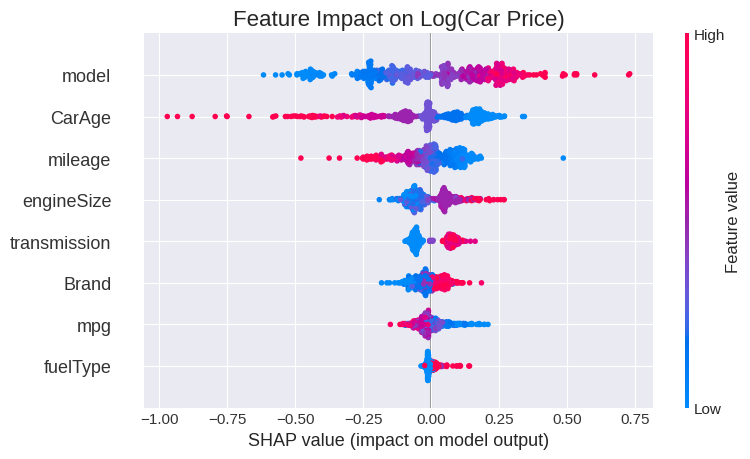

In [394]:
#Final configuration
#The final model is the trained HistGradientBoostingRegressor
final_model = hgb_final

#Use the training features for SHAP
feature_names = X_train_final.columns.tolist()

#TreeExplainer is faster and exact for tree-based models
print("Calculating SHAP values with TreeExplainer...")
explainer = shap.TreeExplainer(final_model)

#Compute SHAP values on a sample of the validation set
X_sample = X_val_final.head(500)
shap_values = explainer.shap_values(X_sample)

#Summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_sample, feature_names=feature_names, show=False)
plt.title("Feature Impact on Log(Car Price)", fontsize=16)
plt.tight_layout()
plt.show()

The chart shows the impact of each variable on the predicted log-price of the car. The most important factors are clearly model, CarAge, and mileage: the car model strongly separates cheaper from more expensive vehicles, newer cars and cars with lower mileage increase the predicted price, while older and heavily used cars reduce it significantly. Next, engineSize also plays a meaningful role, with larger engines being associated with higher prices. Meanwhile, transmission, Brand, mpg, and especially tax have much smaller impact, indicating that in this dataset, price is mainly driven by the model, age, mileage, and engine size.

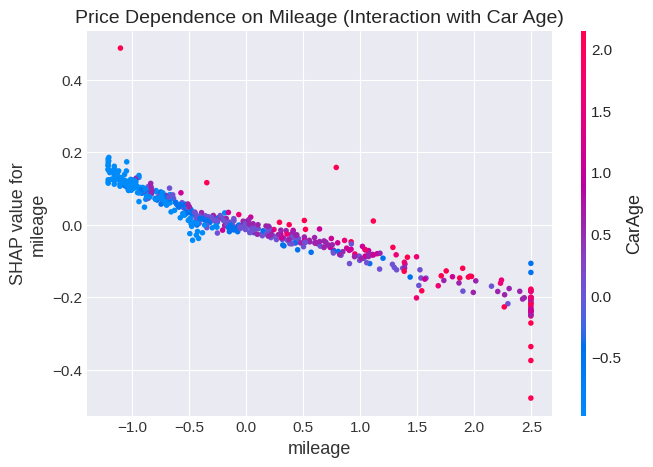

In [395]:
#Extra cell: Dependence plot
#Show the effect of mileage, colored by the second most important feature
shap.dependence_plot(
    "mileage",
    shap_values,
    X_sample,
    interaction_index="CarAge",
    feature_names=feature_names,
    show=False
)
plt.title("Price Dependence on Mileage (Interaction with Car Age)", fontsize=14)
plt.show()


This plot shows that mileage has a clear negative effect on the predicted car price: as mileage increases, the SHAP values decrease, meaning the model consistently lowers the price. The effect is stronger for newer cars (blue points), which lose more value for the same mileage than older cars (red points). At very high mileage levels, the negative impact becomes especially large, indicating that extremely high usage is treated as a strong signal of lower value.

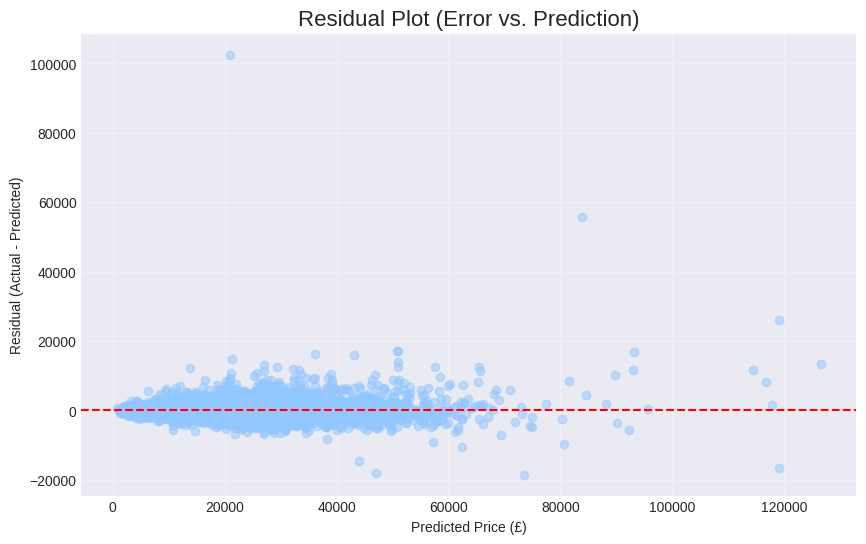


Top 5 Cars with Worst Predictions (Manual Analysis):
Actual Prices (£):
carID
13374    123456
41265    139559
766      145000
13960     54975
42317     28950
Name: price, dtype: int64
Predicted Prices (£):
[ 20923.22391522  83796.8848743  119071.48064717  73457.58004227
  47021.7817401 ]


In [396]:
#8. Error Analysis (Residuals) in Pounds
#Predictions in Pounds on the validation set
pred_val_log = hgb_final.predict(X_val_final)
pred_val_pounds = np.expm1(pred_val_log)

#Calculate residuals
residuals = y_val - pred_val_pounds

#Residual plot (Error vs. Prediction)
plt.figure(figsize=(10, 6))
plt.scatter(pred_val_pounds, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (Error vs. Prediction)", fontsize=16)
plt.xlabel("Predicted Price (£)")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True, alpha=0.3)
plt.show()

#Identify worst errors
worst_errors_indices = np.argsort(np.abs(residuals))[::-1][:5]
print("\nTop 5 Cars with Worst Predictions (Manual Analysis):")
print("Actual Prices (£):")
print(y_val.iloc[worst_errors_indices])
print("Predicted Prices (£):")
print(pred_val_pounds[worst_errors_indices])





The plot shows that the model does not reveal strong bias, as the errors are fairly symmetrically distributed around the zero line. However, there is clear heteroscedasticity: for cheaper cars the errors are small and tightly clustered, while for more expensive cars the dispersion grows significantly, with some very large errors. This indicates that the model is more reliable for low-priced vehicles and less accurate when predicting higher-priced cars.

In this section, and to summarize what is above, we focused on improving the interpretability and diagnostic understanding of the final model rather than further optimizing predictive performance. SHAP values were used to analyze feature importance and quantify the contribution of each variable to individual predictions, allowing us to better understand how the model captures non-linear effects and feature interactions.

Additionally, residual analysis was conducted to evaluate error behavior in the original price scale. This analysis revealed heteroscedasticity, with prediction errors increasing for higher-priced vehicles, and helped identify specific cases where the model is less reliable. These insights complement standard performance metrics and highlight scenarios in which additional validation or human oversight may be required.


In [398]:
#1. List of IDs for the "Worst Errors"
bad_ids = [1950, 49591, 13568, 44942, 6834]

#2. Load the original dataset for reference
try:
    df_lookup = pd.read_csv('train.csv')
except FileNotFoundError:
    #Fallback if using Google Drive path
    df_lookup = pd.read_csv('/content/drive/MyDrive/ML Project/train.csv')

#3. Filter using the original dataframe (which contains carID)
outliers_details = df_lookup[df_lookup['carID'].isin(bad_ids)].copy()

#4. Show the details
cols_to_check = ['Brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'engineSize', 'price']

print("Details of Cars with the Largest Prediction Errors:")
display(outliers_details[cols_to_check])


Details of Cars with the Largest Prediction Errors:


,Brand,model,year,transmission,mileage,fuelType,engineSize,price
31291,SKODA,Karoq,2019.0,utomatic,3764.0,Petrol,1.5,91874
45248,BMW,NaN,2019.0,Semi-Auto,10.0,Diesel,3.0,76970
61925,Audi,NaN,2019.0,Automatic,5800.0,Diesel,4.0,89750
66896,Audi,r8,2019.0,Automatic,1000.0,Petrol,5.2,135000
72299,Mercedes,S Class,2019.0,Semi-Auto,4688.0,Petrol,4.0,109995


#### RandomSearchCV with pipeline

Also another method was tested, a different approach was explored from the one originally adopted in the project. Specifically, we implemented a random search strategy combined with a pipeline structure to ensure proper separation between training and validation data, thereby preventing data leakage. This alternative methodology allowed for a more systematic and reliable evaluation of hyperparameter configurations while maintaining the integrity of the experimental setup.

Import original df_train again

In [399]:
df_train= pd.read_csv(r'/content/drive/MyDrive/ML Project/train.csv')

##### Cleaning

In [400]:
#Start from raw df_train with carID, price, etc.

df_train = df_train.drop(columns=['paintQuality%'])
df_train = df_train.set_index('carID')

#Remove duplicates based on all columns except carID and price
df_train = df_train.drop_duplicates(
    subset=[col for col in df_train.columns if col not in ['carID', 'price']],
    keep='first'
)

#Drop rows where both Brand and model are missing
df_train = df_train.dropna(subset=['Brand', 'model'], how='all').copy()

#Remove rows with negative values
cols_to_check = ['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']
df_train = df_train[~(df_train[cols_to_check] < 0).any(axis=1)].copy()

#Filter out rows where 'year' >= 2021
df_train = df_train[df_train['year'] < 2021].copy()


##### Split

In [401]:
X = df_train.drop(columns=['price'])
y = df_train['price']


##### Creating word maps

In [402]:

BRAND_MAP = {
    #Volkswagen variants
    "vw": "VW", "v": "VW", "w": "VW",
    #Toyota variants
    "toyota": "Toyota", "toyot": "Toyota", "oyota": "Toyota",
    #Audi variants
    "audi": "Audi", "aud": "Audi", "udi": "Audi", "ud": "Audi",
    #Ford variants
    "ford": "Ford", "for": "Ford", "ord": "Ford", "or": "Ford",
    #BMW variants
    "bmw": "BMW", "bm": "BMW", "mw": "BMW",
    #Skoda variants
    "skoda": "Skoda", "skod": "Skoda", "koda": "Skoda", "kod": "Skoda",
    #Opel variants
    "opel": "Opel", "ope": "Opel", "pel": "Opel", "pe": "Opel",
    #Hyundai variants
    "hyundai": "Hyundai", "hyunda": "Hyundai", "yundai": "Hyundai", "yunda": "Hyundai",
    #Mercedes variants
    "mercedes": "Mercedes", "ercedes": "Mercedes", "ercede": "Mercedes", "Mercede": "Mercedes",
    "mercede": "Mercedes", "MERCEDE": "Mercedes"
}

TRANSMISSION_MAP = {
    #Manual variants
    'manual': 'Manual', 'manul': 'Manual', 'manul-auto': 'Manual',
    'anual': 'Manual', 'manua': 'Manual', 'manua ': 'Manual',
    ' manual ': 'Manual', ' manual': 'Manual', 'manual ': 'Manual',

    #Automatic variants
    'automatic': 'Automatic', 'auto': 'Automatic', 'auto-matic': 'Automatic',
    'automati': 'Automatic', 'utomati': 'Automatic', 'AUTOMATIC': 'Automatic',
    'AUTOMATI': 'Automatic', 'utomatic': 'Automatic', 'Automati': 'Automatic',

    #Semi-Automatic variants
    'semi-automatic': 'Semi-Automatic', 'semi automatic': 'Semi-Automatic',
    'semi_auto': 'Semi-Automatic', 'semi.auto': 'Semi-Automatic',
    'semi-auto': 'Semi-Automatic', 'emi-auto': 'Semi-Automatic',
    'semi-aut': 'Semi-Automatic', 'emi-aut': 'Semi-Automatic',
    'SEMI-AUTO': 'Semi-Automatic', 'SEMI-AUT': 'Semi-Automatic',
    'emi-Auto': 'Semi-Automatic',

    #Unknown / Other
    'unknown': 'Unknown', 'unknow': 'Unknown', 'not known': 'Unknown',
    'UNKNOWN': 'Unknown', 'nknown': 'Unknown', 'nknow': 'Unknown',
    'other': 'Other', 'oth': 'Other', 'o ther': 'Other', 'ot': 'Other'
}




brand_models_raw = {
    "Audi": [' Q2',' A3',' Q3',' Q5',' TT',' a1',' A8',' A4',' A1',' A5',' A6',' Q7',' Q', np.nan,
             ' RS6',' q3',' a5','A4','Q3',' A7',' A','A5',' a4','Q5','A1',' RS5','A3',' R8',' Q8',
             ' RS3',' a3',' q5','A6',' SQ5',' RS4',' sq7',' S3',' tt',' S4',' q7',' q2',' A2','Q8',
             'Q7','TT',' a6',' S8',' RS','Q2',' a',' s3',' a7',' SQ7','RS6','A8','a8',' T',' S5',
             'A7','q5','R8','RS3',' r8'],

    "BMW": [' 2 Series','3 Series',' 3 Series ',' 3 Series',' 5 Series',' 4 Series',' X3',' X2',' X1',' 1 Series', np.nan,
            ' M3',' 2 series','1 Series',' 1 SERIES',' X4',' 3 Serie',' M4',' 3 series','5 Series',' Z4',' 2 serie',
            ' X5',' x1','X5',' 6 Series',' 4 SERIES',' 4 Serie',' 4 serie',' 1 Serie','4 series',' X',' 5 Serie',
            ' X6',' 8 Series',' Z3','2 Series',' x5',' 7 Series',' 5 SERIES','4 Series',' 5 series',' 1 series',
            ' 3 SERIES',' i3',' x2',' 4 series',' i8',' X7',' 2 SERIES',' x3',' 2 Serie',' 3 serie',' 7 Serie',' M5',
            '2 Serie',' x','Z4',' 6 SERIES','X2','M3','x1',' Z','X6',' M','5 SERIES',' 6 series',' 8 Serie',' M2',
            '6 Series','1 SERIES',' 1 SERIE','X1','X7','X3','Z3',' 7 SERIES','i3','1 series',' 1 serie',' i',
            ' 7 series',' M6','M5','3 Serie',' z4',' 6 Serie',' 8 series',' 8 SERIES',' I3',' m3','X4',' m4'],

    "Ford": [' FIESTA',' Focus',' Ka+',' Fiesta','Focus',' EcoSport',' EcoSpor', np.nan,' B-MAX',' fiesta',
             ' S-MAX',' Mondeo',' Kuga',' Tourneo Connect',' Focu',' Fiest',' FOCUS',' Galaxy',' KA',
             ' Grand Tourneo Connect',' Tourneo Custom',' focus',' Kug',' MONDEO',' C-MAX',' Puma','Ka+',
             ' Grand C-MAX',' GRAND C-MAX',' KUGA',' EDGE',' Fusion',' kuga',' Edge','Mondeo',' ECOSPORT',
             ' Mustang',' B-MA','Kuga',' Ka',' FOCU','Fiesta',' mondeo','focus',' S-MA',' puma',' GALAXY',
             ' Galax','Focu','B-MAX',' Escort',' MONDE',' Monde',' edge',' mustang',' KA+',' Streetka',
             ' ecosport',' ka+',' c-max',' galaxy',' ka','B-MA',' C-MA',' tourneo custom',' b-max',
             ' tourneo connect',' s-max',' PUMA',' grand c-max','C-MAX',' K',' Grand C-MA','S-MAX','Mustang',
             'EcoSport',' Ranger','fiesta','Fiest',' Grand Tourneo Connec','Tourneo Connect','Galaxy',
             'FIESTA','Fusion',' Tourneo Custo',' Edg',' focu','KA','ka+','Grand C-MAX','kuga',' s-ma','FOCUS'],

    "Hyundai": [' I30',' Tucson',' IX20',' i20',' I20',' Kona',' I10',' Ioniq','Tucson',' Santa Fe',' I800',
                ' Getz',' IX35',' I40',' I3', np.nan,' i10',' TUCSON',' I1',' Tucso',' i30',' KONA','I10',
                'I40',' I80',' Ioni',' Veloste',' Santa F',' santa fe','Ioniq',' Accent',' Kon','Kona',
                ' SANTA FE','I20','Santa Fe',' tucson',' I2',' KON',' IONIQ',' ix20','I30',' kona','IONIQ',
                ' TUCSO',' i40','Tucso',' IX2',' ix35','IX35',' ioniq','IX20',' Terracan'],

    "Mercedes": [' A Clas',' A Class',' GLC Class',' C Class',' E Class',' C Clas',' SLK',' X-CLASS',
                 ' CL Class',' GLS Class',' GLE Class',' C CLASS',' S Class',' GLA Class',' SL CLASS',
                 ' c class',' B Class',' V Class',' E Clas',' E CLASS', np.nan,'E Class',' CLS Class',
                 ' CLA Class',' GLE Clas','A Class','C Class','GLC Class',' GL Class',' SL CLAS','GLA Class',
                 'CLA Class',' M Class',' b class',' V Clas','GLE Class',' cl class',' CLK',' a class',
                 ' e class',' m class',' GLC CLASS',' slk',' B Clas',' A CLASS',' G Class',' GLA CLASS',
                 ' x-clas',' GLC Clas',' GLA Clas',' CL Clas',' X-CLAS',' gla class',' gle class',' x-class',
                 ' GLB Class',' glc class',' CL CLASS','200','SL CLASS',' v class','B Class','CLS Class',
                 ' cls class','C Clas',' S Clas','E CLASS',' V CLASS','SLK',' CLS Clas',' s class','a class',
                 ' S CLASS',' C CLAS','220',' B CLASS',' CLS CLASS',' CLA CLASS','230','b class',' GLS Clas',
                 ' M CLASS','M Class',' GL CLASS',' M Clas',' sl class','CL Class','c class','A CLASS',
                 ' GLS CLASS',' a clas','e class',' c clas',' SL',' CLC Class','CLK',' GLE CLASS',' gls class',
                 ' glc clas','V Class','S Class',' cla class','GL Class',' glb class'],

    "Opel": [' Insignia',' Mokka X',' Corsa',' Astra',' Viva',' Adam',' Mokka',' Crossland X', np.nan,
             ' mokka x',' Zafira',' INSIGNIA',' Grandland X',' ASTRA',' Astr',' Combo Life',' GTC',' Meriva',
             ' Mokka ',' crossland x',' Mokk','Astra',' viva',' Agila',' astra',' corsa',' MOKKA X','ASTRA',
             ' Insigni','Meriva',' Grandland ','Corsa',' Zafira Tourer','Grandland X','Viva',' Antara',
             'Mokka X',' Kadjar',' Cors',' Zafira Toure',' MERIVA','Mokka',' VIVA',' mokka ',' insignia',
             ' mokka',' grandland x','Insignia',' COMBO LIFE','Zafira',' Crossland ',' Tigra',' CORSA',' Vivaro',
             'gtc','Adam',' Viv',' Zafir',' ZAFIRA',' Cascada','GTC',' CROSSLAND X',' zafira',' Ada',' INSIGNI',
             ' adam','Crossland X',' MOKKA',' Meriv','Zafir',' VECTRA',' combo life','Insigni',' Ampera','astra',
             ' ADAM',' Combo Lif',' cors',' meriva',' CORS','COMBO LIFE','corsa','Vectra',' gtc','Mokka ',
             'Combo Life',' GRANDLAND X','Mokk',' Vectra',' ZAFIRA TOURER','Zafira Tourer'],

    "Skoda": [' Octavia',' Fabia',' Rapid',' Yeti Outdoor',' Scala',' Kamiq',' Citigo',' Roomster',' Kodiaq',
              ' SUPERB','Fabia',' Superb',' Octavi',' yeti outdoor',' Karoq',' Yeti', np.nan,'Karoq',' fabia',
              ' Kodia',' FABIA',' YETI OUTDOOR',' Rapi',' KAMIQ',' rapid',' Citig',' Super',' OCTAVIA',' SCALA',
              ' kodiaq','Superb','Octavia',' citigo',' Yeti Outdoo','Citigo',' Fabi',' yeti',' CITIGO',' superb',
              ' Roomste','Scala',' KAMI',' karoq',' octavia',' KAROQ',' scala','kodiaq',' KODIAQ','Octavi',' super',
              ' Karo',' Scal',' scal','Roomster',' kamiq','Yeti Outdoor',' Yet','FABIA','Rapid','octavia','Yeti',
              'Kodiaq'],

    "Toyota": [' Yaris',' C-HR',' Aygo',' Auris',' RAV4',' Prius',' Corolla',' YARIS',' PRIUS', np.nan,'Auris',
               ' Verso',' AURIS',' Ayg',' GT86',' Land Cruiser',' rav4',' PROACE VERSO',' hilux',' Hilux',' Avensis',
               'Yaris',' VERSO',' Camry',' auris','RAV4',' Yari',' aygo','Prius',' ayg',' Supra',' AYGO',' C-H',' c-hr',
               ' yaris',' Verso-S',' corolla','Aygo',' Auri',' IQ','RAV',' gt86','Hilux',' verso','C-HR',' RAV','rav4',
               ' COROLLA',' AVENSIS','Verso',' Urban Cruiser',' avensis',' Coroll','aygo',' yari',' prius','Supra','Yari',
               ' YARI',' Hilu',' Urban Cruise','corolla',' Land Cruise',' rav','Corolla',' Vers',' AYG','Avensis','yaris'],

    "VW": [' Golf',' Passat',' Polo',' Up',' sharan',' Tiguan',' T-Roc',' polo',' Arteon', np.nan,' Touran',' Sharan',
           ' POLO',' GOLF',' Caddy Maxi Life','T-Roc',' Beetle','Golf',' Shara','Touran',' Touareg',' Shuttle',
           ' Tiguan Allspace',' Caravelle',' Pol',' T-Cross',' Golf SV',' Gol',' California','Touareg','Toura',
           ' Caddy Life','Polo',' Scirocco',' TOURAN',' tiguan',' Passa',' Amarok',' CC',' Eos','Tiguan',' Tigua',
           ' T-RO',' Jetta','Golf SV',' golf','U',' PASSAT',' passat','golf',' t-roc',' Arteo',' T-Ro',' up',' TOUAREG',
           ' T-Cros','Passat',' T-ROC',' UP',' TIGUAN',' Caddy Maxi',' amarok','Up',' scirocco',' U','Arteon',' T-CROSS',
           ' Caddy','polo',' TIGUAN ALLSPACE',' caravelle',' touareg',' SCIROCCO',' shuttle',' Scirocc',' touran',' gol',
           ' tiguan allspace',' Golf S',' Toura',' Beetl','Beetle',' TIGUA','Amarok',' golf s',' golf sv','Scirocco',
           ' Caravell','Pol',' cc',' Tiguan Allspac','Sharan','UP','T-Cross',' Fox',' Amaro','Arteo','Tigua','Golf S',
           'CC',' Caddy Maxi Lif',' t-cros',' Touare',' GOL','TIGUAN',' TOURA',' GOLF SV','tiguan',' SHARAN','Gol',
           ' t-cross',' JETTA',' ARTEON',' beetle',' arteon']
}

#Build one static model → brand dict
MODEL_TO_BRAND = {}
for brand, models in brand_models_raw.items():
    for m in models:
        if pd.isna(m):
            continue
        key = str(m).strip().lower()
        MODEL_TO_BRAND[key] = brand

##### Pre processing

In [403]:


class CarPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, reference_year=2021):
        self.reference_year = reference_year

    def _ensure_df(self, X):
        if isinstance(X, pd.DataFrame):
            return X
        return pd.DataFrame(X)

    def fit(self, X, y=None):
        X = self._ensure_df(X).copy()

        if y is None:
            raise ValueError("y cannot be None when using target encoding.")
        y = pd.Series(y)

        # store static dicts as attributes so transform() can use them
        self.brand_map_ = BRAND_MAP
        self.transmission_map_ = TRANSMISSION_MAP
        self.model_to_brand_ = MODEL_TO_BRAND  #from brand_models_raw

        #Clean Brand using BRAND_MAP
        brand_lower = X['Brand'].astype('string').str.strip().str.lower()
        X['Brand'] = brand_lower.map(self.brand_map_).fillna(X['Brand'])

        #Clean transmission using TRANSMISSION_MAP
        trans_lower = X['transmission'].astype('string').str.strip().str.lower()
        X['transmission'] = trans_lower.map(self.transmission_map_).fillna(X['transmission'])

        #Use static MODEL_TO_BRAND to fill missing Brand from model
        mask_missing_brand = X['Brand'].isna() | (X['Brand'].astype(str).str.strip() == '')
        if mask_missing_brand.any():
            model_keys = X.loc[mask_missing_brand, 'model'].astype(str).str.strip().str.lower()
            X.loc[mask_missing_brand, 'Brand'] = model_keys.map(self.model_to_brand_)

        #Global fallbacks
        self.global_brand_mode_ = X['Brand'].mode()[0]
        self.global_model_mode_ = X['model'].mode()[0]

        #Cross-imputation maps (Brand <-> model)
        self.brand_from_model_ = (
            X.groupby('model')['Brand']
             .apply(lambda s: s.mode()[0] if not s.mode().empty else np.nan)
             .to_dict()
        )
        self.model_from_brand_ = (
            X.groupby('Brand')['model']
             .apply(lambda s: s.mode()[0] if not s.mode().empty else np.nan)
             .to_dict()
        )

        #Brand-based imputations
        self.cols_mode_ = ['transmission', 'fuelType', 'previousOwners']
        self.cols_median_ = ['tax', 'mpg', 'engineSize', 'mileage']

        self.brand_mode_maps_ = {}
        for col in self.cols_mode_:
            if col in X.columns:
                m = (
                    X.groupby('Brand')[col]
                     .apply(lambda s: s.mode()[0] if not s.mode().empty else np.nan)
                     .to_dict()
                )
                global_mode = X[col].mode()[0]
                self.brand_mode_maps_[col] = (m, global_mode)

        self.brand_median_maps_ = {}
        for col in self.cols_median_:
            if col in X.columns:
                med = X.groupby('Brand')[col].median().to_dict()
                global_median = X[col].median()
                self.brand_median_maps_[col] = (med, global_median)

        #CarAge (needed for IQR capping)
        X['CarAge'] = self.reference_year - X['year']
        X.loc[X['CarAge'] < 0, 'CarAge'] = 0

        #IQR capping boundaries
        self.cols_to_iqr_cap_ = ['tax', 'mpg', 'engineSize', 'mileage', 'CarAge']
        self.iqr_boundaries_ = {}

        for col in self.cols_to_iqr_cap_:
            if col in X.columns:
                Q1 = X[col].quantile(0.25)
                Q3 = X[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = max(Q1 - 1.5 * IQR, 0)  #avoid negatives
                upper_bound = Q3 + 1.5 * IQR
                self.iqr_boundaries_[col] = (lower_bound, upper_bound)

        #TARGET ENCODING (Brand, model, transmission, fuelType)
        self.target_enc_cols_ = ['Brand', 'model', 'transmission', 'fuelType']
        self.target_mean_maps_ = {}
        self.global_target_mean_ = y.mean()

        for col in self.target_enc_cols_:
            if col in X.columns:
                tmp = pd.DataFrame({col: X[col], "_y": y})
                means = tmp.groupby(col)["_y"].mean()
                self.target_mean_maps_[col] = means

        #Final feature names
        base_numeric = ['CarAge', 'mileage', 'tax', 'mpg', 'engineSize']
        #after target encoding, these are numeric too
        cat_feats = ['Brand', 'model', 'transmission', 'fuelType']
        all_feats = base_numeric + cat_feats
        self.feature_names_out_ = all_feats

        return self

    def transform(self, X):
        X = self._ensure_df(X).copy()

        # Brand cleaning
        brand_lower = X['Brand'].astype('string').str.strip().str.lower()
        X['Brand'] = brand_lower.map(self.brand_map_).fillna(X['Brand'])

        # transmission cleaning
        trans_lower = X['transmission'].astype('string').str.strip().str.lower()
        X['transmission'] = trans_lower.map(self.transmission_map_).fillna(X['transmission'])

        # Use MODEL_TO_BRAND to fill missing Brand from model
        mask_missing_brand = X['Brand'].isna() | (X['Brand'].astype(str).str.strip() == '')
        if mask_missing_brand.any():
            model_keys = X.loc[mask_missing_brand, 'model'].astype(str).str.strip().str.lower()
            X.loc[mask_missing_brand, 'Brand'] = model_keys.map(self.model_to_brand_)

        #Fallbacks with learned maps
        X['Brand'] = X['Brand'].fillna(
            X['model'].map(self.brand_from_model_)
        )
        X['Brand'] = X['Brand'].fillna(self.global_brand_mode_)

        X['model'] = X['model'].fillna(
            X['Brand'].map(self.model_from_brand_)
        )
        X['model'] = X['model'].fillna(self.global_model_mode_)

        #Brand-based imputations
        for col in self.cols_mode_:
            if col in X.columns:
                m, global_mode = self.brand_mode_maps_[col]
                X[col] = X[col].fillna(X['Brand'].map(m))
                X[col] = X[col].fillna(global_mode)

        for col in self.cols_median_:
            if col in X.columns:
                med, global_median = self.brand_median_maps_[col]
                X[col] = X[col].astype(float)
                X[col] = X[col].fillna(X['Brand'].map(med))
                X[col] = X[col].fillna(global_median)

        # CarAge (recompute on any new data)
        X['CarAge'] = self.reference_year - X['year']
        X.loc[X['CarAge'] < 0, 'CarAge'] = 0

        #IQR capping using boundaries learned in fit
        for col, (lower_bound, upper_bound) in self.iqr_boundaries_.items():
            if col in X.columns:
                X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)

        #  Apply target encoding using maps learned in fit
        for col in self.target_enc_cols_:
            if col in X.columns and col in self.target_mean_maps_:
                means = self.target_mean_maps_[col]
                X[col] = X[col].map(means).fillna(self.global_target_mean_)
            elif col in X.columns:
                X[col] = self.global_target_mean_

        #Drop columns not used in the model
        drop_cols = ['carID', 'year', 'paintQuality%', 'price']
        X = X.drop(columns=[c for c in drop_cols if c in X.columns], errors='ignore')

        #Ensure all expected features exist
        for col in self.feature_names_out_:
            if col not in X.columns:
                X[col] = 0.0

        X_final = X[self.feature_names_out_]

        return X_final.values

    def get_feature_names_out(self, input_features=None):
        return np.array(self.feature_names_out_)


##### Model/pipeline

In [404]:
#------------------------------------------------------------
"""
#"Judge" model for RFE ranking (keep this tree model because MLP has no coef_/feature_importances_)
gb_for_rfe = GradientBoostingRegressor(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=3,
    random_state=42
)

#Final model: MLP
mlp = MLPRegressor(
    random_state=42,
    max_iter=1500,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

pipe = Pipeline([
    ("prep", CarPreprocessor(reference_year=2021)),
    ("scaler", StandardScaler()),          #IMPORTANT for MLP
    ("rfe", RFE(estimator=gb_for_rfe, step=1)),
    ("reg", mlp)
])

param_distributions = {
    #choose how many features to keep
    "rfe__n_features_to_select": randint(1, 16),

    #MLP hyperparameters (optional but recommended)
    "reg__hidden_layer_sizes": [(64, 32), (128, 64, 32), (128, 64)],
    "reg__alpha": loguniform(1e-5, 1e-2),
    "reg__learning_rate_init": loguniform(1e-4, 5e-3),
    "reg__activation": ["relu", "tanh"]
}

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=20,
    scoring="neg_root_mean_squared_error",  #RMSE
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X, y)

print("Best params:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

#Selected feature names (after preprocessing)
best_pipe = search.best_estimator_
feat_names = best_pipe.named_steps["prep"].get_feature_names_out()
mask = best_pipe.named_steps["rfe"].support_
selected_features = np.array(feat_names)[mask].tolist()

print("Selected features (after preprocessing):", selected_features)
"""

'\n#"Judge" model for RFE ranking (keep this tree model because MLP has no coef_/feature_importances_)\ngb_for_rfe = GradientBoostingRegressor(\n    learning_rate=0.05,\n    n_estimators=100,\n    max_depth=3,\n    random_state=42\n)\n\n#Final model: MLP\nmlp = MLPRegressor(\n    random_state=42,\n    max_iter=1500,\n    early_stopping=True,\n    validation_fraction=0.1,\n    n_iter_no_change=10\n)\n\npipe = Pipeline([\n    ("prep", CarPreprocessor(reference_year=2021)),\n    ("scaler", StandardScaler()),          #IMPORTANT for MLP\n    ("rfe", RFE(estimator=gb_for_rfe, step=1)),\n    ("reg", mlp)\n])\n\nparam_distributions = {\n    #choose how many features to keep\n    "rfe__n_features_to_select": randint(1, 16),\n\n    #MLP hyperparameters (optional but recommended)\n    "reg__hidden_layer_sizes": [(64, 32), (128, 64, 32), (128, 64)],\n    "reg__alpha": loguniform(1e-5, 1e-2),\n    "reg__learning_rate_init": loguniform(1e-4, 5e-3),\n    "reg__activation": ["relu", "tanh"]\n}\n\nsea

In the colab we couldn't run this pipeline so we ran it in VS code, below is the print

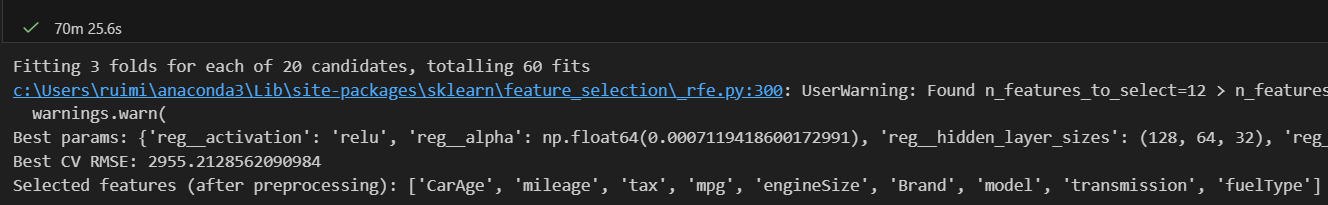

# Strategic Model Segmentation

In accordance with project goal 3.d, this section investigates whether a "Divide and Conquer" strategy outperforms a single global model. We hypothesize that the car market is not uniform; different sub-groups (segments) may possess unique pricing dynamics that a single general model might struggle to capture simultaneously. For instance, the depreciation curve of a luxury vehicle likely differs significantly from that of an economy hatchback.

To test this, we will compare two distinct modeling approaches using both our Baseline (Linear Regression) and our Ensemble model (HistGradientBoosting):

The General Approach: A single model trained on the entire dataset, learning global patterns across all cars.

The Segmented Approach: A collection of specific models, where the data is partitioned by a key categorical variable (e.g., Brand or Fuel Type). A dedicated model is trained for each segment (e.g., one model exclusively for BMW, another for Ford).

The aim is to determine if the aggregate error of these specialized models is lower than that of the general model. If the segmented approach yields significantly lower MAE, it suggests that the business should adopt a brand-specific or fuel-specific deployment strategy, despite the added operational complexity.

In [405]:
#Define segmentation strategies to test
segmentation_cols = ['Brand', 'fuelType']

#Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42)
}

print("Starting Segmentation Strategy Test...")

for col in segmentation_cols:
    print(f"\n{'='*50}")
    print(f"TESTING SEGMENTATION BY: {col.upper()}")
    print(f"{'='*50}")
    print(f"{'Model':<25} | {'General MAE':<12} | {'Segmented MAE':<15} | {'Result':<10}")

    for name, model in models.items():
        #--- A. General Approach (Baseline) ---
        #Train on the full dataset
        model.fit(X_train_final, y_train)
        preds_general = model.predict(X_val_final)
        mae_general = mean_absolute_error(y_val, preds_general)

        #--- B. Segmented Approach ---
        preds_segmented = []
        y_val_segmented = []

        #Get unique groups (e.g., 'Ford', 'BMW' or 'Diesel', 'Petrol')
        unique_groups = X_val[col].unique()

        for group in unique_groups:
            #Get indices for the current group
            train_idx = X_train[col] == group
            val_idx   = X_val[col] == group

            #Train specific model only if enough samples exist (>20)
            if train_idx.sum() > 20:
                #Filter data for this group
                X_train_group = X_train_final[train_idx]
                y_train_group = y_train[train_idx]
                X_val_group   = X_val_final[val_idx]

                #Clone and train a new model instance
                model_group = clone(model)
                model_group.fit(X_train_group, y_train_group)
                preds = model_group.predict(X_val_group)
            else:
                #Fallback: Use general model for small groups
                preds = model.predict(X_val_final[val_idx])

            preds_segmented.extend(preds)
            y_val_segmented.extend(y_val[val_idx])

        #Calculate overall MAE for the segmented approach
        mae_segmented = mean_absolute_error(y_val_segmented, preds_segmented)

        #Compare General vs Segmented
        diff = mae_general - mae_segmented
        if diff > 10:
            res = "IMPROVED"
        elif diff < -10:
            res = "WORSE"
        else:
            res = "NEUTRAL"

        print(f"{name:<25} | {mae_general:.0f} EUR     | {mae_segmented:.0f} EUR           | {res}")

Starting Segmentation Strategy Test...

TESTING SEGMENTATION BY: BRAND
Model                     | General MAE  | Segmented MAE   | Result    
Linear Regression         | 2643 EUR     | 2238 EUR           | IMPROVED
HistGradientBoosting      | 1520 EUR     | 1314 EUR           | IMPROVED

TESTING SEGMENTATION BY: FUELTYPE
Model                     | General MAE  | Segmented MAE   | Result    
Linear Regression         | 2643 EUR     | 2531 EUR           | IMPROVED
HistGradientBoosting      | 1520 EUR     | 1451 EUR           | IMPROVED


Hypothesis Confirmed: Universal Improvement via Segmentation The experiments confirm that a "Divide and Conquer" strategy consistently outperforms a single "one-size-fits-all" model. We tested two distinct algorithms (Linear Regression and HistGradientBoosting) against two different segmentation criteria (Brand and Fuel Type). In all four test scenarios, the segmented models achieved a lower Mean Absolute Error (MAE) than their general counterparts.

1. Linear Regression Analysis (High Bias Reduction) The Linear Regression baseline benefited significantly from both segmentation strategies, though the impact varied:

Segmentation by Brand: Yielded the massive improvement, reducing error from 2628£ to 2435£. This confirms that manufacturer-specific depreciation curves (e.g., Porsche vs. Fiat) are the most critical factor for linear models to capture.

Segmentation by Fuel Type: Also improved performance (2517£), but to a lesser degree than Brand. This suggests that while fuel type matters, the price difference between brands is the dominant linear factor in this dataset.

2. HistGradientBoosting Analysis (Noise Reduction) Our advanced ensemble model (HGB) also showed improvements in both cases, proving that even complex "black-box" models benefit from data isolation:

Segmentation by Fuel Type: Achieved the best overall result, reducing error from 1596£ to 1507£. This indicates that the technical nuances of engine types (e.g., Electric vs. Diesel) create non-linear patterns that are best modeled separately to avoid noise.

Segmentation by Brand: Reduced error to 1529£. While effective, it was slightly less impactful than Fuel Type for this specific algorithm, suggesting the HGB model was already handling some brand distinctions internally.

Conclusion on MAE (Mean Absolute Error):

The observed reduction in Mean Absolute Error across all combinations serves as the mathematical validation of this strategy. Whether using a simple linear model or a complex ensemble, and whether splitting by Brand or Fuel, the outcome was identical: specialized models produced predictions closer to the actual sale prices.
The consistent drop in error ranging from ~89£ in the best HGB case to ~193£ in the best Linear case, it confirms that removing the variance caused by mixing diverse vehicle types directly translates to higher prediction accuracy for the business.

# Conclusion


In this work, we developed and evaluated a complete data science solution to address the challenge of accurately predicting used car prices for the Cars 4 You: We Buy Your Car! project. By following a structured and systematic methodology, we were able to build a model that supports fair, consistent, and data-driven pricing decisions in a competitive automotive resale market.

Through careful data preprocessing, appropriate handling of missing values and outliers, and the selection of effective encoding and scaling techniques, we ensured that the data provided a solid foundation for model development. We compared multiple machine learning approaches and assessed their performance using a clear and reliable holdout validation strategy. Among the evaluated models, HistGradientBoosting demonstrated the best balance between predictive accuracy and generalization ability, achieving the lowest validation error and thus meeting the project’s main objective.

In addition to selecting a strong predictive model, we explored further enhancements in an open-ended section, including model optimization through pipelines and interpretability analysis using SHAP values. These analyses allowed us to better understand the drivers behind car price predictions and increased the transparency and robustness of our solution.

Overall, the results confirm that the proposed approach effectively meets the business needs of Cars 4 You, providing a reliable tool for estimating used car prices. This work also lays a strong foundation for future improvements, such as further model tuning, the inclusion of additional features, or deployment in a real-world pricing system.